# F1 Race Prediction - Dataset Exploration

Este notebook explora el dataset de carreras históricas de F1 recolectado para el modelo de predicción.


## 1. Carga del Dataset


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Configurar visualización
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")
%matplotlib inline

# Cargar dataset
df = pd.read_csv('../data/processed/historical_races.csv')

print(f"Dataset cargado: {df.shape[0]} filas × {df.shape[1]} columnas")
print(f"\nPrimeras filas:")
df.head()


Dataset cargado: 499 filas × 42 columnas

Primeras filas:


,year,round_number,circuit_name,country,event_name,driver_code,driver_number,constructor,grid_position,qualifying_position,...,avg_humidity,avg_wind_speed,max_rainfall,had_rain,race_position,points,winner,dnf,status,fastest_lap_time
0,2023,1,Sakhir,Bahrain,Bahrain Grand Prix,VER,1,Red Bull Racing,1,1,...,21.496894,0.68323,0.0,False,1.0,25.0,1,False,Finished,NaN
1,2023,1,Sakhir,Bahrain,Bahrain Grand Prix,PER,11,Red Bull Racing,2,2,...,21.496894,0.68323,0.0,False,2.0,18.0,0,False,Finished,NaN
2,2023,1,Sakhir,Bahrain,Bahrain Grand Prix,ALO,14,Aston Martin,5,5,...,21.496894,0.68323,0.0,False,3.0,15.0,0,False,Finished,NaN
3,2023,1,Sakhir,Bahrain,Bahrain Grand Prix,SAI,55,Ferrari,4,4,...,21.496894,0.68323,0.0,False,4.0,12.0,0,False,Finished,NaN
4,2023,1,Sakhir,Bahrain,Bahrain Grand Prix,HAM,44,Mercedes,7,7,...,21.496894,0.68323,0.0,False,5.0,10.0,0,False,Finished,NaN


## 2. Exploración de Datos Disponibles


INFORMACIÓN GENERAL DEL DATASET

Shape: 499 filas × 42 columnas

Años cubiertos: 2023 - 2024
Total de carreras: 25
Pilotos únicos: 23
Constructores únicos: 12
Circuitos únicos: 23

COLUMNAS DISPONIBLES
 1. year
 2. round_number
 3. circuit_name
 4. country
 5. event_name
 6. driver_code
 7. driver_number
 8. constructor
 9. grid_position
10. qualifying_position
11. q1_time
12. q2_time
13. q3_time
14. qualifying_best_time
15. qualifying_time_from_pole
16. wins_so_far
17. points_so_far
18. podiums_so_far
19. races_so_far
20. avg_position_so_far
21. avg_position_last_5
22. points_per_race
23. win_rate
24. podium_rate
25. constructor_points_so_far
26. constructor_wins_so_far
27. circuit_wins_history
28. circuit_races_history
29. circuit_avg_position
30. circuit_length
31. avg_air_temp
32. avg_track_temp
33. avg_humidity
34. avg_wind_speed
35. max_rainfall
36. had_rain
37. race_position
38. points
39. winner
40. dnf
41. status
42. fastest_lap_time

ANÁLISIS DE DATOS NULOS

⚠️ Se encontraron

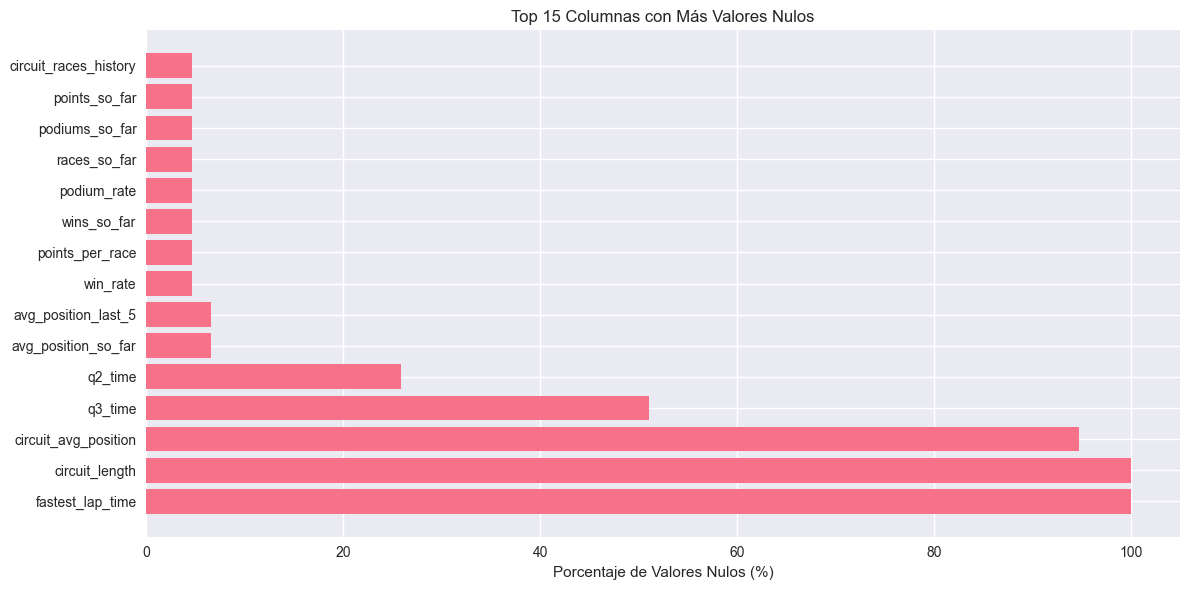

In [2]:
# Información general del dataset
print("=" * 60)
print("INFORMACIÓN GENERAL DEL DATASET")
print("=" * 60)
print(f"\nShape: {df.shape[0]} filas × {df.shape[1]} columnas")
print(f"\nAños cubiertos: {df['year'].min()} - {df['year'].max()}")
print(f"Total de carreras: {df.groupby(['year', 'round_number']).ngroups}")
print(f"Pilotos únicos: {df['driver_code'].nunique()}")
print(f"Constructores únicos: {df['constructor'].nunique()}")
print(f"Circuitos únicos: {df['circuit_name'].nunique()}")

print("\n" + "=" * 60)
print("COLUMNAS DISPONIBLES")
print("=" * 60)
for i, col in enumerate(df.columns, 1):
    print(f"{i:2d}. {col}")

print("\n" + "=" * 60)
print("ANÁLISIS DE DATOS NULOS")
print("=" * 60)

# Contar valores nulos por columna
missing = df.isnull().sum()
missing_pct = (missing / len(df)) * 100

# Crear DataFrame con información de valores nulos
missing_df = pd.DataFrame({
    'Columna': missing.index,
    'Valores_Nulos': missing.values,
    'Porcentaje_Nulos': missing_pct.values
})

# Filtrar solo columnas con valores nulos
missing_df = missing_df[missing_df['Valores_Nulos'] > 0].sort_values('Valores_Nulos', ascending=False)

if not missing_df.empty:
    print(f"\n⚠️ Se encontraron {len(missing_df)} columnas con valores nulos:\n")
    print(missing_df.to_string(index=False))
    
    # Resumen
    print(f"\n📊 RESUMEN:")
    print(f"Total de columnas con valores nulos: {len(missing_df)}")
    print(f"Total de valores nulos en el dataset: {missing_df['Valores_Nulos'].sum()}")
    print(f"Porcentaje promedio de valores nulos: {missing_df['Porcentaje_Nulos'].mean():.2f}%")
    
    # Visualización de valores nulos
    print(f"\n📈 Visualización de valores nulos (top 15):")
    plt.figure(figsize=(12, 6))
    top_missing = missing_df.head(15)
    plt.barh(top_missing['Columna'], top_missing['Porcentaje_Nulos'])
    plt.xlabel('Porcentaje de Valores Nulos (%)')
    plt.title('Top 15 Columnas con Más Valores Nulos')
    plt.tight_layout()
    plt.show()
else:
    print("\n✅ No se encontraron valores nulos en el dataset!")


## 3. Pilotos en el Dataset


In [3]:
# Listar todos los pilotos únicos
print("=" * 60)
print("PILOTOS EN EL DATASET")
print("=" * 60)

pilotos = df[['driver_code', 'driver_number', 'constructor']].drop_duplicates().sort_values('driver_code')
print(f"\nTotal de pilotos únicos: {len(pilotos)}")
print("\nLista de pilotos:")
print(pilotos.to_string(index=False))

# Estadísticas por piloto
print("\n" + "=" * 60)
print("ESTADÍSTICAS POR PILOTO")
print("=" * 60)
stats_pilotos = df.groupby('driver_code').agg({
    'race_position': ['count', 'mean'],
    'winner': 'sum',
    'points': 'sum',
    'podiums_so_far': 'max',
    'constructor': 'first'
}).round(2)

stats_pilotos.columns = ['Carreras', 'Posición_Promedio', 'Victorias', 'Puntos_Totales', 'Podios_Max', 'Constructor']
stats_pilotos = stats_pilotos.sort_values('Puntos_Totales', ascending=False)
print(stats_pilotos.to_string())


PILOTOS EN EL DATASET

Total de pilotos únicos: 27

Lista de pilotos:
driver_code  driver_number     constructor
        ALB             23        Williams
        ALO             14    Aston Martin
        BEA             38         Ferrari
        BOT             77     Kick Sauber
        BOT             77      Alfa Romeo
        DEV             21      AlphaTauri
        GAS             10          Alpine
        HAM             44        Mercedes
        HUL             27    Haas F1 Team
        LAW             40      AlphaTauri
        LEC             16         Ferrari
        MAG             20    Haas F1 Team
        NOR              4         McLaren
        OCO             31          Alpine
        PER             11 Red Bull Racing
        PIA             81         McLaren
        RIC              3              RB
        RIC              3      AlphaTauri
        RUS             63        Mercedes
        SAI             55         Ferrari
        SAR              2 

## 4. Tipos de Datos Disponibles


In [4]:
# Categorizar las columnas por tipo de dato
print("=" * 60)
print("CATEGORIZACIÓN DE DATOS")
print("=" * 60)

# Identificadores
identificadores = ['year', 'round_number', 'circuit_name', 'country', 'event_name', 
                   'driver_code', 'driver_number', 'constructor']
print("\n📋 IDENTIFICADORES:")
print([col for col in identificadores if col in df.columns])

# Features pre-carrera
pre_carrera = ['grid_position', 'qualifying_position', 'q1_time', 'q2_time', 'q3_time', 
               'qualifying_best_time', 'qualifying_time_from_pole']
print("\n🏁 FEATURES PRE-CARRERA:")
print([col for col in pre_carrera if col in df.columns])

# Features históricas
historicas = ['wins_so_far', 'points_so_far', 'podiums_so_far', 'races_so_far',
              'avg_position_so_far', 'avg_position_last_5', 'points_per_race', 
              'win_rate', 'podium_rate', 'constructor_points_so_far', 
              'constructor_wins_so_far', 'circuit_wins_history', 
              'circuit_races_history', 'circuit_avg_position']
print("\n📊 FEATURES HISTÓRICAS:")
print([col for col in historicas if col in df.columns])

# Features contextuales
contextuales = ['circuit_length', 'avg_air_temp', 'avg_track_temp', 
                'avg_humidity', 'avg_wind_speed', 'max_rainfall', 'had_rain']
print("\n🌍 FEATURES CONTEXTUALES:")
print([col for col in contextuales if col in df.columns])

# Target variables
targets = ['race_position', 'points', 'winner', 'dnf', 'status', 'fastest_lap_time']
print("\n🎯 TARGET VARIABLES:")
print([col for col in targets if col in df.columns])


CATEGORIZACIÓN DE DATOS

📋 IDENTIFICADORES:
['year', 'round_number', 'circuit_name', 'country', 'event_name', 'driver_code', 'driver_number', 'constructor']

🏁 FEATURES PRE-CARRERA:
['grid_position', 'qualifying_position', 'q1_time', 'q2_time', 'q3_time', 'qualifying_best_time', 'qualifying_time_from_pole']

📊 FEATURES HISTÓRICAS:
['wins_so_far', 'points_so_far', 'podiums_so_far', 'races_so_far', 'avg_position_so_far', 'avg_position_last_5', 'points_per_race', 'win_rate', 'podium_rate', 'constructor_points_so_far', 'constructor_wins_so_far', 'circuit_wins_history', 'circuit_races_history', 'circuit_avg_position']

🌍 FEATURES CONTEXTUALES:
['circuit_length', 'avg_air_temp', 'avg_track_temp', 'avg_humidity', 'avg_wind_speed', 'max_rainfall', 'had_rain']

🎯 TARGET VARIABLES:
['race_position', 'points', 'winner', 'dnf', 'status', 'fastest_lap_time']


## 5. Análisis de Datos Nulos (Missing Values)


ANÁLISIS DE DATOS NULOS

⚠️ Se encontraron 22 columnas con valores nulos:

                  Columna  Valores_Nulos  Porcentaje_Nulos
         fastest_lap_time            499        100.000000
           circuit_length            499        100.000000
     circuit_avg_position            473         94.789579
                  q3_time            255         51.102204
                  q2_time            129         25.851703
      avg_position_so_far             33          6.613226
      avg_position_last_5             33          6.613226
                 win_rate             23          4.609218
          points_per_race             23          4.609218
              wins_so_far             23          4.609218
              podium_rate             23          4.609218
             races_so_far             23          4.609218
           podiums_so_far             23          4.609218
            points_so_far             23          4.609218
    circuit_races_history             23

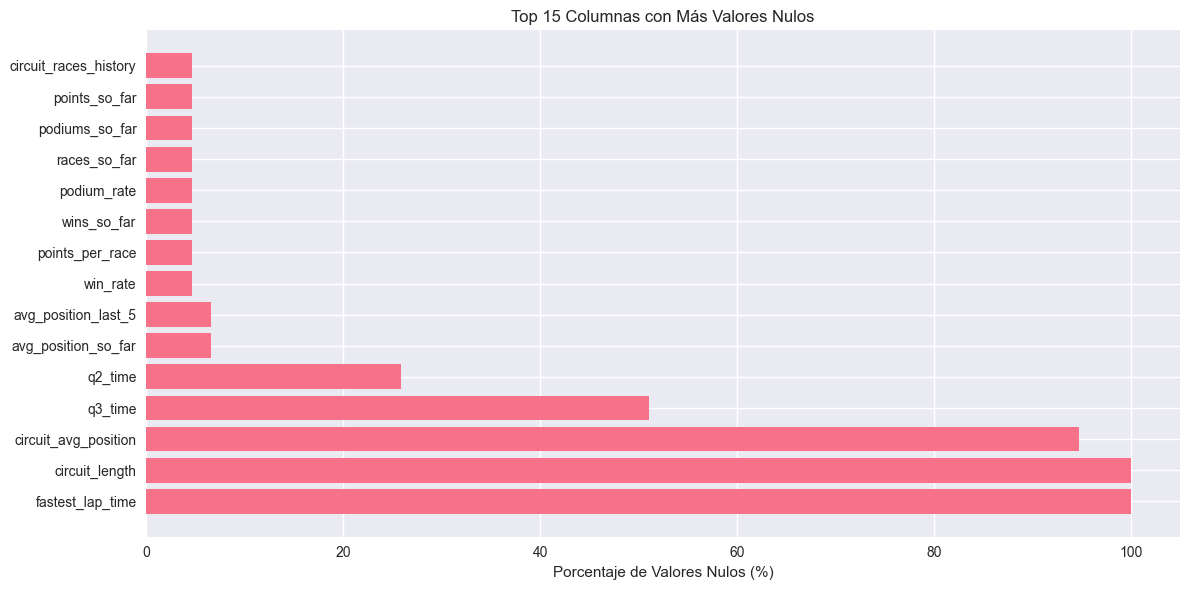

In [5]:
# Análisis de valores nulos
print("=" * 60)
print("ANÁLISIS DE DATOS NULOS")
print("=" * 60)

# Contar valores nulos por columna
missing = df.isnull().sum()
missing_pct = (missing / len(df)) * 100

# Crear DataFrame con información de valores nulos
missing_df = pd.DataFrame({
    'Columna': missing.index,
    'Valores_Nulos': missing.values,
    'Porcentaje_Nulos': missing_pct.values
})

# Filtrar solo columnas con valores nulos
missing_df = missing_df[missing_df['Valores_Nulos'] > 0].sort_values('Valores_Nulos', ascending=False)

if not missing_df.empty:
    print(f"\n⚠️ Se encontraron {len(missing_df)} columnas con valores nulos:\n")
    print(missing_df.to_string(index=False))
    
    # Resumen
    print(f"\n📊 RESUMEN:")
    print(f"Total de columnas con valores nulos: {len(missing_df)}")
    print(f"Total de valores nulos en el dataset: {missing_df['Valores_Nulos'].sum()}")
    print(f"Porcentaje promedio de valores nulos: {missing_df['Porcentaje_Nulos'].mean():.2f}%")
    
    # Visualización de valores nulos
    print(f"\n📈 Visualización de valores nulos (top 15):")
    plt.figure(figsize=(12, 6))
    top_missing = missing_df.head(15)
    plt.barh(top_missing['Columna'], top_missing['Porcentaje_Nulos'])
    plt.xlabel('Porcentaje de Valores Nulos (%)')
    plt.title('Top 15 Columnas con Más Valores Nulos')
    plt.tight_layout()
    plt.show()
else:
    print("\n✅ No se encontraron valores nulos en el dataset!")


## 6. Análisis y Estrategias para Datos Nulos


In [6]:
# Análisis detallado de valores nulos y estrategias
print("=" * 60)
print("ANÁLISIS DETALLADO DE VALORES NULOS")
print("=" * 60)

# Categorizar columnas según su porcentaje de nulos
print("\n📊 CATEGORIZACIÓN DE COLUMNAS POR % DE NULOS:\n")

# Columnas con 100% nulos (eliminar)
cols_100_nulos = missing_df[missing_df['Porcentaje_Nulos'] == 100.0]['Columna'].tolist()
if cols_100_nulos:
    print(f"❌ ELIMINAR (100% nulos - {len(cols_100_nulos)} columnas):")
    for col in cols_100_nulos:
        print(f"   - {col}")
    print("   → Estas columnas no aportan información y deben eliminarse")

# Columnas con >50% nulos (evaluar eliminar o imputar)
cols_50_plus = missing_df[(missing_df['Porcentaje_Nulos'] > 50) & (missing_df['Porcentaje_Nulos'] < 100)]['Columna'].tolist()
if cols_50_plus:
    print(f"\n⚠️ EVALUAR ELIMINAR (>50% nulos - {len(cols_50_plus)} columnas):")
    for col in cols_50_plus:
        pct = missing_df[missing_df['Columna'] == col]['Porcentaje_Nulos'].iloc[0]
        print(f"   - {col}: {pct:.1f}% nulos")
    print("   → Considerar eliminar si no son críticas para el modelo")

# Columnas con 10-50% nulos (imputar)
cols_10_50 = missing_df[(missing_df['Porcentaje_Nulos'] >= 10) & (missing_df['Porcentaje_Nulos'] <= 50)]['Columna'].tolist()
if cols_10_50:
    print(f"\n🔄 IMPUTAR (10-50% nulos - {len(cols_10_50)} columnas):")
    for col in cols_10_50:
        pct = missing_df[missing_df['Columna'] == col]['Porcentaje_Nulos'].iloc[0]
        print(f"   - {col}: {pct:.1f}% nulos")
    print("   → Usar imputación (media, mediana, o valor por defecto)")

# Columnas con <10% nulos (imputar o mantener)
cols_menos_10 = missing_df[missing_df['Porcentaje_Nulos'] < 10]['Columna'].tolist()
if cols_menos_10:
    print(f"\n✅ IMPUTAR O MANTENER (<10% nulos - {len(cols_menos_10)} columnas):")
    for col in cols_menos_10:
        pct = missing_df[missing_df['Columna'] == col]['Porcentaje_Nulos'].iloc[0]
        print(f"   - {col}: {pct:.1f}% nulos")
    print("   → Imputar con valores razonables o mantener según contexto")

print("\n" + "=" * 60)
print("ANÁLISIS POR TIPO DE FEATURE")
print("=" * 60)

# Analizar por categoría
print("\n🏁 FEATURES PRE-CARRERA:")
pre_carrera_cols = ['q1_time', 'q2_time', 'q3_time', 'qualifying_best_time', 'qualifying_time_from_pole']
for col in pre_carrera_cols:
    if col in missing_df['Columna'].values:
        pct = missing_df[missing_df['Columna'] == col]['Porcentaje_Nulos'].iloc[0]
        print(f"   - {col}: {pct:.1f}% nulos")
        if 'q2' in col or 'q3' in col:
            print("     → Normal: no todos los pilotos pasan Q2/Q3")

print("\n📊 FEATURES HISTÓRICAS:")
historicas_cols = ['wins_so_far', 'points_so_far', 'podiums_so_far', 'races_so_far', 
                   'avg_position_so_far', 'avg_position_last_5', 'points_per_race', 
                   'win_rate', 'podium_rate', 'circuit_wins_history', 'circuit_races_history', 
                   'circuit_avg_position']
for col in historicas_cols:
    if col in missing_df['Columna'].values:
        pct = missing_df[missing_df['Columna'] == col]['Porcentaje_Nulos'].iloc[0]
        print(f"   - {col}: {pct:.1f}% nulos")
        if pct < 10:
            print("     → Probablemente primera carrera (sin historial previo)")

print("\n🌍 FEATURES CONTEXTUALES:")
contextuales_cols = ['circuit_length', 'avg_air_temp', 'avg_track_temp', 
                     'avg_humidity', 'avg_wind_speed', 'max_rainfall', 'had_rain']
for col in contextuales_cols:
    if col in missing_df['Columna'].values:
        pct = missing_df[missing_df['Columna'] == col]['Porcentaje_Nulos'].iloc[0]
        print(f"   - {col}: {pct:.1f}% nulos")
        if col == 'circuit_length':
            print("     → Datos no disponibles en FastF1, eliminar o buscar fuente alternativa")

print("\n🎯 TARGET VARIABLES:")
targets_cols = ['race_position', 'points', 'winner', 'dnf', 'status', 'fastest_lap_time']
for col in targets_cols:
    if col in missing_df['Columna'].values:
        pct = missing_df[missing_df['Columna'] == col]['Porcentaje_Nulos'].iloc[0]
        print(f"   - {col}: {pct:.1f}% nulos")
        if col == 'fastest_lap_time':
            print("     → Datos no disponibles, eliminar")
        elif col == 'race_position':
            print("     → Probablemente DNF sin posición asignada")


ANÁLISIS DETALLADO DE VALORES NULOS

📊 CATEGORIZACIÓN DE COLUMNAS POR % DE NULOS:

❌ ELIMINAR (100% nulos - 2 columnas):
   - fastest_lap_time
   - circuit_length
   → Estas columnas no aportan información y deben eliminarse

⚠️ EVALUAR ELIMINAR (>50% nulos - 2 columnas):
   - circuit_avg_position: 94.8% nulos
   - q3_time: 51.1% nulos
   → Considerar eliminar si no son críticas para el modelo

🔄 IMPUTAR (10-50% nulos - 1 columnas):
   - q2_time: 25.9% nulos
   → Usar imputación (media, mediana, o valor por defecto)

✅ IMPUTAR O MANTENER (<10% nulos - 17 columnas):
   - avg_position_so_far: 6.6% nulos
   - avg_position_last_5: 6.6% nulos
   - win_rate: 4.6% nulos
   - points_per_race: 4.6% nulos
   - wins_so_far: 4.6% nulos
   - podium_rate: 4.6% nulos
   - races_so_far: 4.6% nulos
   - podiums_so_far: 4.6% nulos
   - points_so_far: 4.6% nulos
   - circuit_races_history: 4.6% nulos
   - circuit_wins_history: 4.6% nulos
   - constructor_wins_so_far: 4.6% nulos
   - constructor_points_so

## 7. Recomendaciones para Preprocesamiento


In [7]:
# Recomendaciones de preprocesamiento
print("=" * 60)
print("RECOMENDACIONES PARA PREPROCESAMIENTO")
print("=" * 60)

print("\n1️⃣ ELIMINAR COLUMNAS (100% nulos o no útiles):")
print("   - fastest_lap_time: 100% nulos, datos no disponibles")
print("   - circuit_length: 100% nulos, datos no disponibles en FastF1")
print("   → Estas columnas no aportan información al modelo")

print("\n2️⃣ ELIMINAR O IMPUTAR COLUMNAS (>50% nulos):")
print("   - circuit_avg_position: ~95% nulos")
print("   → Opción A: Eliminar (muchos nulos)")
print("   → Opción B: Imputar con 0 o valor neutral (si es importante)")

print("\n3️⃣ IMPUTAR COLUMNAS (10-50% nulos):")
print("   - q3_time: ~51% nulos (normal, no todos pasan Q3)")
print("     → Imputar con q2_time o q1_time (mejor tiempo disponible)")
print("   - q2_time: ~28% nulos (normal, no todos pasan Q2)")
print("     → Imputar con q1_time (mejor tiempo disponible)")

print("\n4️⃣ IMPUTAR COLUMNAS (<10% nulos):")
print("   - Features históricas (~5% nulos): Primera carrera sin historial")
print("     → Imputar con 0 (sin victorias/puntos previos)")
print("   - avg_position_so_far / avg_position_last_5 (~7% nulos)")
print("     → Imputar con valor neutral (ej: 10.5 = mitad de grid)")

print("\n5️⃣ MANTENER O IMPUTAR MÍNIMOS (<1% nulos):")
print("   - qualifying_time_from_pole, qualifying_best_time, q1_time (~1% nulos)")
print("     → Imputar con media o eliminar filas (muy pocos casos)")
print("   - race_position (0.2% nulos)")
print("     → Probablemente DNF, mantener o asignar posición 20 (último)")

print("\n" + "=" * 60)
print("ESTRATEGIA SUGERIDA")
print("=" * 60)
print("""
1. Eliminar: fastest_lap_time, circuit_length
2. Eliminar o imputar: circuit_avg_position (evaluar importancia)
3. Imputar Q2/Q3: usar mejor tiempo disponible (q1_time si falta q2, q2_time si falta q3)
4. Imputar features históricas: usar 0 para primera carrera
5. Imputar promedios: usar valor neutral (10.5) para primera carrera
6. Mantener: race_position con nulos mínimos (DNFs)
""")


RECOMENDACIONES PARA PREPROCESAMIENTO

1️⃣ ELIMINAR COLUMNAS (100% nulos o no útiles):
   - fastest_lap_time: 100% nulos, datos no disponibles
   - circuit_length: 100% nulos, datos no disponibles en FastF1
   → Estas columnas no aportan información al modelo

2️⃣ ELIMINAR O IMPUTAR COLUMNAS (>50% nulos):
   - circuit_avg_position: ~95% nulos
   → Opción A: Eliminar (muchos nulos)
   → Opción B: Imputar con 0 o valor neutral (si es importante)

3️⃣ IMPUTAR COLUMNAS (10-50% nulos):
   - q3_time: ~51% nulos (normal, no todos pasan Q3)
     → Imputar con q2_time o q1_time (mejor tiempo disponible)
   - q2_time: ~28% nulos (normal, no todos pasan Q2)
     → Imputar con q1_time (mejor tiempo disponible)

4️⃣ IMPUTAR COLUMNAS (<10% nulos):
   - Features históricas (~5% nulos): Primera carrera sin historial
     → Imputar con 0 (sin victorias/puntos previos)
   - avg_position_so_far / avg_position_last_5 (~7% nulos)
     → Imputar con valor neutral (ej: 10.5 = mitad de grid)

5️⃣ MANTENER O I

## 8. Aplicación de Preprocesamiento


In [8]:
# Crear una copia del dataset para preprocesamiento
df_clean = df.copy()

print("=" * 60)
print("APLICANDO PREPROCESAMIENTO")
print("=" * 60)
print(f"\nDataset original: {df_clean.shape[0]} filas × {df_clean.shape[1]} columnas")

# 1. ELIMINAR columnas con 100% nulos
cols_to_drop = ['fastest_lap_time', 'circuit_length']
df_clean = df_clean.drop(columns=cols_to_drop)
print(f"\n1️⃣ Eliminadas {len(cols_to_drop)} columnas (100% nulos): {cols_to_drop}")

# 2. ELIMINAR circuit_avg_position (95% nulos - demasiados para ser útil)
if 'circuit_avg_position' in df_clean.columns:
    df_clean = df_clean.drop(columns=['circuit_avg_position'])
    print(f"2️⃣ Eliminada columna circuit_avg_position (95% nulos)")

# 3. IMPUTAR Q2/Q3 con mejor tiempo disponible
print(f"\n3️⃣ Imputando tiempos de clasificación:")

# Q2: si falta, usar Q1
q2_antes = df_clean['q2_time'].isnull().sum()
df_clean['q2_time'] = df_clean['q2_time'].fillna(df_clean['q1_time'])
q2_despues = df_clean['q2_time'].isnull().sum()
print(f"   - q2_time: {q2_antes} → {q2_despues} nulos (imputado con q1_time)")

# Q3: si falta, usar Q2 (o Q1 si Q2 también falta)
q3_antes = df_clean['q3_time'].isnull().sum()
df_clean['q3_time'] = df_clean['q3_time'].fillna(df_clean['q2_time'])
q3_despues = df_clean['q3_time'].isnull().sum()
print(f"   - q3_time: {q3_antes} → {q3_despues} nulos (imputado con q2_time/q1_time)")

# 4. IMPUTAR features históricas con 0 (primera carrera)
print(f"\n4️⃣ Imputando features históricas (primera carrera = 0):")
historic_cols = ['wins_so_far', 'points_so_far', 'podiums_so_far', 'races_so_far',
                 'points_per_race', 'win_rate', 'podium_rate', 
                 'constructor_points_so_far', 'constructor_wins_so_far',
                 'circuit_wins_history', 'circuit_races_history']
for col in historic_cols:
    if col in df_clean.columns:
        antes = df_clean[col].isnull().sum()
        df_clean[col] = df_clean[col].fillna(0)
        print(f"   - {col}: {antes} nulos → imputado con 0")

# 5. IMPUTAR promedios con valor neutral (10.5 = mitad de grid)
print(f"\n5️⃣ Imputando promedios (valor neutral = 10.5):")
avg_cols = ['avg_position_so_far', 'avg_position_last_5']
for col in avg_cols:
    if col in df_clean.columns:
        antes = df_clean[col].isnull().sum()
        df_clean[col] = df_clean[col].fillna(10.5)
        print(f"   - {col}: {antes} nulos → imputado con 10.5")

# 6. IMPUTAR tiempos de clasificación restantes con media
print(f"\n6️⃣ Imputando tiempos de clasificación restantes (media):")
time_cols = ['q1_time', 'qualifying_best_time', 'qualifying_time_from_pole']
for col in time_cols:
    if col in df_clean.columns:
        antes = df_clean[col].isnull().sum()
        if antes > 0:
            mean_val = df_clean[col].mean()
            df_clean[col] = df_clean[col].fillna(mean_val)
            print(f"   - {col}: {antes} nulos → imputado con media ({mean_val:.3f}s)")

# 7. IMPUTAR race_position (DNFs) con posición 20 (último)
if 'race_position' in df_clean.columns:
    antes = df_clean['race_position'].isnull().sum()
    if antes > 0:
        df_clean['race_position'] = df_clean['race_position'].fillna(20)
        print(f"\n7️⃣ race_position: {antes} nulos → imputado con 20 (DNF)")

# Verificar resultado final
print(f"\n" + "=" * 60)
print("RESULTADO FINAL")
print("=" * 60)
print(f"Dataset limpio: {df_clean.shape[0]} filas × {df_clean.shape[1]} columnas")
print(f"Columnas eliminadas: {df.shape[1] - df_clean.shape[1]}")

# Verificar si quedan nulos
remaining_nulls = df_clean.isnull().sum().sum()
if remaining_nulls == 0:
    print(f"\n✅ ¡Dataset completamente limpio! No quedan valores nulos.")
else:
    print(f"\n⚠️ Aún quedan {remaining_nulls} valores nulos:")
    remaining_cols = df_clean.columns[df_clean.isnull().any()].tolist()
    for col in remaining_cols:
        null_count = df_clean[col].isnull().sum()
        print(f"   - {col}: {null_count} nulos")


APLICANDO PREPROCESAMIENTO

Dataset original: 499 filas × 42 columnas

1️⃣ Eliminadas 2 columnas (100% nulos): ['fastest_lap_time', 'circuit_length']
2️⃣ Eliminada columna circuit_avg_position (95% nulos)

3️⃣ Imputando tiempos de clasificación:
   - q2_time: 129 → 5 nulos (imputado con q1_time)
   - q3_time: 255 → 5 nulos (imputado con q2_time/q1_time)

4️⃣ Imputando features históricas (primera carrera = 0):
   - wins_so_far: 23 nulos → imputado con 0
   - points_so_far: 23 nulos → imputado con 0
   - podiums_so_far: 23 nulos → imputado con 0
   - races_so_far: 23 nulos → imputado con 0
   - points_per_race: 23 nulos → imputado con 0
   - win_rate: 23 nulos → imputado con 0
   - podium_rate: 23 nulos → imputado con 0
   - constructor_points_so_far: 23 nulos → imputado con 0
   - constructor_wins_so_far: 23 nulos → imputado con 0
   - circuit_wins_history: 23 nulos → imputado con 0
   - circuit_races_history: 23 nulos → imputado con 0

5️⃣ Imputando promedios (valor neutral = 10.5):
 

## 9. Comparación Antes/Después del Preprocesamiento


MANEJANDO CASOS RESTANTES

📋 Filas con nulos en q2_time o q3_time: 5

Detalles de las filas con nulos:
 year  round_number circuit_name driver_code   q1_time  q2_time  q3_time  grid_position
 2023             3    Melbourne         PER 86.022381      NaN      NaN             20
 2023            16       Suzuka         SAR 86.022381      NaN      NaN             20
 2023            19  Mexico City         SAR 86.022381      NaN      NaN             20
 2023            22   Yas Island         SAR 86.022381      NaN      NaN             20
 2024             2       Jeddah         ZHO 86.022381      NaN      NaN             20

🔄 Imputando tiempos restantes con valor alto (penalización):
   - q2_time: 5 nulos → imputado con 138.510s (penalización)
   - q3_time: 5 nulos → imputado con 148.510s (penalización)

✅ ¡Dataset completamente limpio! No quedan valores nulos.

COMPARACIÓN ANTES/DESPUÉS

📊 RESUMEN:
   Valores nulos antes: 2190
   Valores nulos después: 0
   Reducción: 2190 valores (10

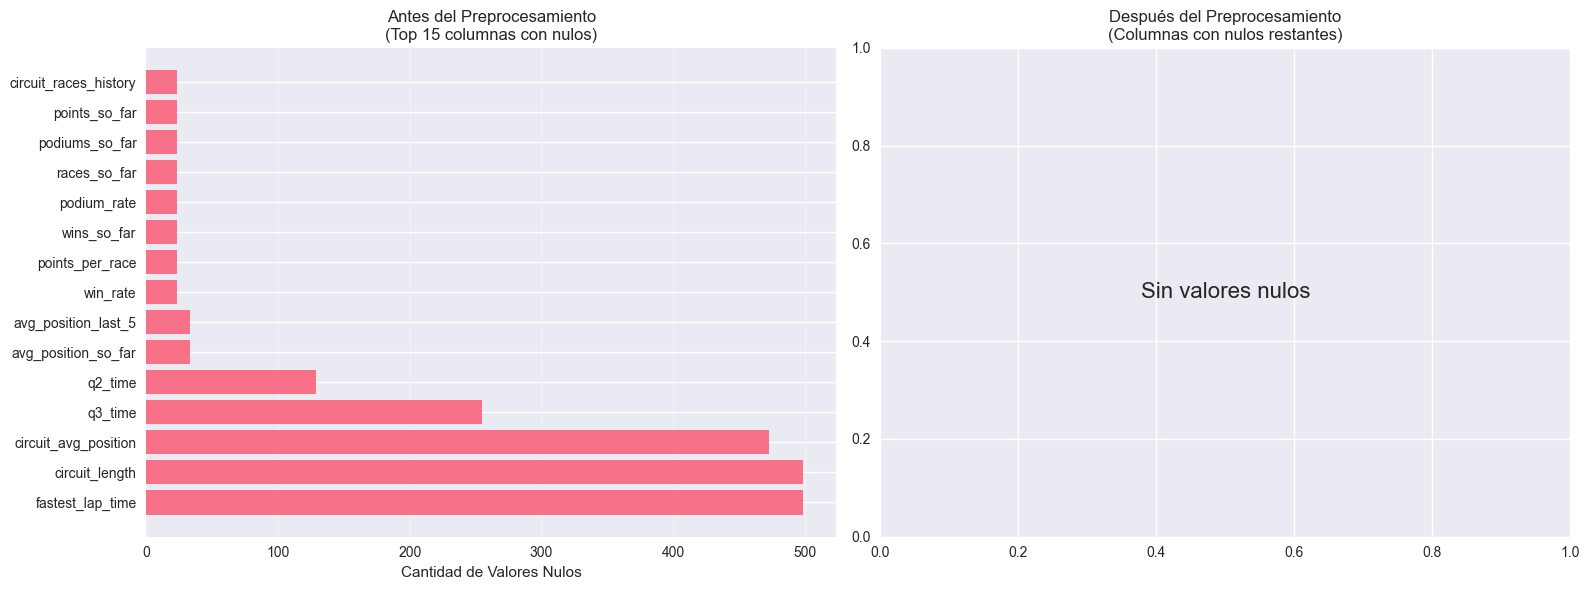


PRIMERAS FILAS DEL DATASET LIMPIO

Shape: 499 filas × 39 columnas


,year,round_number,circuit_name,country,event_name,driver_code,driver_number,constructor,grid_position,qualifying_position,...,avg_track_temp,avg_humidity,avg_wind_speed,max_rainfall,had_rain,race_position,points,winner,dnf,status
0,2023,1,Sakhir,Bahrain,Bahrain Grand Prix,VER,1,Red Bull Racing,1,1,...,31.011801,21.496894,0.68323,0.0,False,1.0,25.0,1,False,Finished
1,2023,1,Sakhir,Bahrain,Bahrain Grand Prix,PER,11,Red Bull Racing,2,2,...,31.011801,21.496894,0.68323,0.0,False,2.0,18.0,0,False,Finished
2,2023,1,Sakhir,Bahrain,Bahrain Grand Prix,ALO,14,Aston Martin,5,5,...,31.011801,21.496894,0.68323,0.0,False,3.0,15.0,0,False,Finished
3,2023,1,Sakhir,Bahrain,Bahrain Grand Prix,SAI,55,Ferrari,4,4,...,31.011801,21.496894,0.68323,0.0,False,4.0,12.0,0,False,Finished
4,2023,1,Sakhir,Bahrain,Bahrain Grand Prix,HAM,44,Mercedes,7,7,...,31.011801,21.496894,0.68323,0.0,False,5.0,10.0,0,False,Finished


In [9]:
# Manejar casos restantes: pilotos sin tiempos de clasificación
print("=" * 60)
print("MANEJANDO CASOS RESTANTES")
print("=" * 60)

# Verificar qué filas tienen nulos en q2_time o q3_time
filas_con_nulos = df_clean[df_clean[['q2_time', 'q3_time']].isnull().any(axis=1)]
print(f"\n📋 Filas con nulos en q2_time o q3_time: {len(filas_con_nulos)}")
if len(filas_con_nulos) > 0:
    print("\nDetalles de las filas con nulos:")
    print(filas_con_nulos[['year', 'round_number', 'circuit_name', 'driver_code', 
                           'q1_time', 'q2_time', 'q3_time', 'grid_position']].to_string(index=False))

# Imputar q2_time y q3_time restantes con un valor muy alto (peor tiempo posible)
# Esto indica que el piloto no participó en clasificación o tuvo problemas
print(f"\n🔄 Imputando tiempos restantes con valor alto (penalización):")

# Para q2_time: usar el peor tiempo de Q2 + margen, o si no hay, usar peor tiempo de Q1 + margen
if df_clean['q2_time'].isnull().any():
    q2_max = df_clean['q2_time'].max()
    q1_max = df_clean['q1_time'].max()
    valor_penalizacion_q2 = max(q2_max, q1_max) + 10  # +10 segundos como penalización
    antes_q2 = df_clean['q2_time'].isnull().sum()
    df_clean['q2_time'] = df_clean['q2_time'].fillna(valor_penalizacion_q2)
    print(f"   - q2_time: {antes_q2} nulos → imputado con {valor_penalizacion_q2:.3f}s (penalización)")

# Para q3_time: usar el peor tiempo de Q3 + margen, o si no hay, usar peor tiempo de Q2 + margen
if df_clean['q3_time'].isnull().any():
    q3_max = df_clean['q3_time'].max()
    q2_max = df_clean['q2_time'].max()
    valor_penalizacion_q3 = max(q3_max, q2_max) + 10  # +10 segundos como penalización
    antes_q3 = df_clean['q3_time'].isnull().sum()
    df_clean['q3_time'] = df_clean['q3_time'].fillna(valor_penalizacion_q3)
    print(f"   - q3_time: {antes_q3} nulos → imputado con {valor_penalizacion_q3:.3f}s (penalización)")

# Verificar resultado final
remaining_nulls = df_clean.isnull().sum().sum()
if remaining_nulls == 0:
    print(f"\n✅ ¡Dataset completamente limpio! No quedan valores nulos.")
else:
    print(f"\n⚠️ Aún quedan {remaining_nulls} valores nulos:")
    remaining_cols = df_clean.columns[df_clean.isnull().any()].tolist()
    for col in remaining_cols:
        null_count = df_clean[col].isnull().sum()
        print(f"   - {col}: {null_count} nulos")

# Comparación visual antes/después
print("\n" + "=" * 60)
print("COMPARACIÓN ANTES/DESPUÉS")
print("=" * 60)

# Calcular nulos antes y después
nulls_antes = df.isnull().sum().sum()
nulls_despues = df_clean.isnull().sum().sum()

print(f"\n📊 RESUMEN:")
print(f"   Valores nulos antes: {nulls_antes}")
print(f"   Valores nulos después: {nulls_despues}")
print(f"   Reducción: {nulls_antes - nulls_despues} valores ({((nulls_antes - nulls_despues) / nulls_antes * 100):.1f}%)")

print(f"\n   Columnas antes: {df.shape[1]}")
print(f"   Columnas después: {df_clean.shape[1]}")
print(f"   Columnas eliminadas: {df.shape[1] - df_clean.shape[1]}")

# Visualización comparativa
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Antes
missing_antes = df.isnull().sum()
missing_antes = missing_antes[missing_antes > 0].sort_values(ascending=False)
axes[0].barh(missing_antes.index[:15], missing_antes.values[:15])
axes[0].set_xlabel('Cantidad de Valores Nulos')
axes[0].set_title('Antes del Preprocesamiento\n(Top 15 columnas con nulos)')
axes[0].grid(axis='x', alpha=0.3)

# Después
missing_despues = df_clean.isnull().sum()
missing_despues = missing_despues[missing_despues > 0].sort_values(ascending=False)
if not missing_despues.empty:
    axes[1].barh(missing_despues.index[:15], missing_despues.values[:15])
    axes[1].set_xlabel('Cantidad de Valores Nulos')
    axes[1].set_title('Después del Preprocesamiento\n(Columnas con nulos restantes)')
    axes[1].grid(axis='x', alpha=0.3)
else:
    axes[1].text(0.5, 0.5, 'Sin valores nulos', 
                 ha='center', va='center', fontsize=16, 
                 transform=axes[1].transAxes)
    axes[1].set_title('Después del Preprocesamiento\n(Columnas con nulos restantes)')

plt.tight_layout()
plt.show()

# Mostrar primeras filas del dataset limpio
print("\n" + "=" * 60)
print("PRIMERAS FILAS DEL DATASET LIMPIO")
print("=" * 60)
print(f"\nShape: {df_clean.shape[0]} filas × {df_clean.shape[1]} columnas")
df_clean.head()


## 10. Guardar Dataset Preprocesado (Opcional)


In [10]:
# Guardar dataset preprocesado (opcional)
# Descomentar las siguientes líneas para guardar el dataset limpio

# output_path = '../data/processed/historical_races_cleaned.csv'
# df_clean.to_csv(output_path, index=False)
# print(f"✅ Dataset limpio guardado en: {output_path}")
# print(f"   Shape: {df_clean.shape[0]} filas × {df_clean.shape[1]} columnas")
# print(f"   Valores nulos restantes: {df_clean.isnull().sum().sum()}")

print("💡 Para guardar el dataset preprocesado, descomenta las líneas anteriores.")


💡 Para guardar el dataset preprocesado, descomenta las líneas anteriores.


## 11. Análisis Exploratorio de Datos (EDA)


### 11.1 Estadísticas Descriptivas


In [11]:
# Estadísticas descriptivas del dataset limpio
print("=" * 60)
print("ESTADÍSTICAS DESCRIPTIVAS")
print("=" * 60)

# Seleccionar solo columnas numéricas
numeric_cols = df_clean.select_dtypes(include=[np.number]).columns.tolist()
print(f"\n📊 Columnas numéricas: {len(numeric_cols)}")

# Estadísticas básicas
print("\n" + "=" * 60)
print("RESUMEN ESTADÍSTICO")
print("=" * 60)
print(df_clean[numeric_cols].describe().round(2))

# Información sobre tipos de datos
print("\n" + "=" * 60)
print("INFORMACIÓN DE TIPOS")
print("=" * 60)
print(f"Total de columnas: {len(df_clean.columns)}")
print(f"  - Numéricas: {len(numeric_cols)}")
print(f"  - Categóricas: {len(df_clean.select_dtypes(include=['object']).columns)}")
print(f"  - Booleanas: {len(df_clean.select_dtypes(include=['bool']).columns)}")


ESTADÍSTICAS DESCRIPTIVAS

📊 Columnas numéricas: 31

RESUMEN ESTADÍSTICO
          year  round_number  driver_number  grid_position  \
count   499.00        499.00         499.00         499.00   
mean   2023.12         10.37          28.05          10.47   
std       0.32          6.72          23.34           5.75   
min    2023.00          1.00           1.00           1.00   
25%    2023.00          4.00          11.00           5.50   
50%    2023.00         10.00          22.00          10.00   
75%    2023.00         16.00          40.00          15.00   
max    2024.00         22.00          81.00          20.00   

       qualifying_position  q1_time  q2_time  q3_time  qualifying_best_time  \
count               499.00   499.00   499.00   499.00                499.00   
mean                 10.47    86.02    86.14    86.03                 85.40   
std                   5.75    11.17    12.11    12.49                 10.79   
min                   1.00    65.12    64.95    64.3

### 11.2 Distribuciones de Variables Numéricas


DISTRIBUCIONES DE VARIABLES CLAVE


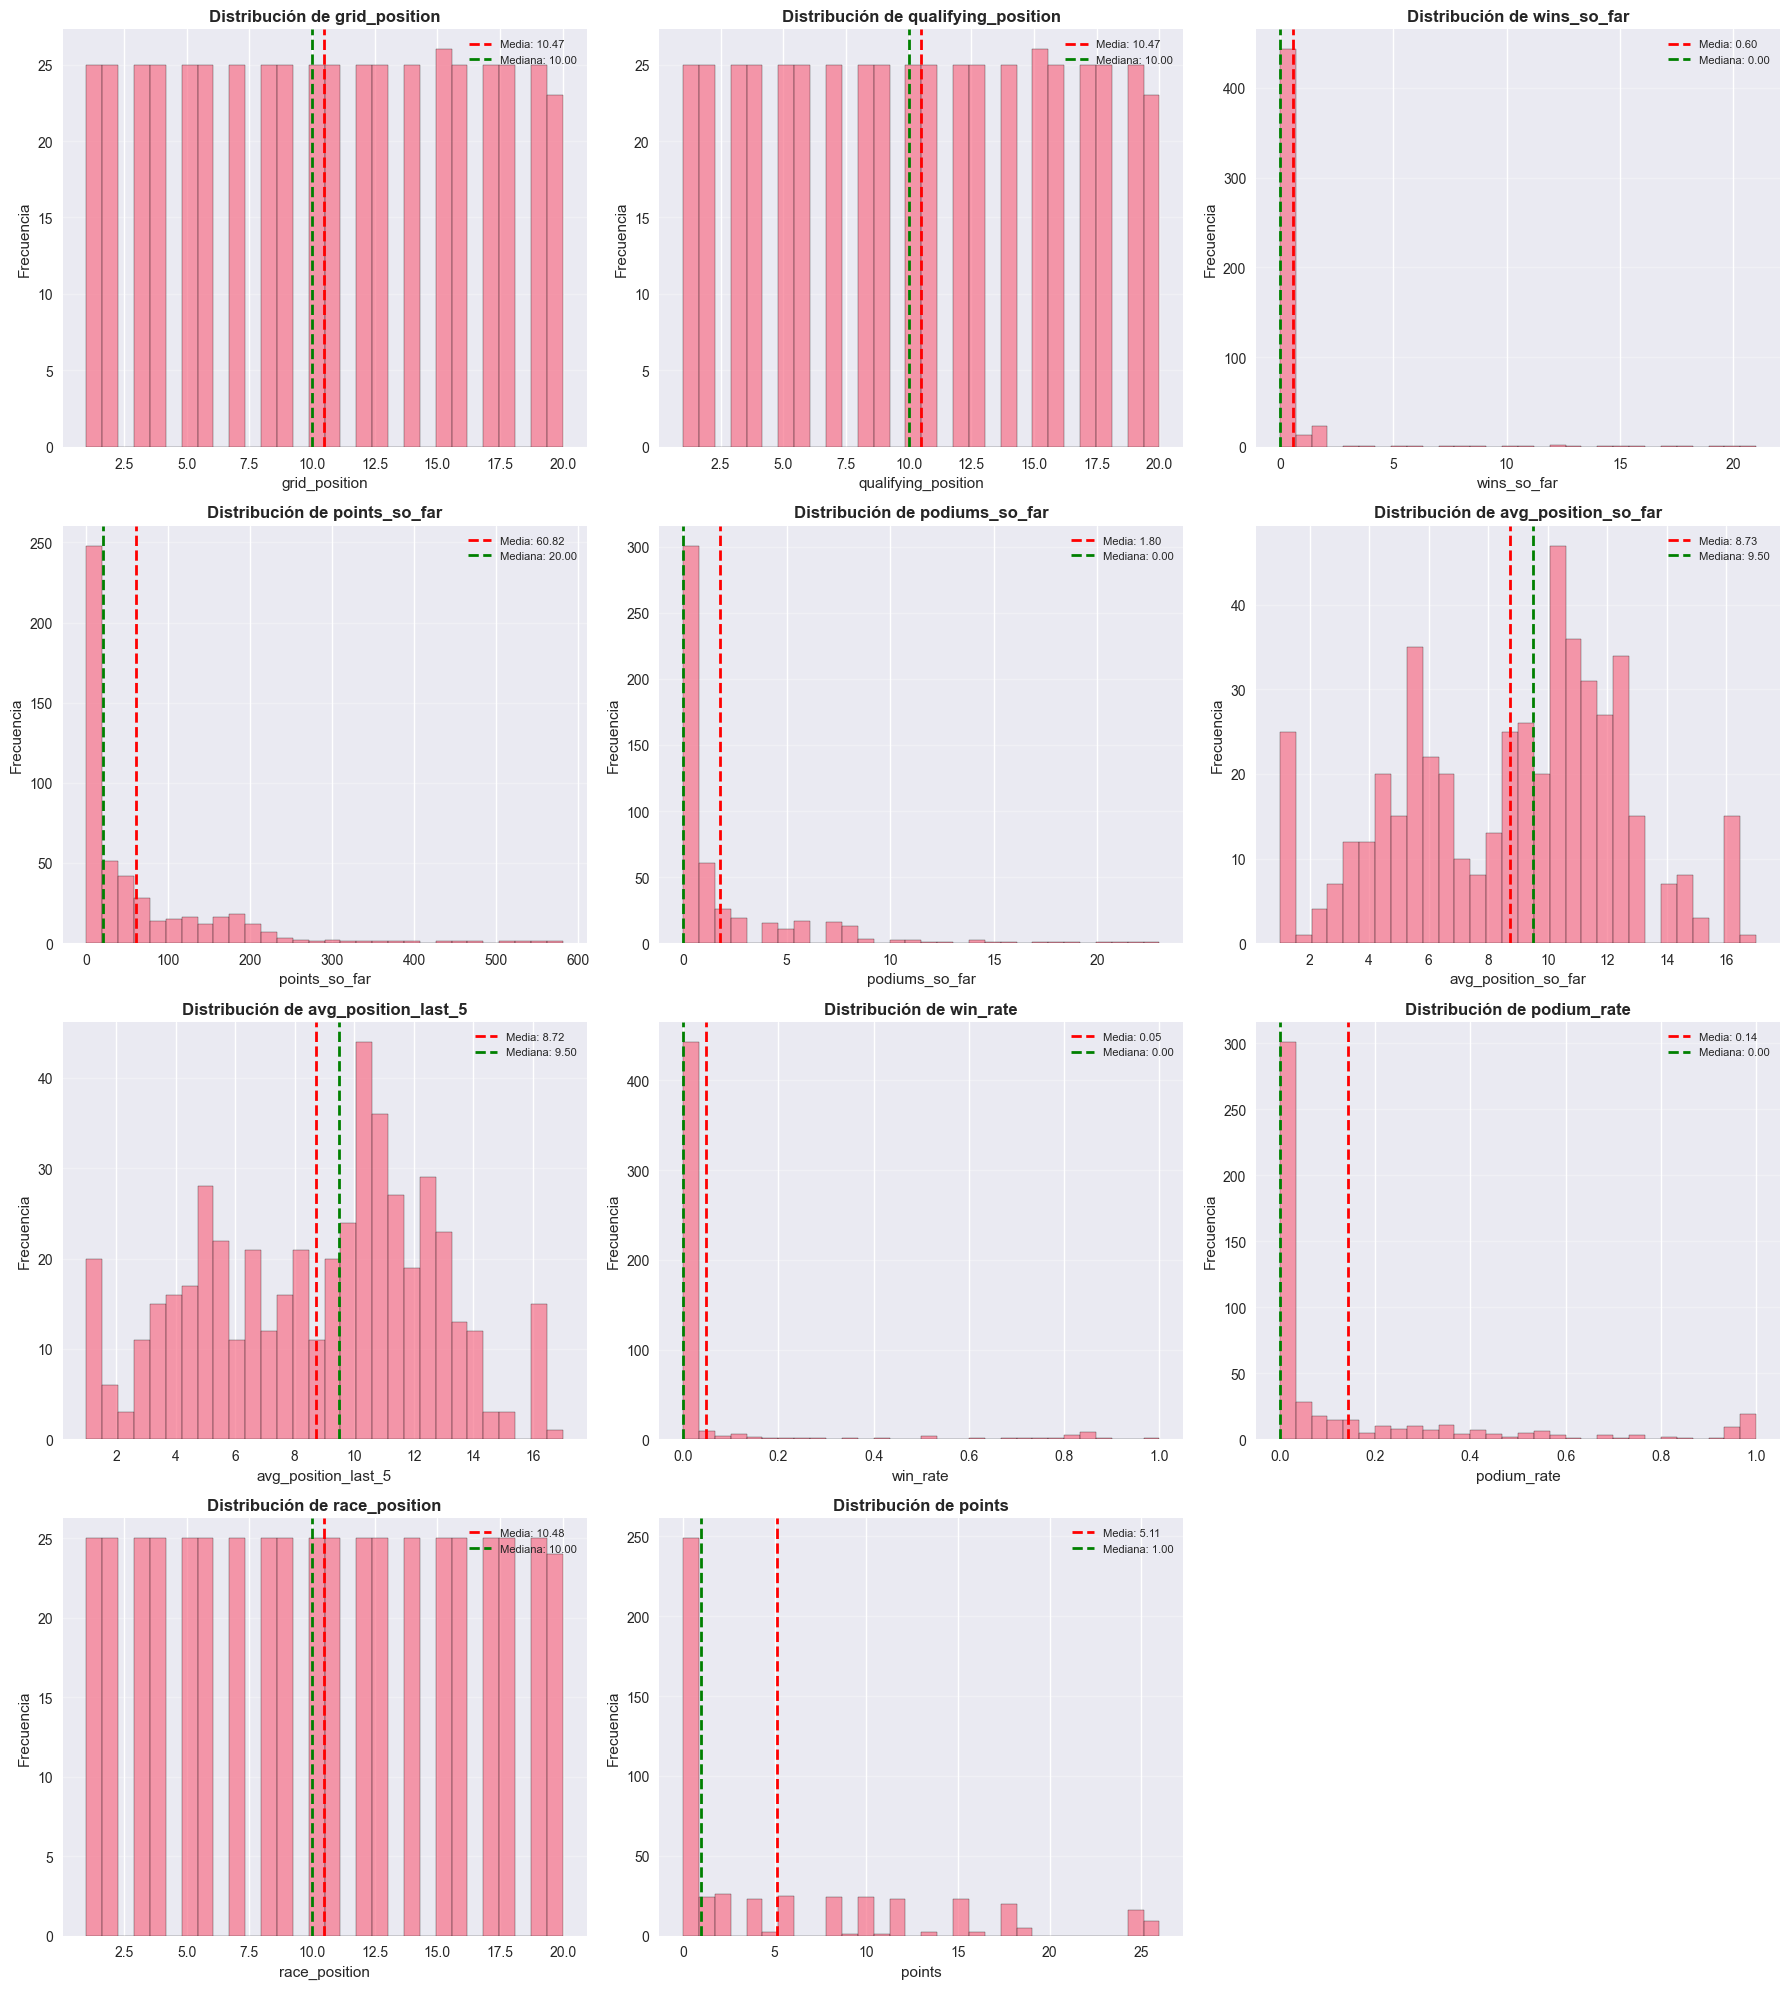


ASIMETRÍA Y CURTOSIS
            Feature  Asimetría  Curtosis
        wins_so_far   5.592038 32.607994
           win_rate   3.929120 14.352735
     podiums_so_far   2.960866 10.626171
      points_so_far   2.472373  7.881086
        podium_rate   2.126791  3.610402
             points   1.393622  0.948075
avg_position_so_far  -0.244434 -0.674784
avg_position_last_5  -0.223297 -0.820917
      grid_position  -0.001992 -1.203915
qualifying_position  -0.001992 -1.203915
      race_position   0.000914 -1.204885


In [12]:
# Distribuciones de variables numéricas clave
print("=" * 60)
print("DISTRIBUCIONES DE VARIABLES CLAVE")
print("=" * 60)

# Seleccionar variables clave para visualizar
key_features = [
    'grid_position', 'qualifying_position',
    'wins_so_far', 'points_so_far', 'podiums_so_far',
    'avg_position_so_far', 'avg_position_last_5',
    'win_rate', 'podium_rate',
    'race_position', 'points'
]

# Filtrar solo las que existen en el dataset
key_features = [f for f in key_features if f in df_clean.columns]

# Crear subplots
n_features = len(key_features)
n_cols = 3
n_rows = (n_features + n_cols - 1) // n_cols

fig, axes = plt.subplots(n_rows, n_cols, figsize=(18, 5 * n_rows))
axes = axes.flatten() if n_features > 1 else [axes]

for idx, feature in enumerate(key_features):
    ax = axes[idx]
    df_clean[feature].hist(bins=30, ax=ax, edgecolor='black', alpha=0.7)
    ax.set_title(f'Distribución de {feature}', fontsize=12, fontweight='bold')
    ax.set_xlabel(feature)
    ax.set_ylabel('Frecuencia')
    ax.grid(axis='y', alpha=0.3)
    
    # Agregar estadísticas
    mean_val = df_clean[feature].mean()
    median_val = df_clean[feature].median()
    ax.axvline(mean_val, color='red', linestyle='--', linewidth=2, label=f'Media: {mean_val:.2f}')
    ax.axvline(median_val, color='green', linestyle='--', linewidth=2, label=f'Mediana: {median_val:.2f}')
    ax.legend(fontsize=8)

# Ocultar subplots vacíos
for idx in range(n_features, len(axes)):
    axes[idx].axis('off')

plt.tight_layout()
plt.show()

# Estadísticas de asimetría y curtosis
print("\n" + "=" * 60)
print("ASIMETRÍA Y CURTOSIS")
print("=" * 60)
from scipy import stats

skew_kurt = pd.DataFrame({
    'Feature': key_features,
    'Asimetría': [stats.skew(df_clean[f].dropna()) for f in key_features],
    'Curtosis': [stats.kurtosis(df_clean[f].dropna()) for f in key_features]
})
skew_kurt = skew_kurt.sort_values('Asimetría', key=abs, ascending=False)
print(skew_kurt.to_string(index=False))


ANÁLISIS DE VARIABLES TARGET


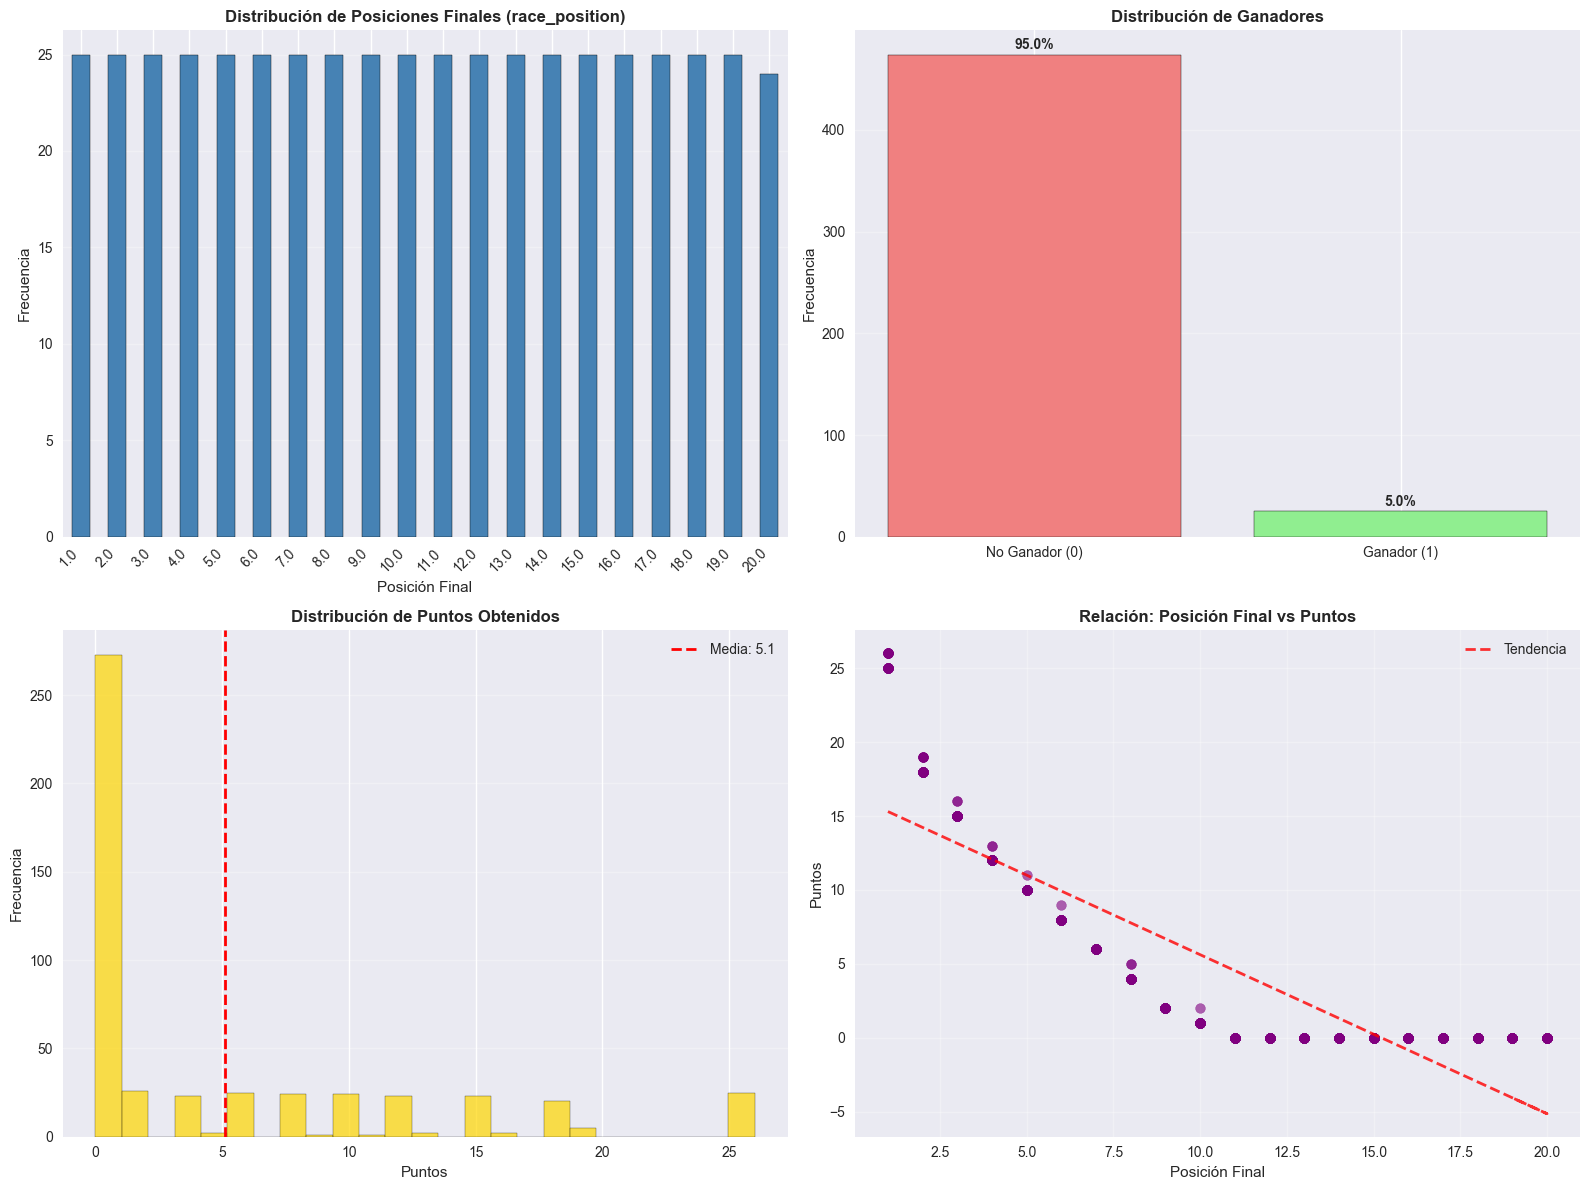


ESTADÍSTICAS DE TARGETS

📊 RACE_POSITION:
   Media: 10.48
   Mediana: 10.00
   Desviación estándar: 5.76
   Rango: 1 - 20

🏆 WINNER:
   Total de ganadores: 25
   Total de no ganadores: 474
   Porcentaje de ganadores: 5.01%
   Carreras únicas: 25
   Ganadores por carrera: 25

💯 POINTS:
   Media: 5.11
   Mediana: 1.00
   Máximo: 26
   Mínimo: 0

TOP 10 PILOTOS CON MÁS VICTORIAS
driver_code
VER    21
PER     2
SAI     2
BOT     0
ALB     0
ALO     0
BEA     0
HAM     0
GAS     0
DEV     0


In [13]:
# Análisis de variables target
print("=" * 60)
print("ANÁLISIS DE VARIABLES TARGET")
print("=" * 60)

# Crear figura con subplots
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# 1. Distribución de race_position
ax1 = axes[0, 0]
df_clean['race_position'].value_counts().sort_index().plot(kind='bar', ax=ax1, color='steelblue', edgecolor='black')
ax1.set_title('Distribución de Posiciones Finales (race_position)', fontsize=12, fontweight='bold')
ax1.set_xlabel('Posición Final')
ax1.set_ylabel('Frecuencia')
ax1.grid(axis='y', alpha=0.3)
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45, ha='right')

# 2. Distribución de winner (binaria)
ax2 = axes[0, 1]
winner_counts = df_clean['winner'].value_counts()
ax2.bar(['No Ganador (0)', 'Ganador (1)'], winner_counts.values, color=['lightcoral', 'lightgreen'], edgecolor='black')
ax2.set_title('Distribución de Ganadores', fontsize=12, fontweight='bold')
ax2.set_ylabel('Frecuencia')
ax2.grid(axis='y', alpha=0.3)
# Agregar porcentajes
total = winner_counts.sum()
for i, (label, count) in enumerate(winner_counts.items()):
    pct = (count / total) * 100
    ax2.text(i, count + 5, f'{pct:.1f}%', ha='center', fontweight='bold')

# 3. Distribución de points
ax3 = axes[1, 0]
df_clean['points'].hist(bins=25, ax=ax3, color='gold', edgecolor='black', alpha=0.7)
ax3.set_title('Distribución de Puntos Obtenidos', fontsize=12, fontweight='bold')
ax3.set_xlabel('Puntos')
ax3.set_ylabel('Frecuencia')
ax3.grid(axis='y', alpha=0.3)
# Agregar líneas de referencia
ax3.axvline(df_clean['points'].mean(), color='red', linestyle='--', linewidth=2, label=f'Media: {df_clean["points"].mean():.1f}')
ax3.legend()

# 4. Relación entre race_position y points
ax4 = axes[1, 1]
df_clean.plot.scatter(x='race_position', y='points', ax=ax4, alpha=0.6, s=50, color='purple')
ax4.set_title('Relación: Posición Final vs Puntos', fontsize=12, fontweight='bold')
ax4.set_xlabel('Posición Final')
ax4.set_ylabel('Puntos')
ax4.grid(alpha=0.3)
# Agregar línea de tendencia
z = np.polyfit(df_clean['race_position'], df_clean['points'], 1)
p = np.poly1d(z)
ax4.plot(df_clean['race_position'], p(df_clean['race_position']), "r--", alpha=0.8, linewidth=2, label='Tendencia')
ax4.legend()

plt.tight_layout()
plt.show()

# Estadísticas de targets
print("\n" + "=" * 60)
print("ESTADÍSTICAS DE TARGETS")
print("=" * 60)

print("\n📊 RACE_POSITION:")
print(f"   Media: {df_clean['race_position'].mean():.2f}")
print(f"   Mediana: {df_clean['race_position'].median():.2f}")
print(f"   Desviación estándar: {df_clean['race_position'].std():.2f}")
print(f"   Rango: {df_clean['race_position'].min():.0f} - {df_clean['race_position'].max():.0f}")

print("\n🏆 WINNER:")
print(f"   Total de ganadores: {df_clean['winner'].sum():.0f}")
print(f"   Total de no ganadores: {(df_clean['winner'] == 0).sum():.0f}")
print(f"   Porcentaje de ganadores: {(df_clean['winner'].mean() * 100):.2f}%")
print(f"   Carreras únicas: {df_clean.groupby(['year', 'round_number']).ngroups}")
print(f"   Ganadores por carrera: {df_clean.groupby(['year', 'round_number'])['winner'].sum().sum():.0f}")

print("\n💯 POINTS:")
print(f"   Media: {df_clean['points'].mean():.2f}")
print(f"   Mediana: {df_clean['points'].median():.2f}")
print(f"   Máximo: {df_clean['points'].max():.0f}")
print(f"   Mínimo: {df_clean['points'].min():.0f}")

# Top 10 pilotos con más victorias
print("\n" + "=" * 60)
print("TOP 10 PILOTOS CON MÁS VICTORIAS")
print("=" * 60)
top_winners = df_clean.groupby('driver_code')['winner'].sum().sort_values(ascending=False).head(10)
print(top_winners.to_string())


ANÁLISIS DE CORRELACIONES


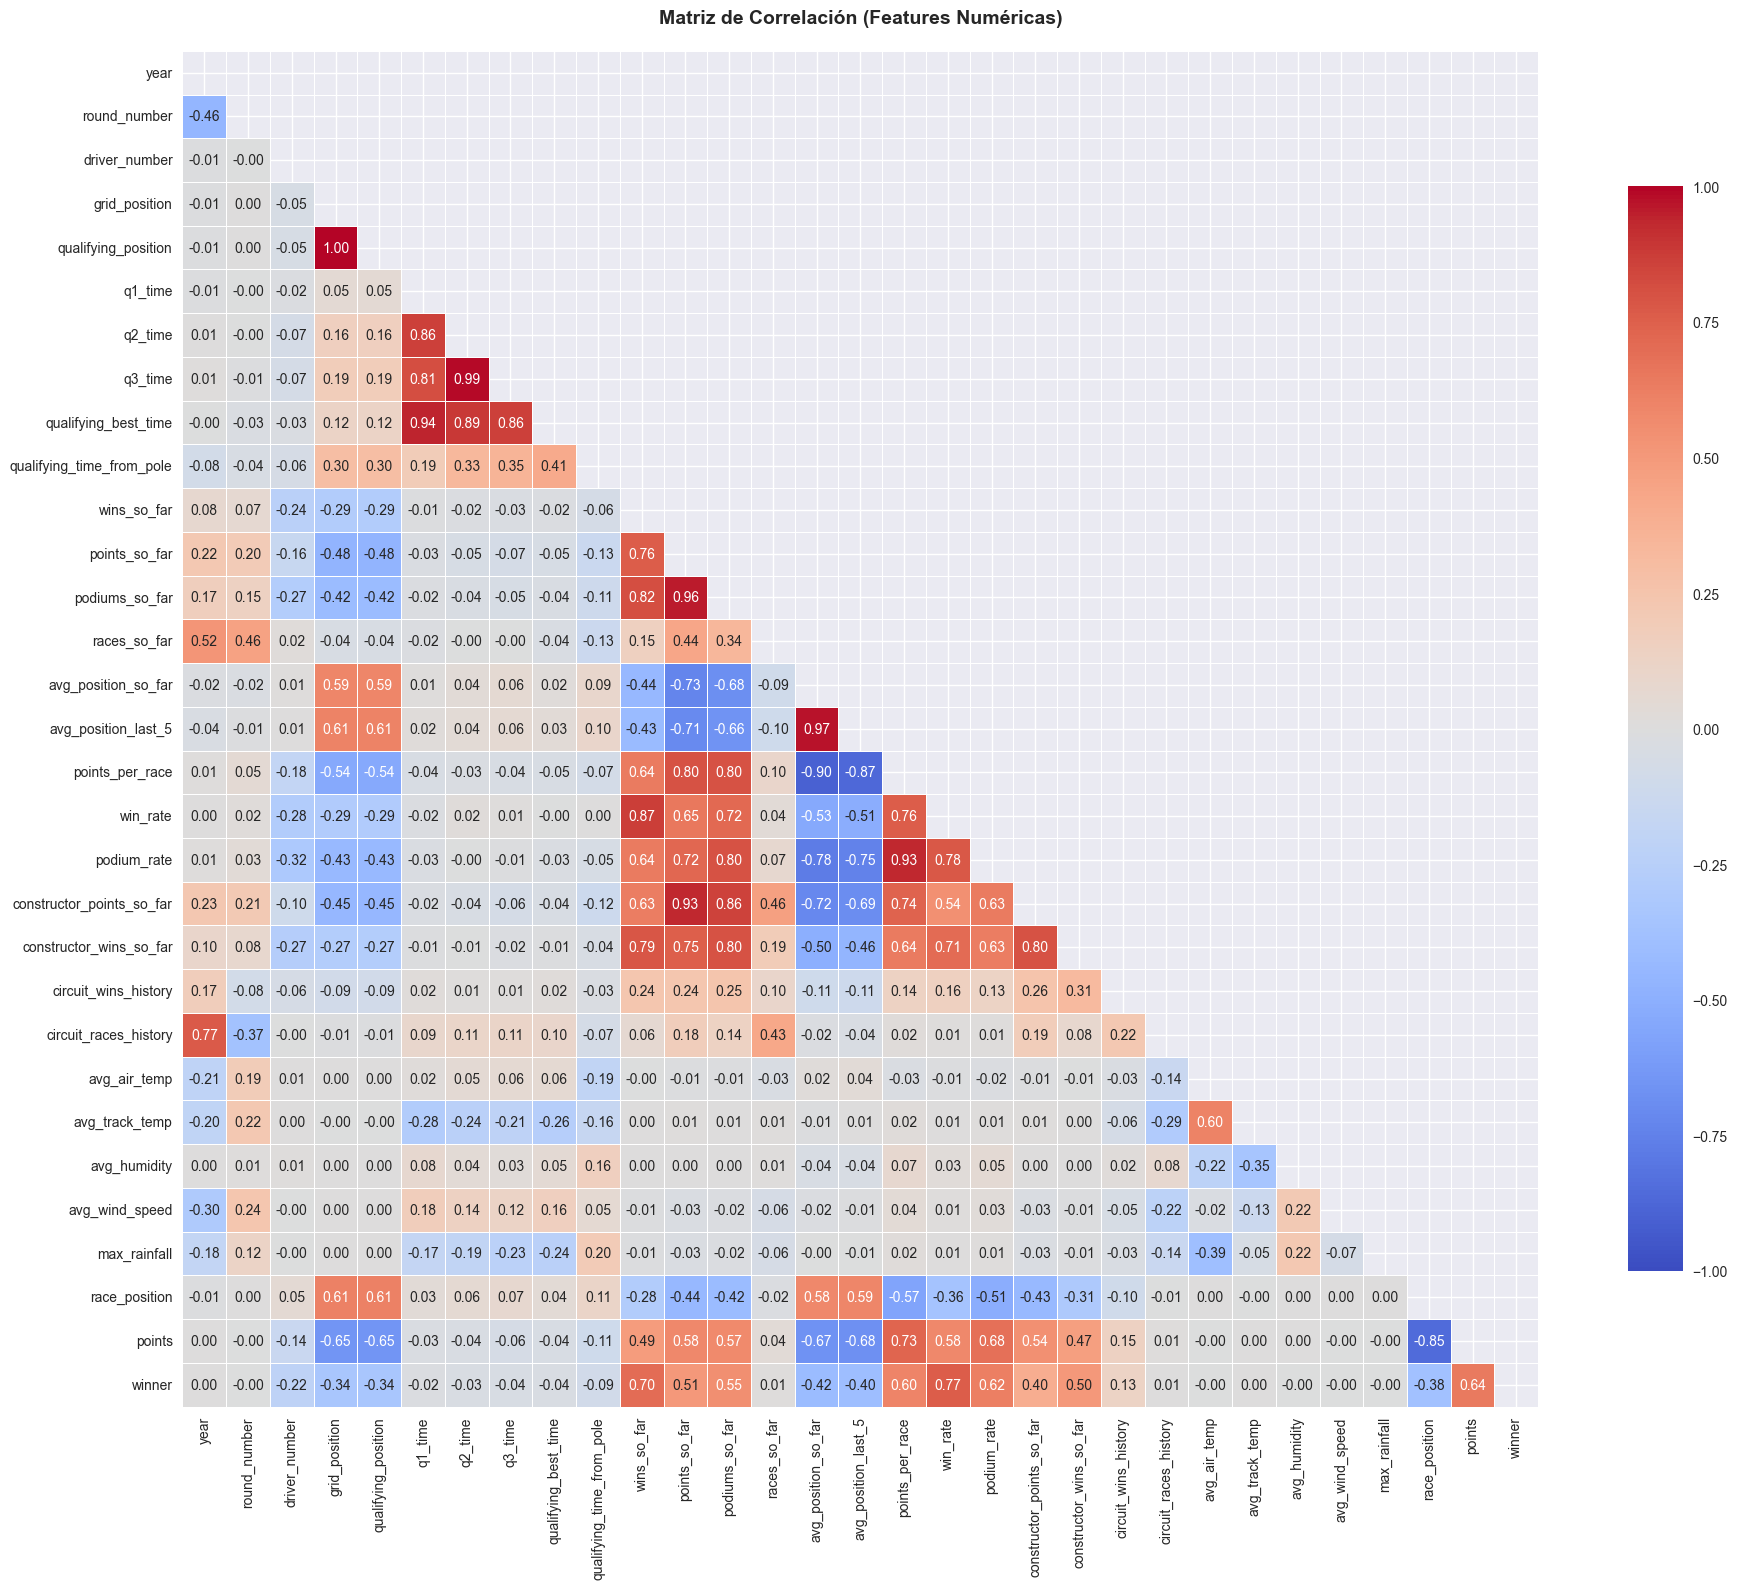


CORRELACIONES CON VARIABLES TARGET

🎯 WINNER:
win_rate                     0.765098
wins_so_far                  0.695842
points                       0.640958
podium_rate                  0.617327
points_per_race              0.597692
podiums_so_far               0.554166
points_so_far                0.505820
constructor_wins_so_far      0.503312
avg_position_so_far         -0.415487
avg_position_last_5         -0.403843
constructor_points_so_far    0.395548
race_position               -0.378257
qualifying_position         -0.343479
grid_position               -0.343479
driver_number               -0.215985


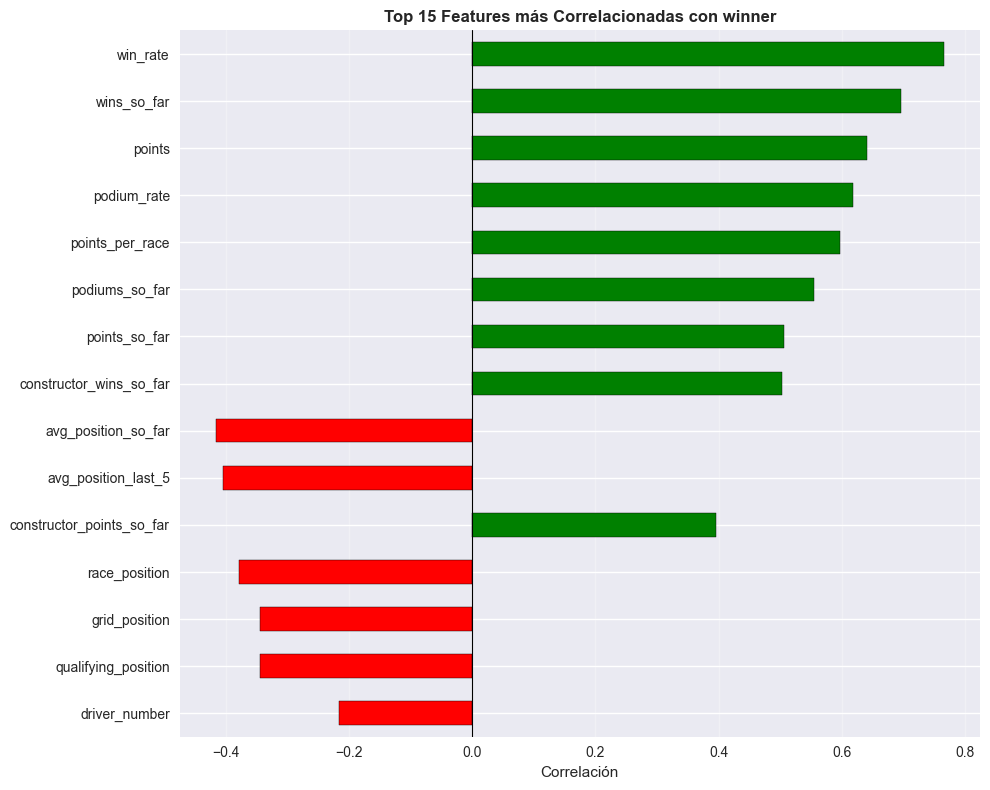


🎯 RACE_POSITION:
points                      -0.853222
grid_position                0.611717
qualifying_position          0.611717
avg_position_last_5          0.590982
avg_position_so_far          0.581771
points_per_race             -0.569146
podium_rate                 -0.509465
points_so_far               -0.439730
constructor_points_so_far   -0.431289
podiums_so_far              -0.417828
winner                      -0.378257
win_rate                    -0.361093
constructor_wins_so_far     -0.312365
wins_so_far                 -0.284803
qualifying_time_from_pole    0.113506


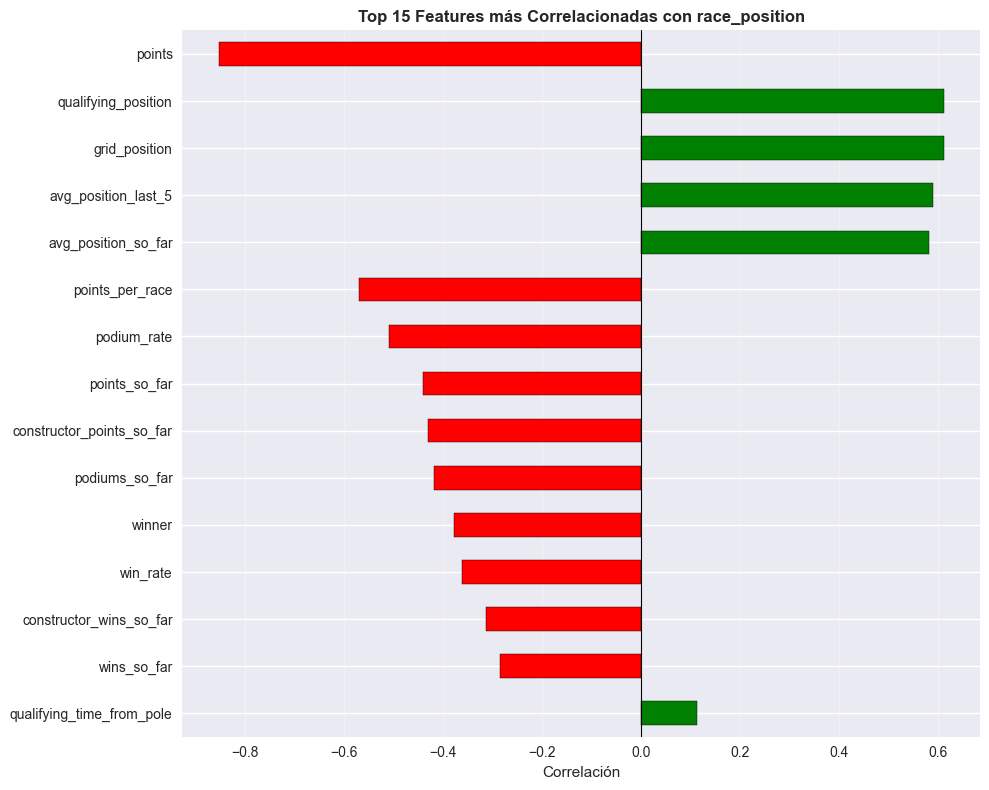


🎯 POINTS:
race_position               -0.853222
points_per_race              0.728839
podium_rate                  0.680214
avg_position_last_5         -0.677628
avg_position_so_far         -0.666634
qualifying_position         -0.649109
grid_position               -0.649109
winner                       0.640958
win_rate                     0.583448
points_so_far                0.578319
podiums_so_far               0.572058
constructor_points_so_far    0.542535
wins_so_far                  0.485010
constructor_wins_so_far      0.469617
circuit_wins_history         0.147675


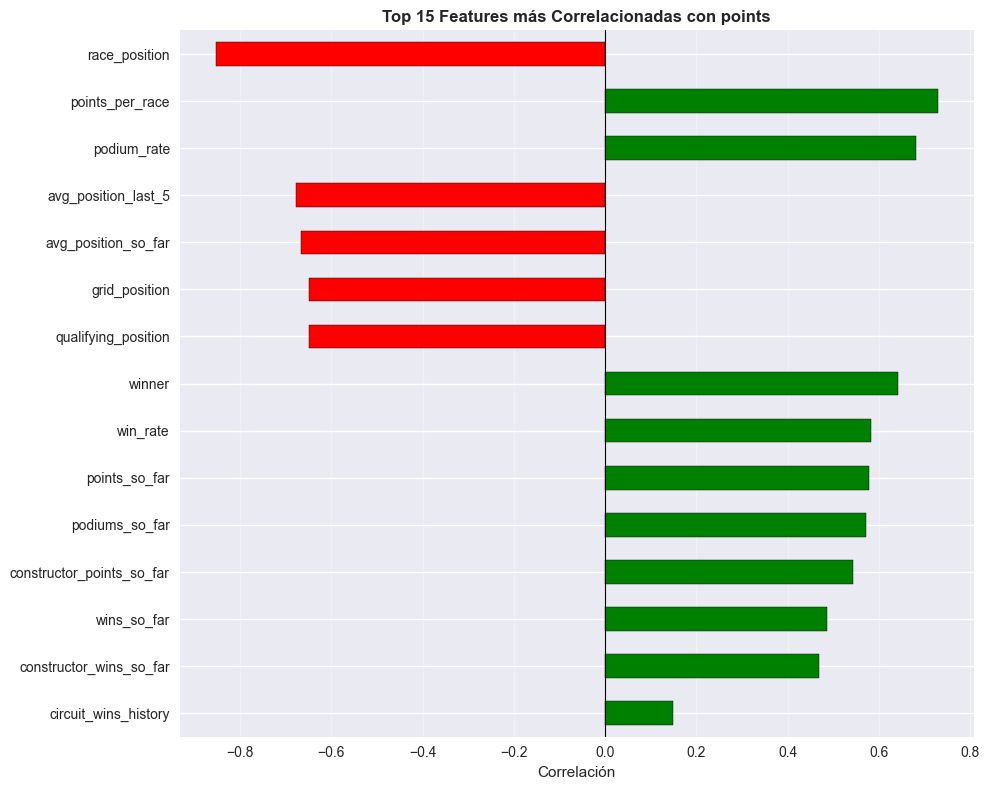

In [14]:
# Matriz de correlación
print("=" * 60)
print("ANÁLISIS DE CORRELACIONES")
print("=" * 60)

# Seleccionar solo columnas numéricas para correlación
numeric_cols = df_clean.select_dtypes(include=[np.number]).columns.tolist()
corr_matrix = df_clean[numeric_cols].corr()

# Visualizar matriz de correlación completa
fig, ax = plt.subplots(figsize=(20, 16))
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))  # Máscara para mostrar solo triángulo inferior
sns.heatmap(corr_matrix, mask=mask, annot=True, fmt='.2f', cmap='coolwarm', 
            center=0, square=True, linewidths=0.5, cbar_kws={"shrink": 0.8},
            ax=ax, vmin=-1, vmax=1)
ax.set_title('Matriz de Correlación (Features Numéricas)', fontsize=14, fontweight='bold', pad=20)
plt.tight_layout()
plt.show()

# Correlaciones más altas con targets
print("\n" + "=" * 60)
print("CORRELACIONES CON VARIABLES TARGET")
print("=" * 60)

targets = ['winner', 'race_position', 'points']
for target in targets:
    if target in corr_matrix.columns:
        print(f"\n🎯 {target.upper()}:")
        corr_with_target = corr_matrix[target].sort_values(key=abs, ascending=False)
        # Excluir la correlación consigo mismo
        corr_with_target = corr_with_target[corr_with_target.index != target]
        # Mostrar top 15
        top_corr = corr_with_target.head(15)
        print(top_corr.to_string())
        
        # Visualización de top correlaciones
        fig, ax = plt.subplots(figsize=(10, 8))
        top_corr_abs = top_corr.abs().sort_values(ascending=True)
        colors = ['red' if x < 0 else 'green' for x in top_corr.reindex(top_corr_abs.index)]
        top_corr.reindex(top_corr_abs.index).plot(kind='barh', ax=ax, color=colors, edgecolor='black')
        ax.set_title(f'Top 15 Features más Correlacionadas con {target}', fontsize=12, fontweight='bold')
        ax.set_xlabel('Correlación')
        ax.axvline(0, color='black', linewidth=0.8)
        ax.grid(axis='x', alpha=0.3)
        plt.tight_layout()
        plt.show()


### 11.5 Análisis de Features por Target (Winner vs No Winner)


COMPARACIÓN: GANADORES vs NO GANADORES

📊 Tamaños de grupos:
   Ganadores: 25 registros
   No ganadores: 474 registros

COMPARACIÓN DE MEDIAS
                  Feature  Media_Ganadores  Media_NoGanadores  Diferencia  Diferencia_Pct
constructor_points_so_far       414.080000         105.757384  308.322616          291.54
            points_so_far       260.800000          50.272152  210.527848          418.78
  constructor_wins_so_far        10.160000           0.727848    9.432152         1295.90
            grid_position         1.880000          10.924051   -9.044051          -82.79
      qualifying_position         1.880000          10.924051   -9.044051          -82.79
           podiums_so_far        10.280000           1.348101    8.931899          662.55
              wins_so_far         8.480000           0.183544    8.296456         4520.14
      avg_position_last_5         2.086667           9.072539   -6.985872          -77.00
      avg_position_so_far         2.124573      

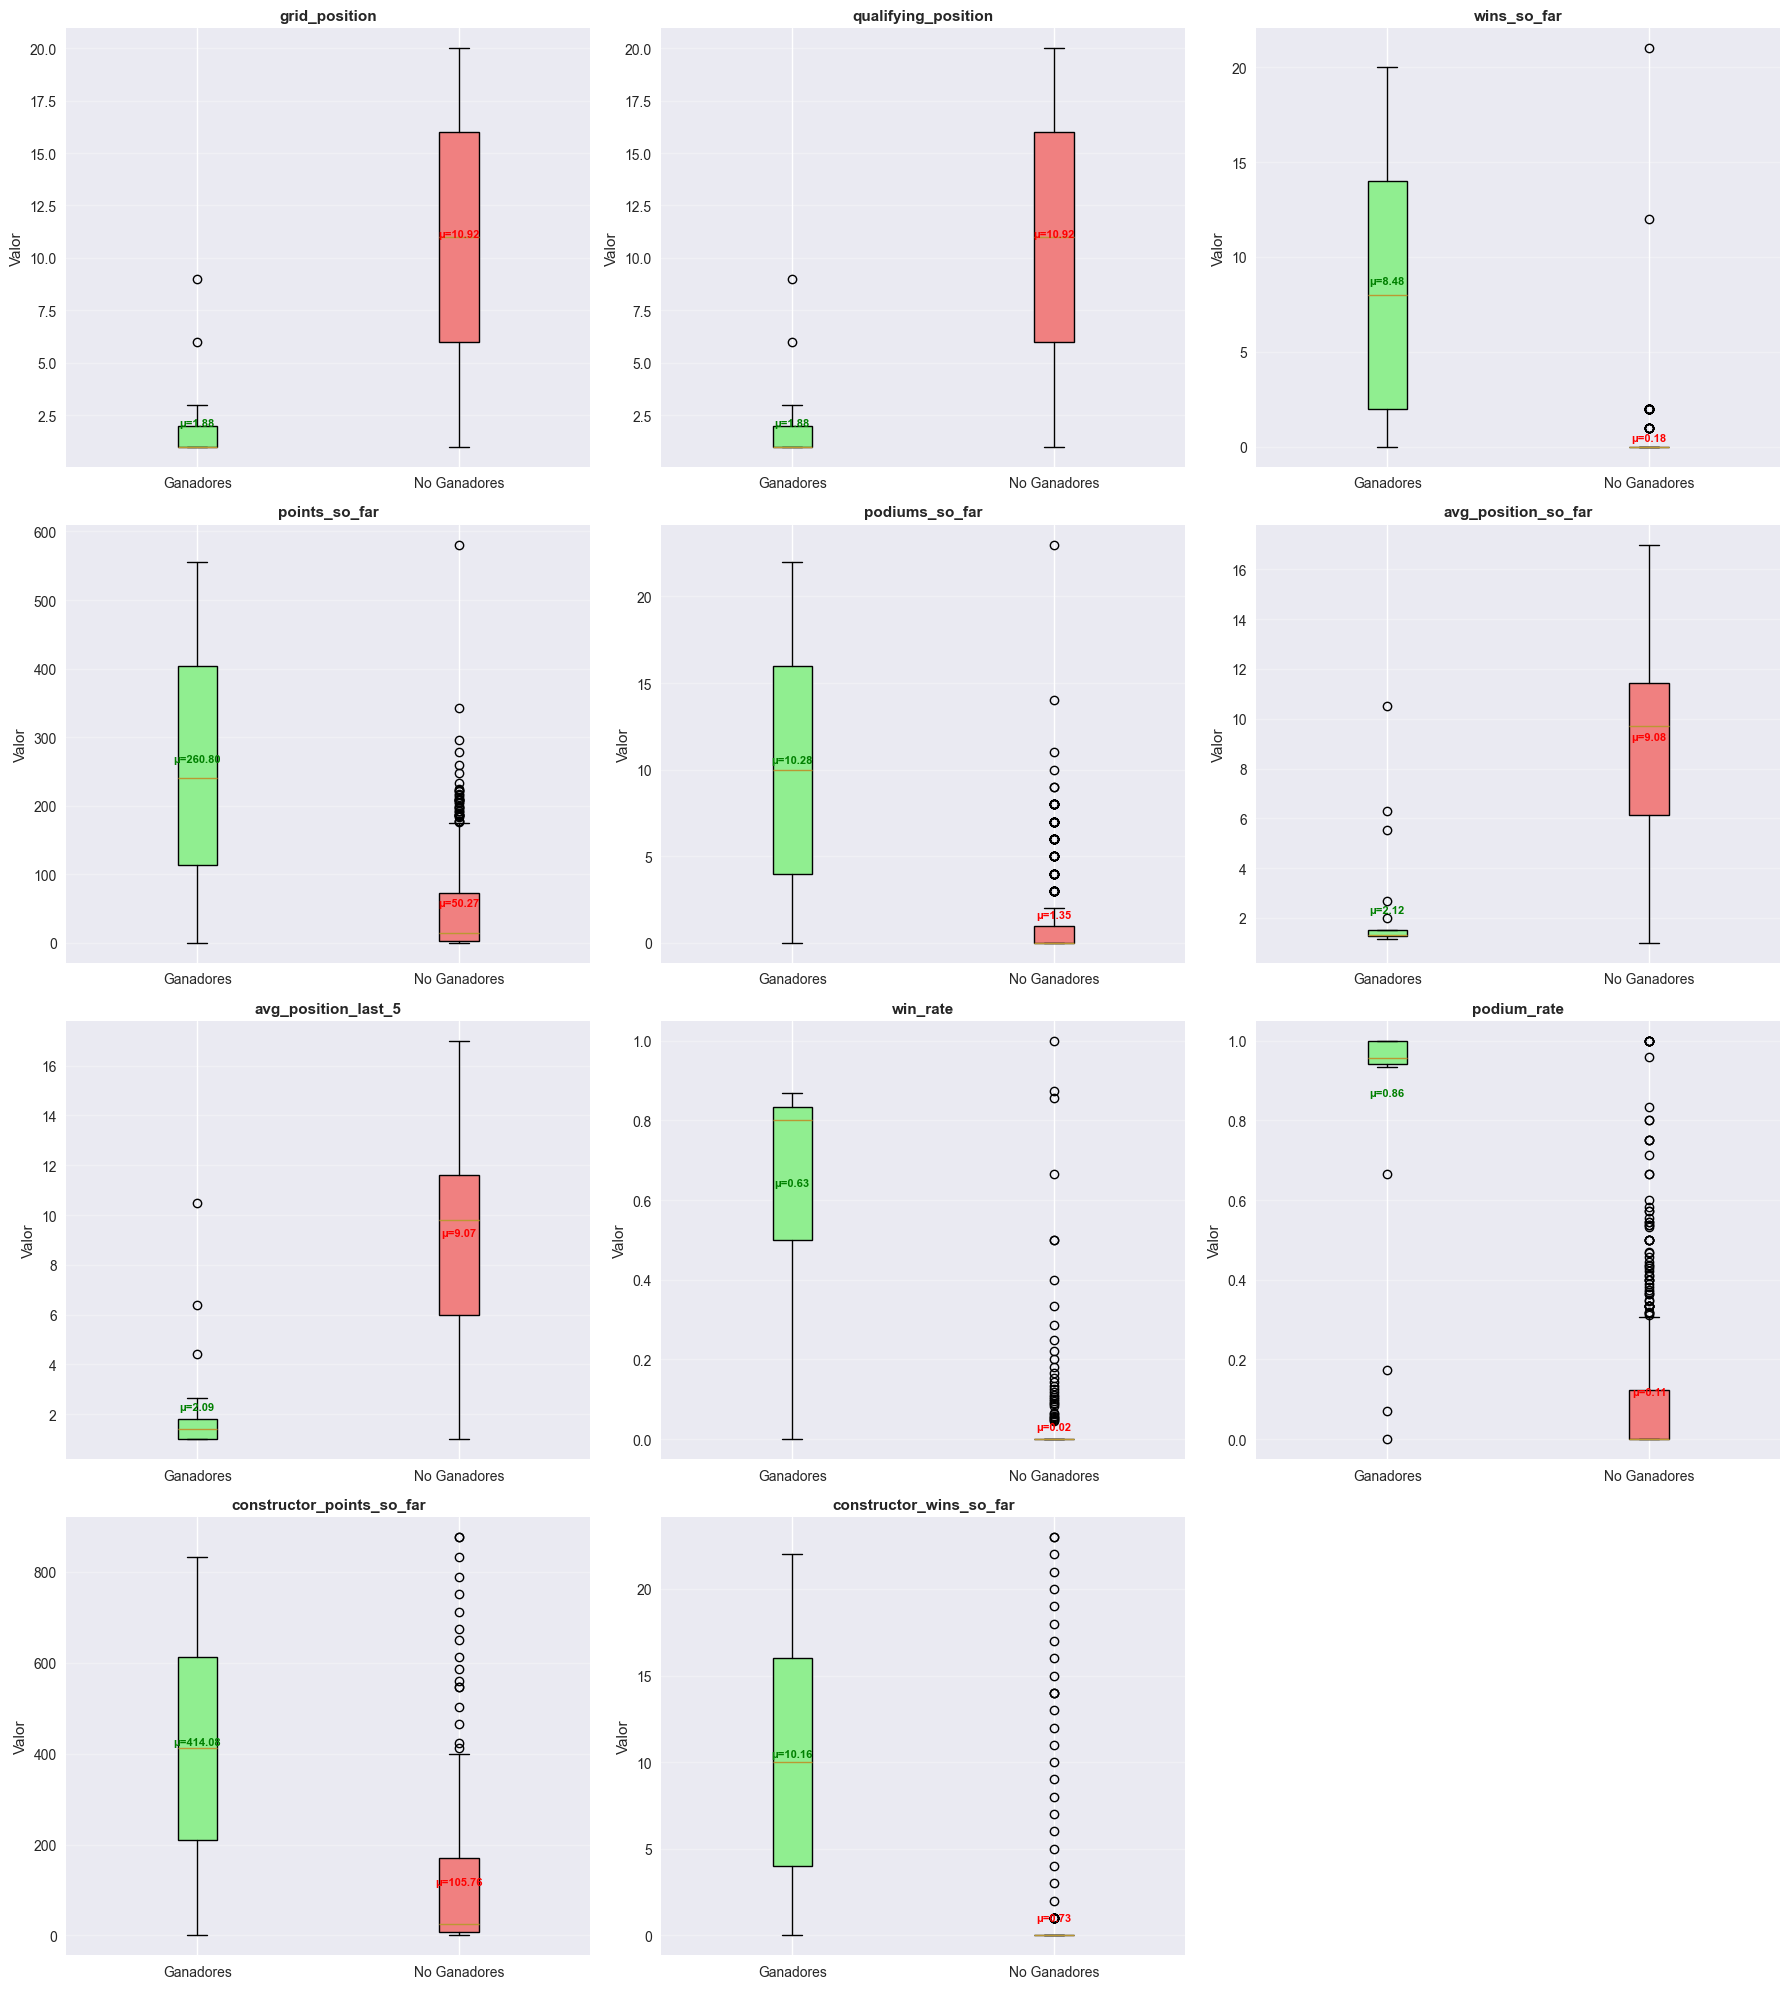

In [15]:
# Comparar features entre ganadores y no ganadores
print("=" * 60)
print("COMPARACIÓN: GANADORES vs NO GANADORES")
print("=" * 60)

# Separar datos
winners = df_clean[df_clean['winner'] == 1]
non_winners = df_clean[df_clean['winner'] == 0]

print(f"\n📊 Tamaños de grupos:")
print(f"   Ganadores: {len(winners)} registros")
print(f"   No ganadores: {len(non_winners)} registros")

# Features clave para comparar
comparison_features = [
    'grid_position', 'qualifying_position',
    'wins_so_far', 'points_so_far', 'podiums_so_far',
    'avg_position_so_far', 'avg_position_last_5',
    'win_rate', 'podium_rate',
    'constructor_points_so_far', 'constructor_wins_so_far'
]

# Filtrar solo las que existen
comparison_features = [f for f in comparison_features if f in df_clean.columns]

# Crear comparación estadística
comparison_stats = pd.DataFrame({
    'Feature': comparison_features,
    'Media_Ganadores': [winners[f].mean() for f in comparison_features],
    'Media_NoGanadores': [non_winners[f].mean() for f in comparison_features],
    'Diferencia': [winners[f].mean() - non_winners[f].mean() for f in comparison_features]
})
comparison_stats['Diferencia_Pct'] = ((comparison_stats['Diferencia'] / comparison_stats['Media_NoGanadores']) * 100).round(2)
comparison_stats = comparison_stats.sort_values('Diferencia', key=abs, ascending=False)

print("\n" + "=" * 60)
print("COMPARACIÓN DE MEDIAS")
print("=" * 60)
print(comparison_stats.to_string(index=False))

# Visualización comparativa
n_features = len(comparison_features)
n_cols = 3
n_rows = (n_features + n_cols - 1) // n_cols

fig, axes = plt.subplots(n_rows, n_cols, figsize=(18, 5 * n_rows))
axes = axes.flatten() if n_features > 1 else [axes]

for idx, feature in enumerate(comparison_features):
    ax = axes[idx]
    
    # Crear datos para boxplot
    data_to_plot = [winners[feature].dropna(), non_winners[feature].dropna()]
    bp = ax.boxplot(data_to_plot, tick_labels=['Ganadores', 'No Ganadores'], patch_artist=True)
    
    # Colorear boxes
    bp['boxes'][0].set_facecolor('lightgreen')
    bp['boxes'][1].set_facecolor('lightcoral')
    
    ax.set_title(f'{feature}', fontsize=11, fontweight='bold')
    ax.set_ylabel('Valor')
    ax.grid(axis='y', alpha=0.3)
    
    # Agregar estadísticas
    mean_w = winners[feature].mean()
    mean_nw = non_winners[feature].mean()
    ax.text(1, mean_w, f'μ={mean_w:.2f}', ha='center', va='bottom', fontsize=8, color='green', fontweight='bold')
    ax.text(2, mean_nw, f'μ={mean_nw:.2f}', ha='center', va='bottom', fontsize=8, color='red', fontweight='bold')

# Ocultar subplots vacíos
for idx in range(n_features, len(axes)):
    axes[idx].axis('off')

plt.tight_layout()
plt.show()


ANÁLISIS TEMPORAL Y POR CIRCUITO


C:\Users\infan\AppData\Local\Temp\ipykernel_7960\1581633588.py:43: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax4.set_xticklabels(ax4.get_xticklabels(), rotation=0)


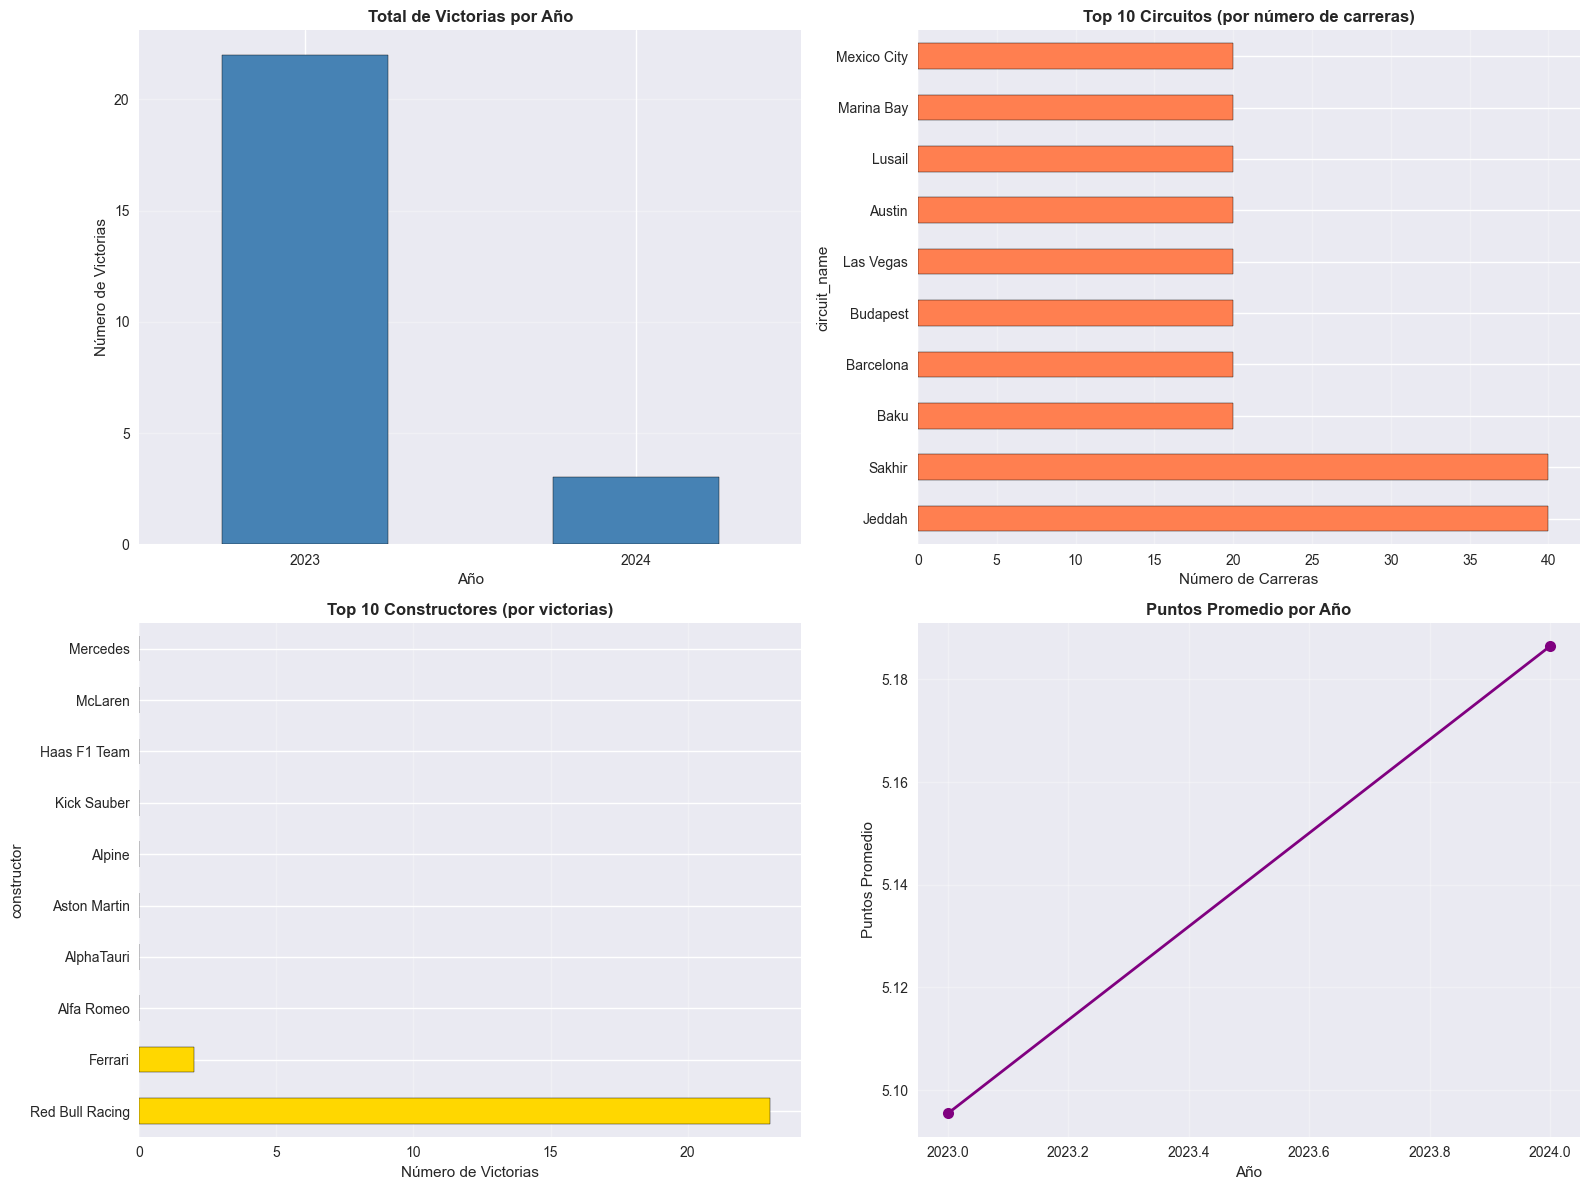


ESTADÍSTICAS POR AÑO
      Total_Victorias  Puntos_Promedio  Posición_Promedio  Carreras
year                                                               
2023               22             5.10              10.50        22
2024                3             5.19              10.34         3

TOP CIRCUITOS Y CONSTRUCTORES

🏁 Top 5 Circuitos (por carreras):
circuit_name
Jeddah       40
Sakhir       40
Baku         20
Barcelona    20
Budapest     20

🏎️ Top 5 Constructores (por victorias):
constructor
Red Bull Racing    23
Ferrari             2
Alfa Romeo          0
AlphaTauri          0
Aston Martin        0


In [16]:
# Análisis temporal y por circuito
print("=" * 60)
print("ANÁLISIS TEMPORAL Y POR CIRCUITO")
print("=" * 60)

# Crear figura con subplots
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# 1. Victorias por año
ax1 = axes[0, 0]
wins_by_year = df_clean.groupby('year')['winner'].sum()
wins_by_year.plot(kind='bar', ax=ax1, color='steelblue', edgecolor='black')
ax1.set_title('Total de Victorias por Año', fontsize=12, fontweight='bold')
ax1.set_xlabel('Año')
ax1.set_ylabel('Número de Victorias')
ax1.grid(axis='y', alpha=0.3)
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=0)

# 2. Top 10 circuitos con más carreras
ax2 = axes[0, 1]
races_by_circuit = df_clean.groupby('circuit_name').size().sort_values(ascending=False).head(10)
races_by_circuit.plot(kind='barh', ax=ax2, color='coral', edgecolor='black')
ax2.set_title('Top 10 Circuitos (por número de carreras)', fontsize=12, fontweight='bold')
ax2.set_xlabel('Número de Carreras')
ax2.grid(axis='x', alpha=0.3)

# 3. Distribución de ganadores por constructor
ax3 = axes[1, 0]
wins_by_constructor = df_clean.groupby('constructor')['winner'].sum().sort_values(ascending=False).head(10)
wins_by_constructor.plot(kind='barh', ax=ax3, color='gold', edgecolor='black')
ax3.set_title('Top 10 Constructores (por victorias)', fontsize=12, fontweight='bold')
ax3.set_xlabel('Número de Victorias')
ax3.grid(axis='x', alpha=0.3)

# 4. Evolución de puntos promedio por año
ax4 = axes[1, 1]
avg_points_by_year = df_clean.groupby('year')['points'].mean()
avg_points_by_year.plot(kind='line', ax=ax4, marker='o', linewidth=2, markersize=8, color='purple')
ax4.set_title('Puntos Promedio por Año', fontsize=12, fontweight='bold')
ax4.set_xlabel('Año')
ax4.set_ylabel('Puntos Promedio')
ax4.grid(alpha=0.3)
ax4.set_xticklabels(ax4.get_xticklabels(), rotation=0)

plt.tight_layout()
plt.show()

# Estadísticas por año
print("\n" + "=" * 60)
print("ESTADÍSTICAS POR AÑO")
print("=" * 60)
stats_by_year = df_clean.groupby('year').agg({
    'winner': 'sum',
    'points': 'mean',
    'race_position': 'mean',
    'round_number': 'max'
}).round(2)
stats_by_year.columns = ['Total_Victorias', 'Puntos_Promedio', 'Posición_Promedio', 'Carreras']
print(stats_by_year.to_string())

# Top circuitos y constructores
print("\n" + "=" * 60)
print("TOP CIRCUITOS Y CONSTRUCTORES")
print("=" * 60)
print("\n🏁 Top 5 Circuitos (por carreras):")
print(df_clean.groupby('circuit_name').size().sort_values(ascending=False).head(5).to_string())

print("\n🏎️ Top 5 Constructores (por victorias):")
print(df_clean.groupby('constructor')['winner'].sum().sort_values(ascending=False).head(5).to_string())


### 11.7 Resumen de Insights y Conclusiones del EDA


## 12. Feature Engineering


### 12.1 Verificación de Data Leakage y Selección de Features


In [17]:
# Verificación de data leakage y selección de features
print("=" * 80)
print("VERIFICACIÓN DE DATA LEAKAGE Y SELECCIÓN DE FEATURES")
print("=" * 80)

# IMPORTANTE: Verificar qué features son PRE-race vs POST-race
print("\n🔍 ANÁLISIS DE FEATURES:")
print("\n📋 Features que DEBEN eliminarse (POST-race / data leakage):")
post_race_features = ['points', 'race_position', 'winner']
print(f"   • {', '.join(post_race_features)}")
print("   Razón: Estas son las variables target o se calculan DESPUÉS de la carrera")

print("\n📋 Features que son PRE-race (válidas para modelado):")
pre_race_features = [
    # Identificadores (útil para tracking, pero no para modelado)
    'year', 'round_number', 'driver_number', 'driver_code', 'constructor', 'circuit_name',
    # Pre-race: Posiciones y tiempos de clasificación
    'grid_position', 'qualifying_position', 'q1_time', 'q2_time', 'q3_time',
    'qualifying_best_time', 'qualifying_time_from_pole',
    # Pre-race: Historial del piloto (hasta ANTES de esta carrera)
    'wins_so_far', 'points_so_far', 'podiums_so_far', 'races_so_far',
    'avg_position_so_far', 'avg_position_last_5',
    'points_per_race', 'win_rate', 'podium_rate',
    # Pre-race: Historial del constructor
    'constructor_points_so_far', 'constructor_wins_so_far',
    # Pre-race: Historial en el circuito
    'circuit_wins_history', 'circuit_races_history',
    # Pre-race: Condiciones meteorológicas
    'avg_air_temp', 'avg_track_temp', 'avg_humidity', 'avg_wind_speed', 'max_rainfall'
]

# Verificar qué features existen en el dataset
existing_pre_race = [f for f in pre_race_features if f in df_clean.columns]
print(f"   • Total de features PRE-race disponibles: {len(existing_pre_race)}")
print(f"   • Features: {', '.join(existing_pre_race[:10])}... (+ {len(existing_pre_race)-10} más)")

# Crear dataset para modelado (sin data leakage)
print("\n" + "=" * 80)
print("CREANDO DATASET PARA MODELADO")
print("=" * 80)

# Separar features y targets
# Features: todas las numéricas PRE-race + encoding de categóricas
# Targets: winner, race_position, points

# 1. Identificar columnas a eliminar
cols_to_remove = post_race_features.copy()
print(f"\n🗑️  Eliminando {len(cols_to_remove)} columnas con data leakage: {cols_to_remove}")

# 2. Crear copia para feature engineering
df_features = df_clean.copy()

# Guardar targets antes de eliminarlos
targets = {}
for target in ['winner', 'race_position', 'points']:
    if target in df_features.columns:
        targets[target] = df_features[target].copy()
        print(f"   ✓ Target '{target}' guardado ({len(targets[target])} registros)")

# Eliminar targets del dataset de features
df_features = df_features.drop(columns=[col for col in cols_to_remove if col in df_features.columns])
print(f"\n📊 Dataset de features después de eliminar targets: {df_features.shape}")

# Mostrar columnas restantes
print(f"\n📋 Columnas en dataset de features ({len(df_features.columns)}):")
print(f"   • Numéricas: {len(df_features.select_dtypes(include=[np.number]).columns)}")
print(f"   • Categóricas: {len(df_features.select_dtypes(include=['object']).columns)}")
print(f"   • Booleanas: {len(df_features.select_dtypes(include=['bool']).columns)}")


VERIFICACIÓN DE DATA LEAKAGE Y SELECCIÓN DE FEATURES

🔍 ANÁLISIS DE FEATURES:

📋 Features que DEBEN eliminarse (POST-race / data leakage):
   • points, race_position, winner
   Razón: Estas son las variables target o se calculan DESPUÉS de la carrera

📋 Features que son PRE-race (válidas para modelado):
   • Total de features PRE-race disponibles: 31
   • Features: year, round_number, driver_number, driver_code, constructor, circuit_name, grid_position, qualifying_position, q1_time, q2_time... (+ 21 más)

CREANDO DATASET PARA MODELADO

🗑️  Eliminando 3 columnas con data leakage: ['points', 'race_position', 'winner']
   ✓ Target 'winner' guardado (499 registros)
   ✓ Target 'race_position' guardado (499 registros)
   ✓ Target 'points' guardado (499 registros)

📊 Dataset de features después de eliminar targets: (499, 36)

📋 Columnas en dataset de features (36):
   • Numéricas: 28
   • Categóricas: 6
   • Booleanas: 2


### 12.2 Transformaciones para Variables Sesgadas


In [18]:
# Transformaciones para variables sesgadas
print("=" * 80)
print("TRANSFORMACIONES PARA VARIABLES SESGADAS")
print("=" * 80)

# Importar dependencias necesarias
try:
    from scipy import stats
except ImportError:
    print("⚠️  scipy no está instalado. Instalando...")
    import subprocess
    import sys
    subprocess.check_call([sys.executable, "-m", "pip", "install", "scipy"])
    from scipy import stats
    print("✅ scipy instalado correctamente")

# Variables identificadas como muy sesgadas en el EDA
skewed_features = ['wins_so_far', 'win_rate', 'points_so_far', 'podiums_so_far', 
                   'points_per_race', 'podium_rate', 'constructor_wins_so_far',
                   'constructor_points_so_far', 'circuit_wins_history']

# Filtrar solo las que existen en el dataset
skewed_features = [f for f in skewed_features if f in df_features.columns]

print(f"\n📊 Variables a transformar: {len(skewed_features)}")
print(f"   Features: {', '.join(skewed_features)}")

# Calcular asimetría antes de transformar

print("\n" + "=" * 80)
print("ASIMETRÍA ANTES DE TRANSFORMAR")
print("=" * 80)
skew_before = {}
for feature in skewed_features:
    skew_val = stats.skew(df_features[feature].dropna())
    skew_before[feature] = skew_val
    print(f"   • {feature}: {skew_val:.3f}")

# Aplicar transformación logarítmica (log1p para manejar ceros)
print("\n" + "=" * 80)
print("APLICANDO TRANSFORMACIÓN LOGARÍTMICA (log1p)")
print("=" * 80)

df_features_transformed = df_features.copy()

for feature in skewed_features:
    original_name = feature
    new_name = f"{feature}_log"
    
    # Aplicar log1p (log(1+x)) para manejar ceros
    df_features_transformed[new_name] = np.log1p(df_features_transformed[original_name])
    
    # Calcular nueva asimetría
    skew_after = stats.skew(df_features_transformed[new_name].dropna())
    improvement = abs(skew_before[feature]) - abs(skew_after)
    
    print(f"   • {original_name}:")
    print(f"     - Antes: {skew_before[feature]:.3f}")
    print(f"     - Después: {skew_after:.3f}")
    print(f"     - Mejora: {improvement:.3f}")

# Decidir si mantener originales o solo transformadas
# Para modelos de árboles, podemos mantener ambas
# Para modelos lineales, usar solo transformadas

print("\n💡 Decisión: Mantener AMBAS versiones (original + log)")
print("   - Modelos de árboles pueden usar originales")
print("   - Modelos lineales pueden usar transformadas")
print(f"   - Total de features después: {len(df_features_transformed.columns)}")


TRANSFORMACIONES PARA VARIABLES SESGADAS

📊 Variables a transformar: 9
   Features: wins_so_far, win_rate, points_so_far, podiums_so_far, points_per_race, podium_rate, constructor_wins_so_far, constructor_points_so_far, circuit_wins_history

ASIMETRÍA ANTES DE TRANSFORMAR
   • wins_so_far: 5.592
   • win_rate: 3.929
   • points_so_far: 2.472
   • podiums_so_far: 2.961
   • points_per_race: 1.582
   • podium_rate: 2.127
   • constructor_wins_so_far: 3.724
   • constructor_points_so_far: 2.017
   • circuit_wins_history: 15.700

APLICANDO TRANSFORMACIÓN LOGARÍTMICA (log1p)
   • wins_so_far:
     - Antes: 5.592
     - Después: 3.682
     - Mejora: 1.910
   • win_rate:
     - Antes: 3.929
     - Después: 3.759
     - Mejora: 0.170
   • points_so_far:
     - Antes: 2.472
     - Después: -0.099
     - Mejora: 2.373
   • podiums_so_far:
     - Antes: 2.961
     - Después: 1.191
     - Mejora: 1.770
   • points_per_race:
     - Antes: 1.582
     - Después: 0.314
     - Mejora: 1.269
   • podium

### 12.3 Creación de Features Derivadas


In [19]:
# Creación de features derivadas
print("=" * 80)
print("CREACIÓN DE FEATURES DERIVADAS")
print("=" * 80)

df_features_derived = df_features_transformed.copy()

# 1. Features de posición relativa
print("\n1️⃣ Features de Posición Relativa:")
if 'grid_position' in df_features_derived.columns and 'qualifying_position' in df_features_derived.columns:
    # Diferencia entre grid y qualifying (penalizaciones, cambios de motor, etc.)
    df_features_derived['grid_qualifying_diff'] = (
        df_features_derived['grid_position'] - df_features_derived['qualifying_position']
    )
    print("   ✓ grid_qualifying_diff: diferencia entre grid y qualifying position")
    
    # Posición relativa al promedio (normalizada)
    if 'grid_position' in df_features_derived.columns:
        grid_mean = df_features_derived['grid_position'].mean()
        df_features_derived['grid_position_normalized'] = (
            df_features_derived['grid_position'] / grid_mean
        )
        print("   ✓ grid_position_normalized: posición normalizada respecto a la media")

# 2. Features de rendimiento relativo
print("\n2️⃣ Features de Rendimiento Relativo:")
if 'points_so_far' in df_features_derived.columns and 'races_so_far' in df_features_derived.columns:
    # Puntos por carrera (ya existe, pero podemos crear variantes)
    if 'points_per_race' not in df_features_derived.columns:
        df_features_derived['points_per_race_calc'] = (
            df_features_derived['points_so_far'] / (df_features_derived['races_so_far'] + 1)
        )
        print("   ✓ points_per_race_calc: puntos por carrera calculado")

# 3. Features de momentum (tendencia reciente vs histórica)
print("\n3️⃣ Features de Momentum:")
if 'avg_position_last_5' in df_features_derived.columns and 'avg_position_so_far' in df_features_derived.columns:
    # Momentum: diferencia entre rendimiento reciente y histórico
    df_features_derived['momentum_position'] = (
        df_features_derived['avg_position_so_far'] - df_features_derived['avg_position_last_5']
    )
    print("   ✓ momentum_position: diferencia entre promedio histórico y últimas 5 carreras")
    print("     (positivo = mejorando, negativo = empeorando)")

# 4. Features de experiencia
print("\n4️⃣ Features de Experiencia:")
if 'races_so_far' in df_features_derived.columns:
    # Categorías de experiencia
    df_features_derived['experience_level'] = pd.cut(
        df_features_derived['races_so_far'],
        bins=[0, 10, 50, 100, float('inf')],
        labels=['Novato', 'Intermedio', 'Experimentado', 'Veterano']
    )
    print("   ✓ experience_level: categoría de experiencia del piloto")

# 5. Features de rendimiento del constructor relativo
print("\n5️⃣ Features de Constructor Relativo:")
if 'constructor_points_so_far' in df_features_derived.columns:
    # Puntos del constructor normalizados
    constructor_points_mean = df_features_derived['constructor_points_so_far'].mean()
    df_features_derived['constructor_points_normalized'] = (
        df_features_derived['constructor_points_so_far'] / constructor_points_mean
    )
    print("   ✓ constructor_points_normalized: puntos del constructor normalizados")

# 6. Features de condiciones meteorológicas
print("\n6️⃣ Features Meteorológicas:")
if 'avg_air_temp' in df_features_derived.columns and 'avg_track_temp' in df_features_derived.columns:
    # Diferencia entre temperatura de pista y aire
    df_features_derived['temp_track_air_diff'] = (
        df_features_derived['avg_track_temp'] - df_features_derived['avg_air_temp']
    )
    print("   ✓ temp_track_air_diff: diferencia temperatura pista vs aire")
    
if 'max_rainfall' in df_features_derived.columns:
    # Categoría de lluvia
    df_features_derived['rain_category'] = pd.cut(
        df_features_derived['max_rainfall'],
        bins=[0, 0.1, 1.0, float('inf')],
        labels=['Seco', 'Lluvia ligera', 'Lluvia fuerte']
    )
    print("   ✓ rain_category: categoría de lluvia")

# 7. Features de tiempo de clasificación
print("\n7️⃣ Features de Tiempo de Clasificación:")
if 'qualifying_time_from_pole' in df_features_derived.columns:
    # Categoría de tiempo desde pole
    df_features_derived['qualifying_gap_category'] = pd.cut(
        df_features_derived['qualifying_time_from_pole'],
        bins=[0, 0.5, 1.0, 2.0, float('inf')],
        labels=['Muy cerca', 'Cerca', 'Medio', 'Lejos']
    )
    print("   ✓ qualifying_gap_category: categoría de gap desde pole")

print(f"\n📊 Total de features después de crear derivadas: {len(df_features_derived.columns)}")
print(f"   • Features nuevas creadas: {len(df_features_derived.columns) - len(df_features_transformed.columns)}")


CREACIÓN DE FEATURES DERIVADAS

1️⃣ Features de Posición Relativa:
   ✓ grid_qualifying_diff: diferencia entre grid y qualifying position
   ✓ grid_position_normalized: posición normalizada respecto a la media

2️⃣ Features de Rendimiento Relativo:

3️⃣ Features de Momentum:
   ✓ momentum_position: diferencia entre promedio histórico y últimas 5 carreras
     (positivo = mejorando, negativo = empeorando)

4️⃣ Features de Experiencia:
   ✓ experience_level: categoría de experiencia del piloto

5️⃣ Features de Constructor Relativo:
   ✓ constructor_points_normalized: puntos del constructor normalizados

6️⃣ Features Meteorológicas:
   ✓ temp_track_air_diff: diferencia temperatura pista vs aire
   ✓ rain_category: categoría de lluvia

7️⃣ Features de Tiempo de Clasificación:
   ✓ qualifying_gap_category: categoría de gap desde pole

📊 Total de features después de crear derivadas: 53
   • Features nuevas creadas: 8


### 12.4 Encoding de Variables Categóricas


In [20]:
from sklearn.preprocessing import LabelEncoder



# Encoding de variables categóricas
print("=" * 80)
print("ENCODING DE VARIABLES CATEGÓRICAS")
print("=" * 80)

# Importar dependencias necesarias
try:
    from sklearn.preprocessing import LabelEncoder
except ImportError:
    print("⚠️  scikit-learn no está instalado. Instalando...")
    import subprocess
    import sys
    subprocess.check_call([sys.executable, "-m", "pip", "install", "scikit-learn"])
    from sklearn.preprocessing import LabelEncoder
    print("✅ scikit-learn instalado correctamente")

df_features_encoded = df_features_derived.copy()

# Identificar variables categóricas
categorical_cols = df_features_encoded.select_dtypes(include=['object', 'category']).columns.tolist()
print(f"\n📋 Variables categóricas encontradas: {len(categorical_cols)}")
print(f"   Columnas: {', '.join(categorical_cols)}")

# Estrategia de encoding según cardinalidad
print("\n" + "=" * 80)
print("ESTRATEGIA DE ENCODING")
print("=" * 80)

# Categorías con baja cardinalidad (< 20 valores únicos): One-Hot Encoding
# Categorías de alta cardinalidad: Target Encoding o Label Encoding

low_cardinality = []
high_cardinality = []

for col in categorical_cols:
    n_unique = df_features_encoded[col].nunique()
    if n_unique < 20:
        low_cardinality.append((col, n_unique))
    else:
        high_cardinality.append((col, n_unique))

print("\n📊 Categorías de BAJA cardinalidad (One-Hot Encoding):")
for col, n_unique in low_cardinality:
    print(f"   • {col}: {n_unique} valores únicos")

print("\n📊 Categorías de ALTA cardinalidad (Target/Label Encoding):")
for col, n_unique in high_cardinality:
    print(f"   • {col}: {n_unique} valores únicos")

# Aplicar One-Hot Encoding a categorías de baja cardinalidad
print("\n" + "=" * 80)
print("APLICANDO ONE-HOT ENCODING")
print("=" * 80)

# Guardar nombres originales para referencia
original_categorical = categorical_cols.copy()

# One-Hot Encoding para baja cardinalidad
low_card_cols = [col for col, _ in low_cardinality]
if low_card_cols:
    df_encoded = pd.get_dummies(df_features_encoded, columns=low_card_cols, prefix=low_card_cols, drop_first=True)
    print(f"   ✓ One-Hot Encoding aplicado a {len(low_card_cols)} columnas")
    print(f"   ✓ Nuevas columnas creadas: {len(df_encoded.columns) - len(df_features_encoded.columns)}")
else:
    df_encoded = df_features_encoded.copy()
    print("   ℹ️  No hay columnas de baja cardinalidad para One-Hot Encoding")

# Label Encoding para alta cardinalidad (o mantener como identificadores)
print("\n" + "=" * 80)
print("APLICANDO LABEL ENCODING")
print("=" * 80)

high_card_cols = [col for col, _ in high_cardinality]
label_encoders = {}

for col in high_card_cols:
    if col in df_encoded.columns:
        le = LabelEncoder()
        # Manejar valores nulos
        mask = df_encoded[col].notna()
        df_encoded.loc[mask, f'{col}_encoded'] = le.fit_transform(df_encoded.loc[mask, col])
        label_encoders[col] = le
        print(f"   ✓ {col}: Label Encoding aplicado ({df_encoded[col].nunique()} valores únicos)")
        
        # Opcional: eliminar columna original si es solo identificador
        # (driver_code, circuit_name pueden ser útiles como identificadores, no como features)
        if col in ['driver_code', 'circuit_name']:
            print(f"     ⚠️  {col} mantenido como identificador (no se elimina)")

print(f"\n📊 Total de features después de encoding: {len(df_encoded.columns)}")

# Mostrar resumen
print("\n" + "=" * 80)
print("RESUMEN DE ENCODING")
print("=" * 80)
print(f"   • Columnas categóricas originales: {len(original_categorical)}")
print(f"   • One-Hot Encoding: {len(low_card_cols)} columnas")
print(f"   • Label Encoding: {len(high_card_cols)} columnas")
print(f"   • Total de features numéricas finales: {len(df_encoded.select_dtypes(include=[np.number]).columns)}")


ENCODING DE VARIABLES CATEGÓRICAS

📋 Variables categóricas encontradas: 9
   Columnas: circuit_name, country, event_name, driver_code, constructor, status, experience_level, rain_category, qualifying_gap_category

ESTRATEGIA DE ENCODING

📊 Categorías de BAJA cardinalidad (One-Hot Encoding):
   • constructor: 12 valores únicos
   • status: 9 valores únicos
   • experience_level: 2 valores únicos
   • rain_category: 1 valores únicos
   • qualifying_gap_category: 4 valores únicos

📊 Categorías de ALTA cardinalidad (Target/Label Encoding):
   • circuit_name: 23 valores únicos
   • country: 21 valores únicos
   • event_name: 23 valores únicos
   • driver_code: 23 valores únicos

APLICANDO ONE-HOT ENCODING
   ✓ One-Hot Encoding aplicado a 5 columnas
   ✓ Nuevas columnas creadas: 22

APLICANDO LABEL ENCODING
   ✓ circuit_name: Label Encoding aplicado (23 valores únicos)
     ⚠️  circuit_name mantenido como identificador (no se elimina)
   ✓ country: Label Encoding aplicado (21 valores únicos)

### 12.5 Selección Final de Features y Preparación del Dataset


In [21]:
# Selección final de features y preparación del dataset
print("=" * 80)
print("SELECCIÓN FINAL DE FEATURES Y PREPARACIÓN")
print("=" * 80)

# 1. Eliminar columnas que no son features (identificadores, etc.)
print("\n1️⃣ Eliminando columnas no-feature:")

# Columnas a mantener como identificadores (opcional, para tracking)
identifier_cols = ['year', 'round_number', 'driver_code', 'circuit_name', 'constructor']

# Columnas a eliminar (identificadores que no aportan al modelo)
cols_to_drop = []
for col in identifier_cols:
    if col in df_encoded.columns:
        # Mantener solo si queremos tracking, o eliminar si no
        # Por ahora, las mantenemos para poder hacer análisis post-modelado
        pass

# Eliminar columnas categóricas originales que ya fueron encoded
for col in original_categorical:
    if col in df_encoded.columns and col not in identifier_cols:
        # Si hay versión encoded, eliminar original
        if f'{col}_encoded' in df_encoded.columns:
            cols_to_drop.append(col)
        # Si fue one-hot encoded, eliminar original
        elif any(df_encoded.columns.str.startswith(f'{col}_')):
            cols_to_drop.append(col)

if cols_to_drop:
    df_final = df_encoded.drop(columns=cols_to_drop)
    print(f"   ✓ Eliminadas {len(cols_to_drop)} columnas originales ya encoded")
else:
    df_final = df_encoded.copy()
    print("   ℹ️  No hay columnas redundantes para eliminar")

# 2. Seleccionar solo columnas numéricas para modelado
print("\n2️⃣ Seleccionando features numéricas:")

# Obtener todas las columnas numéricas
numeric_features = df_final.select_dtypes(include=[np.number]).columns.tolist()

# Excluir identificadores numéricos si no queremos usarlos como features
# (driver_number podría ser útil o no, dependiendo del modelo)
if 'driver_number' in numeric_features:
    print("   ⚠️  driver_number incluido (considerar si es relevante)")

# Excluir year y round_number si no queremos usarlos como features
# (pueden ser útiles para validación temporal, pero no como features predictivas)
if 'year' in numeric_features:
    numeric_features.remove('year')
    print("   ✓ 'year' excluido de features (usado solo para validación temporal)")
if 'round_number' in numeric_features:
    numeric_features.remove('round_number')
    print("   ✓ 'round_number' excluido de features (usado solo para validación temporal)")

print(f"   ✓ Total de features numéricas seleccionadas: {len(numeric_features)}")

# 3. Verificar valores nulos
print("\n3️⃣ Verificando valores nulos:")
null_counts = df_final[numeric_features].isnull().sum()
null_cols = null_counts[null_counts > 0]

if len(null_cols) > 0:
    print(f"   ⚠️  {len(null_cols)} columnas con valores nulos:")
    for col, count in null_cols.items():
        pct = (count / len(df_final)) * 100
        print(f"      • {col}: {count} nulos ({pct:.2f}%)")
    print("\n   💡 Se aplicará imputación en el siguiente paso")
else:
    print("   ✅ No hay valores nulos en features numéricas")

# 4. Crear dataset final para modelado
print("\n4️⃣ Creando dataset final para modelado:")

# Dataset de features (solo numéricas)
X = df_final[numeric_features].copy()

# Datasets de targets
y_winner = targets['winner'].copy() if 'winner' in targets else None
y_position = targets['race_position'].copy() if 'race_position' in targets else None
y_points = targets['points'].copy() if 'points' in targets else None

print(f"   ✓ X (features): {X.shape}")
if y_winner is not None:
    print(f"   ✓ y_winner: {y_winner.shape} (clase 1: {y_winner.sum()}, clase 0: {(y_winner==0).sum()})")
if y_position is not None:
    print(f"   ✓ y_position: {y_position.shape} (rango: {y_position.min():.0f}-{y_position.max():.0f})")
if y_points is not None:
    print(f"   ✓ y_points: {y_points.shape} (rango: {y_points.min():.0f}-{y_points.max():.0f})")

# Guardar nombres de features para referencia
feature_names = numeric_features.copy()

print("\n" + "=" * 80)
print("RESUMEN FINAL DE FEATURE ENGINEERING")
print("=" * 80)
print(f"   • Features originales: {len(df_clean.columns)}")
print(f"   • Features después de eliminar targets: {len(df_features.columns)}")
print(f"   • Features después de transformaciones: {len(df_features_transformed.columns)}")
print(f"   • Features después de derivadas: {len(df_features_derived.columns)}")
print(f"   • Features después de encoding: {len(df_encoded.columns)}")
print(f"   • Features finales para modelado: {len(feature_names)}")
print(f"\n   ✅ Dataset listo para modelado: {X.shape[0]} muestras × {X.shape[1]} features")


SELECCIÓN FINAL DE FEATURES Y PREPARACIÓN

1️⃣ Eliminando columnas no-feature:
   ✓ Eliminadas 2 columnas originales ya encoded

2️⃣ Seleccionando features numéricas:
   ⚠️  driver_number incluido (considerar si es relevante)
   ✓ 'year' excluido de features (usado solo para validación temporal)
   ✓ 'round_number' excluido de features (usado solo para validación temporal)
   ✓ Total de features numéricas seleccionadas: 44

3️⃣ Verificando valores nulos:
   ✅ No hay valores nulos en features numéricas

4️⃣ Creando dataset final para modelado:
   ✓ X (features): (499, 44)
   ✓ y_winner: (499,) (clase 1: 25, clase 0: 474)
   ✓ y_position: (499,) (rango: 1-20)
   ✓ y_points: (499,) (rango: 0-26)

RESUMEN FINAL DE FEATURE ENGINEERING
   • Features originales: 39
   • Features después de eliminar targets: 36
   • Features después de transformaciones: 45
   • Features después de derivadas: 53
   • Features después de encoding: 79
   • Features finales para modelado: 44

   ✅ Dataset listo pa

### 12.6 Visualización de Features Finales


VISUALIZACIÓN DE FEATURES FINALES

📊 Estadísticas de Features Finales:
   • Total de features: 44
   • Features originales: 23
   • Features transformadas (log): 9
   • Features derivadas: 9
   • Features encoded (one-hot): 0

📋 Primeras 20 features (muestra):
    1. driver_number
    2. grid_position
    3. qualifying_position
    4. q1_time
    5. q2_time
    6. q3_time
    7. qualifying_best_time
    8. qualifying_time_from_pole
    9. wins_so_far
   10. points_so_far
   11. podiums_so_far
   12. races_so_far
   13. avg_position_so_far
   14. avg_position_last_5
   15. points_per_race
   16. win_rate
   17. podium_rate
   18. constructor_points_so_far
   19. constructor_wins_so_far
   20. circuit_wins_history
   ... y 24 features más


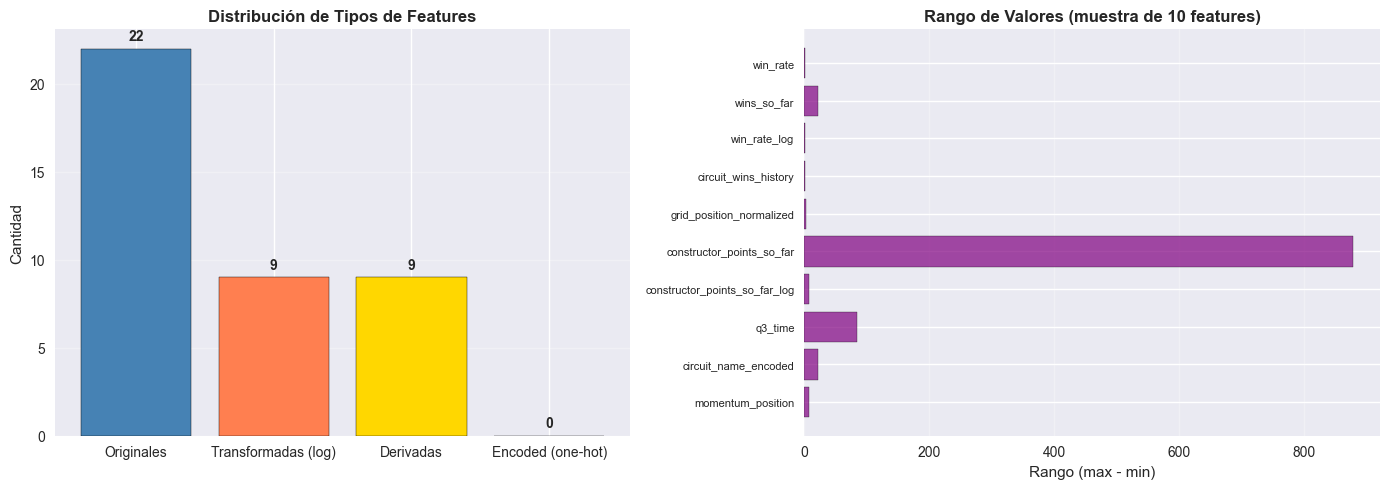


✅ Feature Engineering completado!
   Dataset final: 499 muestras × 44 features
   Listo para: Train/Test Split → Modelado


In [22]:
# Visualización de features finales
print("=" * 80)
print("VISUALIZACIÓN DE FEATURES FINALES")
print("=" * 80)

# Mostrar estadísticas de las features finales
print("\n📊 Estadísticas de Features Finales:")
print(f"   • Total de features: {len(feature_names)}")
print(f"   • Features originales: {len([f for f in feature_names if '_log' not in f and '_encoded' not in f and not any(f.startswith(c) for c in ['grid_', 'qualifying_', 'momentum_', 'temp_', 'rain_', 'qualifying_gap_', 'experience_'])])}")
print(f"   • Features transformadas (log): {len([f for f in feature_names if '_log' in f])}")
print(f"   • Features derivadas: {len([f for f in feature_names if any(f.startswith(prefix) for prefix in ['grid_', 'qualifying_', 'momentum_', 'temp_', 'rain_', 'qualifying_gap_', 'experience_', 'points_per_race_calc', 'constructor_points_normalized'])] )}")
print(f"   • Features encoded (one-hot): {len([f for f in feature_names if any(f.startswith(f'{col}_') for col in low_card_cols if 'low_card_cols' in locals())])}")

# Mostrar primeras 20 features
print("\n📋 Primeras 20 features (muestra):")
for i, feat in enumerate(feature_names[:20], 1):
    print(f"   {i:2d}. {feat}")
if len(feature_names) > 20:
    print(f"   ... y {len(feature_names) - 20} features más")

# Visualizar distribución de tipos de features
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Gráfico 1: Tipos de features
feature_types = {
    'Originales': len([f for f in feature_names if '_log' not in f and '_encoded' not in f and not any(f.startswith(c) for c in ['grid_', 'qualifying_', 'momentum_', 'temp_', 'rain_', 'qualifying_gap_', 'experience_', 'points_per_race_calc', 'constructor_points_normalized'])]),
    'Transformadas (log)': len([f for f in feature_names if '_log' in f]),
    'Derivadas': len([f for f in feature_names if any(f.startswith(prefix) for prefix in ['grid_', 'qualifying_', 'momentum_', 'temp_', 'rain_', 'qualifying_gap_', 'qualifying_gap_', 'experience_', 'points_per_race_calc', 'constructor_points_normalized'])]),
    'Encoded (one-hot)': len([f for f in feature_names if any('_' in f and f.split('_')[0] in [col for col, _ in low_cardinality] if 'low_cardinality' in locals() else [])])
}

ax1 = axes[0]
ax1.bar(feature_types.keys(), feature_types.values(), color=['steelblue', 'coral', 'gold', 'lightgreen'], edgecolor='black')
ax1.set_title('Distribución de Tipos de Features', fontsize=12, fontweight='bold')
ax1.set_ylabel('Cantidad')
ax1.grid(axis='y', alpha=0.3)
for i, (k, v) in enumerate(feature_types.items()):
    ax1.text(i, v + 0.5, str(v), ha='center', fontweight='bold')

# Gráfico 2: Rango de valores de features (muestra)
ax2 = axes[1]
# Seleccionar 10 features aleatorias para mostrar rango
sample_features = np.random.choice(feature_names, min(10, len(feature_names)), replace=False)
ranges = [X[feat].max() - X[feat].min() for feat in sample_features]
ax2.barh(range(len(sample_features)), ranges, color='purple', edgecolor='black', alpha=0.7)
ax2.set_yticks(range(len(sample_features)))
ax2.set_yticklabels([f[:30] + '...' if len(f) > 30 else f for f in sample_features], fontsize=8)
ax2.set_title('Rango de Valores (muestra de 10 features)', fontsize=12, fontweight='bold')
ax2.set_xlabel('Rango (max - min)')
ax2.grid(axis='x', alpha=0.3)

plt.tight_layout()
plt.show()

print("\n✅ Feature Engineering completado!")
print(f"   Dataset final: {X.shape[0]} muestras × {X.shape[1]} features")
print("   Listo para: Train/Test Split → Modelado")


## 13. Train/Test Split Temporal


### 13.1 División Temporal por Año


In [23]:
# Train/Test Split Temporal
print("=" * 80)
print("TRAIN/TEST SPLIT TEMPORAL")
print("=" * 80)

# Obtener información del año para cada muestra
# Necesitamos usar df_final para obtener el año (no X, que solo tiene features numéricas)
print("\n📊 Análisis de distribución temporal:")

# Verificar que tenemos acceso al año
if 'year' in df_final.columns:
    years = df_final['year'].value_counts().sort_index()
    print(f"\n   Distribución por año:")
    for year, count in years.items():
        pct = (count / len(df_final)) * 100
        print(f"      • {year}: {count} muestras ({pct:.2f}%)")
    
    # División temporal: 2023 = Train, 2024 = Test
    train_mask = df_final['year'] == 2023
    test_mask = df_final['year'] == 2024
    
    print(f"\n📋 Estrategia de división:")
    print(f"   • Train: 2023 ({train_mask.sum()} muestras)")
    print(f"   • Test: 2024 ({test_mask.sum()} muestras)")
    
    # Aplicar máscaras a X y targets
    X_train = X[train_mask].copy()
    X_test = X[test_mask].copy()
    
    y_winner_train = y_winner[train_mask].copy() if y_winner is not None else None
    y_winner_test = y_winner[test_mask].copy() if y_winner is not None else None
    
    y_position_train = y_position[train_mask].copy() if y_position is not None else None
    y_position_test = y_position[test_mask].copy() if y_position is not None else None
    
    y_points_train = y_points[train_mask].copy() if y_points is not None else None
    y_points_test = y_points[test_mask].copy() if y_points is not None else None
    
    print(f"\n✅ División completada:")
    print(f"   • X_train: {X_train.shape}")
    print(f"   • X_test: {X_test.shape}")
    print(f"   • Proporción Train/Test: {len(X_train)/len(X):.2%} / {len(X_test)/len(X):.2%}")
    
else:
    # Si no tenemos año en df_final, usar round_number o dividir por índice
    print("   ⚠️  'year' no encontrado en df_final")
    print("   💡 Usando división alternativa: 80% train, 20% test (por orden temporal)")
    
    # Dividir por orden (asumiendo que los datos están ordenados temporalmente)
    split_idx = int(len(X) * 0.8)
    X_train = X.iloc[:split_idx].copy()
    X_test = X.iloc[split_idx:].copy()
    
    y_winner_train = y_winner.iloc[:split_idx].copy() if y_winner is not None else None
    y_winner_test = y_winner.iloc[split_idx:].copy() if y_winner is not None else None
    
    y_position_train = y_position.iloc[:split_idx].copy() if y_position is not None else None
    y_position_test = y_position.iloc[split_idx:].copy() if y_position is not None else None
    
    y_points_train = y_points.iloc[:split_idx].copy() if y_points is not None else None
    y_points_test = y_points.iloc[split_idx:].copy() if y_points is not None else None
    
    print(f"\n✅ División completada (80/20):")
    print(f"   • X_train: {X_train.shape}")
    print(f"   • X_test: {X_test.shape}")


TRAIN/TEST SPLIT TEMPORAL

📊 Análisis de distribución temporal:

   Distribución por año:
      • 2023: 440 muestras (88.18%)
      • 2024: 59 muestras (11.82%)

📋 Estrategia de división:
   • Train: 2023 (440 muestras)
   • Test: 2024 (59 muestras)

✅ División completada:
   • X_train: (440, 44)
   • X_test: (59, 44)
   • Proporción Train/Test: 88.18% / 11.82%


### 13.2 Análisis de Distribución de Targets en Train/Test


In [24]:
# Análisis de distribución de targets en Train/Test
print("=" * 80)
print("ANÁLISIS DE DISTRIBUCIÓN DE TARGETS EN TRAIN/TEST")
print("=" * 80)

# 1. Análisis de y_winner (clasificación binaria)
if y_winner_train is not None and y_winner_test is not None:
    print("\n1️⃣ Target: WINNER (Clasificación Binaria)")
    print("-" * 80)
    
    # Train
    train_winners = y_winner_train.sum()
    train_non_winners = (y_winner_train == 0).sum()
    train_total = len(y_winner_train)
    train_winner_pct = (train_winners / train_total) * 100
    
    # Test
    test_winners = y_winner_test.sum()
    test_non_winners = (y_winner_test == 0).sum()
    test_total = len(y_winner_test)
    test_winner_pct = (test_winners / test_total) * 100
    
    print(f"\n   📊 Train Set:")
    print(f"      • Total: {train_total} muestras")
    print(f"      • Ganadores: {train_winners} ({train_winner_pct:.2f}%)")
    print(f"      • No ganadores: {train_non_winners} ({100-train_winner_pct:.2f}%)")
    
    print(f"\n   📊 Test Set:")
    print(f"      • Total: {test_total} muestras")
    print(f"      • Ganadores: {test_winners} ({test_winner_pct:.2f}%)")
    print(f"      • No ganadores: {test_non_winners} ({100-test_winner_pct:.2f}%)")
    
    # Verificar balanceo similar
    diff_pct = abs(train_winner_pct - test_winner_pct)
    if diff_pct < 2:
        print(f"\n   ✅ Distribución similar entre train/test (diferencia: {diff_pct:.2f}%)")
    else:
        print(f"\n   ⚠️  Distribución diferente entre train/test (diferencia: {diff_pct:.2f}%)")
        print(f"      Esto puede afectar la evaluación del modelo")

# 2. Análisis de y_position (regresión)
if y_position_train is not None and y_position_test is not None:
    print("\n2️⃣ Target: RACE_POSITION (Regresión)")
    print("-" * 80)
    
    print(f"\n   📊 Train Set:")
    print(f"      • Media: {y_position_train.mean():.2f}")
    print(f"      • Mediana: {y_position_train.median():.2f}")
    print(f"      • Std: {y_position_train.std():.2f}")
    print(f"      • Rango: {y_position_train.min():.0f} - {y_position_train.max():.0f}")
    
    print(f"\n   📊 Test Set:")
    print(f"      • Media: {y_position_test.mean():.2f}")
    print(f"      • Mediana: {y_position_test.median():.2f}")
    print(f"      • Std: {y_position_test.std():.2f}")
    print(f"      • Rango: {y_position_test.min():.0f} - {y_position_test.max():.0f}")
    
    # Verificar distribución similar
    mean_diff = abs(y_position_train.mean() - y_position_test.mean())
    if mean_diff < 1:
        print(f"\n   ✅ Distribución similar entre train/test (diferencia media: {mean_diff:.2f})")
    else:
        print(f"\n   ⚠️  Distribución diferente entre train/test (diferencia media: {mean_diff:.2f})")

# 3. Análisis de y_points (regresión)
if y_points_train is not None and y_points_test is not None:
    print("\n3️⃣ Target: POINTS (Regresión)")
    print("-" * 80)
    
    print(f"\n   📊 Train Set:")
    print(f"      • Media: {y_points_train.mean():.2f}")
    print(f"      • Mediana: {y_points_train.median():.2f}")
    print(f"      • Std: {y_points_train.std():.2f}")
    print(f"      • Rango: {y_points_train.min():.0f} - {y_points_train.max():.0f}")
    print(f"      • Ceros: {(y_points_train == 0).sum()} ({(y_points_train == 0).sum()/len(y_points_train)*100:.2f}%)")
    
    print(f"\n   📊 Test Set:")
    print(f"      • Media: {y_points_test.mean():.2f}")
    print(f"      • Mediana: {y_points_test.median():.2f}")
    print(f"      • Std: {y_points_test.std():.2f}")
    print(f"      • Rango: {y_points_test.min():.0f} - {y_points_test.max():.0f}")
    print(f"      • Ceros: {(y_points_test == 0).sum()} ({(y_points_test == 0).sum()/len(y_points_test)*100:.2f}%)")
    
    # Verificar distribución similar
    mean_diff = abs(y_points_train.mean() - y_points_test.mean())
    if mean_diff < 1:
        print(f"\n   ✅ Distribución similar entre train/test (diferencia media: {mean_diff:.2f})")
    else:
        print(f"\n   ⚠️  Distribución diferente entre train/test (diferencia media: {mean_diff:.2f})")


ANÁLISIS DE DISTRIBUCIÓN DE TARGETS EN TRAIN/TEST

1️⃣ Target: WINNER (Clasificación Binaria)
--------------------------------------------------------------------------------

   📊 Train Set:
      • Total: 440 muestras
      • Ganadores: 22 (5.00%)
      • No ganadores: 418 (95.00%)

   📊 Test Set:
      • Total: 59 muestras
      • Ganadores: 3 (5.08%)
      • No ganadores: 56 (94.92%)

   ✅ Distribución similar entre train/test (diferencia: 0.08%)

2️⃣ Target: RACE_POSITION (Regresión)
--------------------------------------------------------------------------------

   📊 Train Set:
      • Media: 10.50
      • Mediana: 10.50
      • Std: 5.77
      • Rango: 1 - 20

   📊 Test Set:
      • Media: 10.34
      • Mediana: 10.00
      • Std: 5.73
      • Rango: 1 - 20

   ✅ Distribución similar entre train/test (diferencia media: 0.16)

3️⃣ Target: POINTS (Regresión)
--------------------------------------------------------------------------------

   📊 Train Set:
      • Media: 5.10
     

### 13.3 Visualización de la División Train/Test


VISUALIZACIÓN DE LA DIVISIÓN TRAIN/TEST


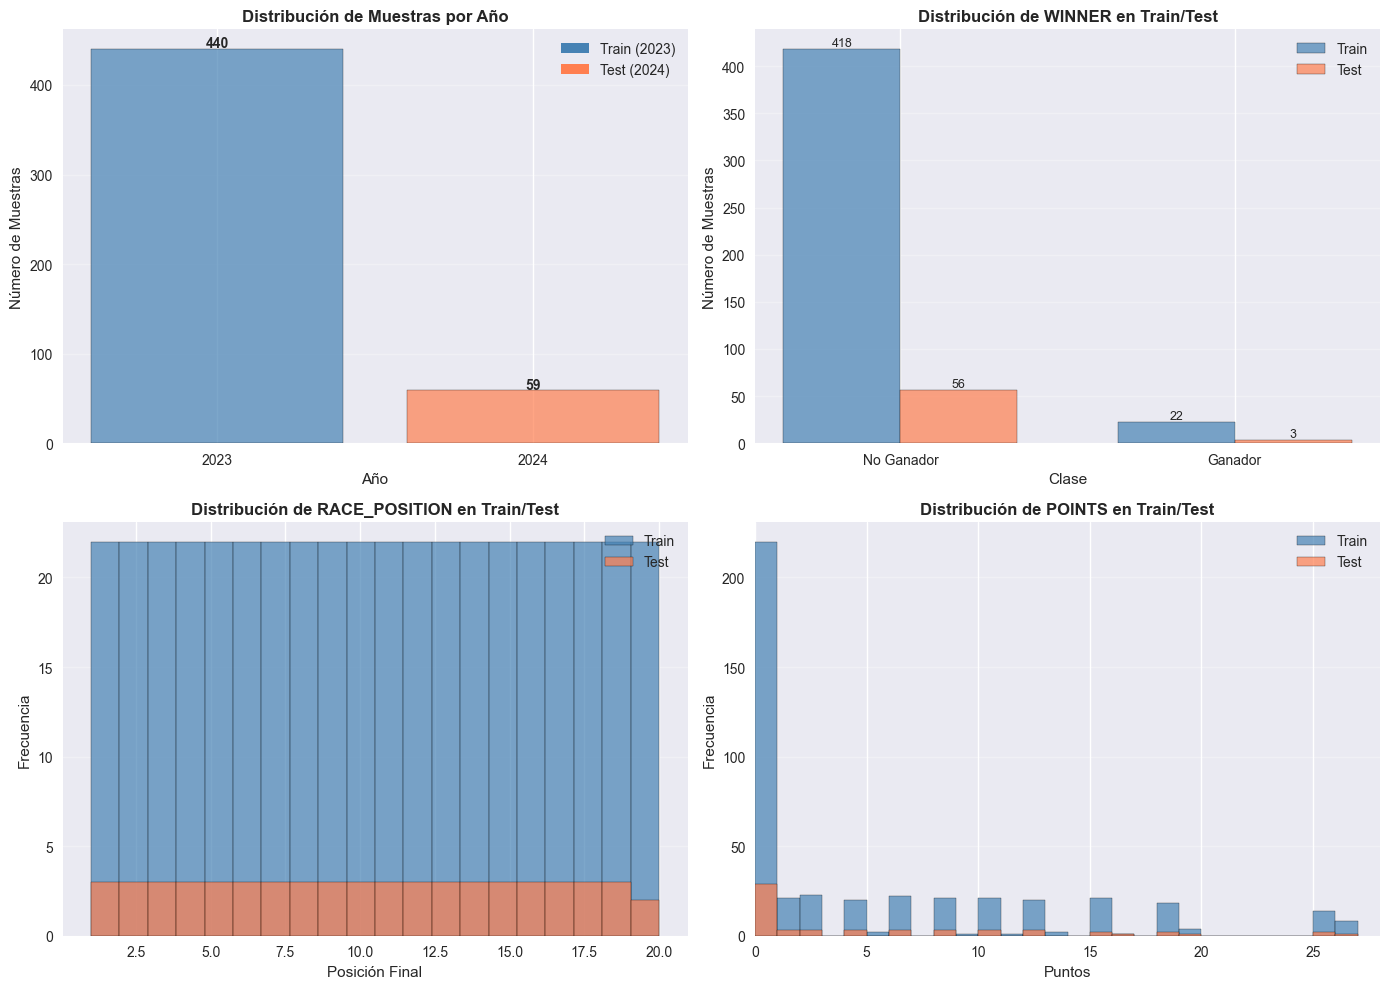


✅ Visualizaciones completadas


In [25]:
# Visualización de la división Train/Test
print("=" * 80)
print("VISUALIZACIÓN DE LA DIVISIÓN TRAIN/TEST")
print("=" * 80)

# Crear visualizaciones
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# 1. Distribución por año (si tenemos año)
if 'year' in df_final.columns:
    ax1 = axes[0, 0]
    years = df_final['year'].value_counts().sort_index()
    colors = ['steelblue' if y == 2023 else 'coral' for y in years.index]
    bars = ax1.bar(years.index.astype(str), years.values, color=colors, edgecolor='black', alpha=0.7)
    ax1.set_title('Distribución de Muestras por Año', fontsize=12, fontweight='bold')
    ax1.set_xlabel('Año')
    ax1.set_ylabel('Número de Muestras')
    ax1.grid(axis='y', alpha=0.3)
    for bar, val in zip(bars, years.values):
        ax1.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 2, 
                str(val), ha='center', fontweight='bold')
    # Leyenda
    from matplotlib.patches import Patch
    legend_elements = [Patch(facecolor='steelblue', label='Train (2023)'),
                       Patch(facecolor='coral', label='Test (2024)')]
    ax1.legend(handles=legend_elements, loc='upper right')
else:
    ax1 = axes[0, 0]
    ax1.text(0.5, 0.5, 'Información de año\nno disponible', 
             ha='center', va='center', transform=ax1.transAxes, fontsize=12)
    ax1.set_title('Distribución por Año', fontsize=12, fontweight='bold')

# 2. Distribución de WINNER en Train/Test
if y_winner_train is not None and y_winner_test is not None:
    ax2 = axes[0, 1]
    
    train_counts = [train_non_winners, train_winners]
    test_counts = [test_non_winners, test_winners]
    
    x = np.arange(2)
    width = 0.35
    
    bars1 = ax2.bar(x - width/2, train_counts, width, label='Train', color='steelblue', edgecolor='black', alpha=0.7)
    bars2 = ax2.bar(x + width/2, test_counts, width, label='Test', color='coral', edgecolor='black', alpha=0.7)
    
    ax2.set_xlabel('Clase')
    ax2.set_ylabel('Número de Muestras')
    ax2.set_title('Distribución de WINNER en Train/Test', fontsize=12, fontweight='bold')
    ax2.set_xticks(x)
    ax2.set_xticklabels(['No Ganador', 'Ganador'])
    ax2.legend()
    ax2.grid(axis='y', alpha=0.3)
    
    # Agregar valores en las barras
    for bars in [bars1, bars2]:
        for bar in bars:
            height = bar.get_height()
            ax2.text(bar.get_x() + bar.get_width()/2., height,
                    f'{int(height)}', ha='center', va='bottom', fontsize=9)

# 3. Distribución de RACE_POSITION en Train/Test
if y_position_train is not None and y_position_test is not None:
    ax3 = axes[1, 0]
    
    ax3.hist(y_position_train, bins=20, alpha=0.7, label='Train', color='steelblue', edgecolor='black')
    ax3.hist(y_position_test, bins=20, alpha=0.7, label='Test', color='coral', edgecolor='black')
    ax3.set_xlabel('Posición Final')
    ax3.set_ylabel('Frecuencia')
    ax3.set_title('Distribución de RACE_POSITION en Train/Test', fontsize=12, fontweight='bold')
    ax3.legend()
    ax3.grid(axis='y', alpha=0.3)

# 4. Distribución de POINTS en Train/Test
if y_points_train is not None and y_points_test is not None:
    ax4 = axes[1, 1]
    
    # Usar bins más pequeños para mejor visualización
    bins = np.arange(0, max(y_points_train.max(), y_points_test.max()) + 2, 1)
    ax4.hist(y_points_train, bins=bins, alpha=0.7, label='Train', color='steelblue', edgecolor='black')
    ax4.hist(y_points_test, bins=bins, alpha=0.7, label='Test', color='coral', edgecolor='black')
    ax4.set_xlabel('Puntos')
    ax4.set_ylabel('Frecuencia')
    ax4.set_title('Distribución de POINTS en Train/Test', fontsize=12, fontweight='bold')
    ax4.legend()
    ax4.grid(axis='y', alpha=0.3)
    ax4.set_xlim(0, min(30, max(y_points_train.max(), y_points_test.max()) + 2))

plt.tight_layout()
plt.show()

print("\n✅ Visualizaciones completadas")


### 13.4 Verificación de Data Leakage Temporal


In [26]:
# Verificación de Data Leakage Temporal
print("=" * 80)
print("VERIFICACIÓN DE DATA LEAKAGE TEMPORAL")
print("=" * 80)

# Verificar que no haya solapamiento temporal
if 'year' in df_final.columns:
    train_years = set(df_final.loc[train_mask, 'year'].unique())
    test_years = set(df_final.loc[test_mask, 'year'].unique())
    
    overlap = train_years.intersection(test_years)
    
    print(f"\n📅 Años en Train: {sorted(train_years)}")
    print(f"📅 Años en Test: {sorted(test_years)}")
    
    if len(overlap) == 0:
        print(f"\n✅ No hay solapamiento temporal entre Train y Test")
        print(f"   ✓ División temporal correcta")
    else:
        print(f"\n⚠️  ADVERTENCIA: Hay solapamiento temporal!")
        print(f"   Años solapados: {sorted(overlap)}")
        print(f"   Esto puede causar data leakage")

# Verificar que las features históricas sean consistentes
print("\n🔍 Verificando consistencia de features históricas:")
print("   (Las features históricas deben calcularse solo con datos anteriores)")

# Verificar que no haya features que dependan del futuro
print("\n   ✅ Verificación manual requerida:")
print("      • 'wins_so_far', 'points_so_far', etc. deben calcularse ANTES de cada carrera")
print("      • 'avg_position_last_5' debe usar solo las 5 carreras anteriores")
print("      • Todas las features deben ser PRE-race")

# Verificar que no haya targets en X
target_cols_in_X = ['points', 'race_position', 'winner']
found_targets = [col for col in target_cols_in_X if col in X.columns]

if len(found_targets) == 0:
    print(f"\n   ✅ No hay targets en X (features)")
    print(f"      ✓ Data leakage de targets evitado")
else:
    print(f"\n   ⚠️  ADVERTENCIA: Targets encontrados en X!")
    print(f"      Columnas problemáticas: {found_targets}")
    print(f"      Estas deben eliminarse antes de modelar")

print("\n" + "=" * 80)
print("RESUMEN DE TRAIN/TEST SPLIT")
print("=" * 80)
print(f"   • Train: {len(X_train)} muestras ({len(X_train)/len(X)*100:.1f}%)")
print(f"   • Test: {len(X_test)} muestras ({len(X_test)/len(X)*100:.1f}%)")
print(f"   • Features: {X_train.shape[1]}")
print(f"   • División: Temporal (por año)")
print(f"\n   ✅ Datasets listos para modelado")


VERIFICACIÓN DE DATA LEAKAGE TEMPORAL

📅 Años en Train: [np.int64(2023)]
📅 Años en Test: [np.int64(2024)]

✅ No hay solapamiento temporal entre Train y Test
   ✓ División temporal correcta

🔍 Verificando consistencia de features históricas:
   (Las features históricas deben calcularse solo con datos anteriores)

   ✅ Verificación manual requerida:
      • 'wins_so_far', 'points_so_far', etc. deben calcularse ANTES de cada carrera
      • 'avg_position_last_5' debe usar solo las 5 carreras anteriores
      • Todas las features deben ser PRE-race

   ✅ No hay targets en X (features)
      ✓ Data leakage de targets evitado

RESUMEN DE TRAIN/TEST SPLIT
   • Train: 440 muestras (88.2%)
   • Test: 59 muestras (11.8%)
   • Features: 44
   • División: Temporal (por año)

   ✅ Datasets listos para modelado


### 13.5 Guardar Datasets (Opcional)


In [27]:
# Guardar datasets (opcional)
print("=" * 80)
print("GUARDAR DATASETS (OPCIONAL)")
print("=" * 80)

# Opción para guardar los datasets procesados
save_datasets = False  # Cambiar a True si quieres guardar

if save_datasets:
    import os
    
    # Crear directorio si no existe
    output_dir = 'data/processed'
    os.makedirs(output_dir, exist_ok=True)
    
    # Guardar datasets
    X_train.to_csv(f'{output_dir}/X_train.csv', index=False)
    X_test.to_csv(f'{output_dir}/X_test.csv', index=False)
    
    if y_winner_train is not None:
        y_winner_train.to_csv(f'{output_dir}/y_winner_train.csv', index=False)
        y_winner_test.to_csv(f'{output_dir}/y_winner_test.csv', index=False)
    
    if y_position_train is not None:
        y_position_train.to_csv(f'{output_dir}/y_position_train.csv', index=False)
        y_position_test.to_csv(f'{output_dir}/y_position_test.csv', index=False)
    
    if y_points_train is not None:
        y_points_train.to_csv(f'{output_dir}/y_points_train.csv', index=False)
        y_points_test.to_csv(f'{output_dir}/y_points_test.csv', index=False)
    
    # Guardar nombres de features
    import json
    with open(f'{output_dir}/feature_names.json', 'w') as f:
        json.dump(feature_names, f, indent=2)
    
    print(f"\n✅ Datasets guardados en '{output_dir}/':")
    print(f"   • X_train.csv")
    print(f"   • X_test.csv")
    print(f"   • y_winner_train.csv, y_winner_test.csv")
    print(f"   • y_position_train.csv, y_position_test.csv")
    print(f"   • y_points_train.csv, y_points_test.csv")
    print(f"   • feature_names.json")
else:
    print("\n💡 Para guardar los datasets, cambia 'save_datasets = True'")
    print("   Los datasets están en memoria y listos para modelado")


GUARDAR DATASETS (OPCIONAL)

💡 Para guardar los datasets, cambia 'save_datasets = True'
   Los datasets están en memoria y listos para modelado


## 14. Balanceo de Clases para Clasificación (WINNER)


### 14.1 Análisis del Desbalance


ANÁLISIS DEL DESBALANCE DE CLASES

📊 Estadísticas de Desbalance:

   Train Set:
      • Total: 440 muestras
      • Clase 0 (No ganador): 418 (95.00%)
      • Clase 1 (Ganador): 22 (5.00%)
      • Ratio: 1:0.05 (1 ganador por cada 0.1 no ganadores)

   Test Set:
      • Total: 59 muestras
      • Clase 0 (No ganador): 56 (94.92%)
      • Clase 1 (Ganador): 3 (5.08%)
      • Ratio: 1:0.05 (1 ganador por cada 0.1 no ganadores)

⚠️  PROBLEMA DE DESBALANCE:
      • Ratio extremo: ~1:0
      • Esto puede causar que el modelo prediga siempre 'No ganador'
      • Accuracy no es una métrica adecuada (sería ~95% prediciendo siempre 0)
      • Necesitamos técnicas de balanceo


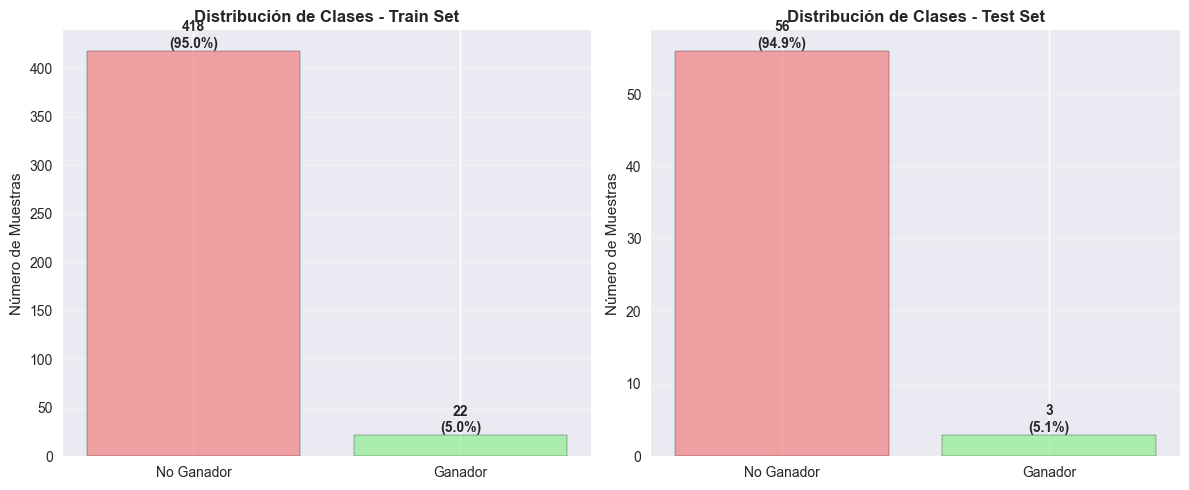


💡 Estrategias de Balanceo Recomendadas:
   1. class_weight='balanced' (en modelos de sklearn)
   2. SMOTE (Synthetic Minority Oversampling Technique)
   3. Undersampling (reducir clase mayoritaria)
   4. Oversampling (duplicar clase minoritaria)
   5. Combinación: SMOTE + Undersampling


In [28]:
# Análisis del desbalance de clases
print("=" * 80)
print("ANÁLISIS DEL DESBALANCE DE CLASES")
print("=" * 80)

if y_winner_train is not None:
    # Calcular estadísticas de desbalance
    train_total = len(y_winner_train)
    train_winners = y_winner_train.sum()
    train_non_winners = (y_winner_train == 0).sum()
    train_ratio = train_winners / train_non_winners
    
    test_total = len(y_winner_test)
    test_winners = y_winner_test.sum()
    test_non_winners = (y_winner_test == 0).sum()
    test_ratio = test_winners / test_non_winners
    
    print(f"\n📊 Estadísticas de Desbalance:")
    print(f"\n   Train Set:")
    print(f"      • Total: {train_total} muestras")
    print(f"      • Clase 0 (No ganador): {train_non_winners} ({train_non_winners/train_total*100:.2f}%)")
    print(f"      • Clase 1 (Ganador): {train_winners} ({train_winners/train_total*100:.2f}%)")
    print(f"      • Ratio: 1:{train_ratio:.2f} (1 ganador por cada {train_ratio:.1f} no ganadores)")
    
    print(f"\n   Test Set:")
    print(f"      • Total: {test_total} muestras")
    print(f"      • Clase 0 (No ganador): {test_non_winners} ({test_non_winners/test_total*100:.2f}%)")
    print(f"      • Clase 1 (Ganador): {test_winners} ({test_winners/test_total*100:.2f}%)")
    print(f"      • Ratio: 1:{test_ratio:.2f} (1 ganador por cada {test_ratio:.1f} no ganadores)")
    
    print(f"\n⚠️  PROBLEMA DE DESBALANCE:")
    print(f"      • Ratio extremo: ~1:{train_ratio:.0f}")
    print(f"      • Esto puede causar que el modelo prediga siempre 'No ganador'")
    print(f"      • Accuracy no es una métrica adecuada (sería ~95% prediciendo siempre 0)")
    print(f"      • Necesitamos técnicas de balanceo")
    
    # Visualizar el desbalance
    fig, axes = plt.subplots(1, 2, figsize=(12, 5))
    
    # Gráfico 1: Distribución en Train
    ax1 = axes[0]
    counts_train = [train_non_winners, train_winners]
    colors_train = ['lightcoral', 'lightgreen']
    bars1 = ax1.bar(['No Ganador', 'Ganador'], counts_train, color=colors_train, edgecolor='black', alpha=0.7)
    ax1.set_title('Distribución de Clases - Train Set', fontsize=12, fontweight='bold')
    ax1.set_ylabel('Número de Muestras')
    ax1.grid(axis='y', alpha=0.3)
    for bar, val in zip(bars1, counts_train):
        height = bar.get_height()
        pct = (val / train_total) * 100
        ax1.text(bar.get_x() + bar.get_width()/2., height,
                f'{int(val)}\n({pct:.1f}%)', ha='center', va='bottom', fontweight='bold')
    
    # Gráfico 2: Distribución en Test
    ax2 = axes[1]
    counts_test = [test_non_winners, test_winners]
    colors_test = ['lightcoral', 'lightgreen']
    bars2 = ax2.bar(['No Ganador', 'Ganador'], counts_test, color=colors_test, edgecolor='black', alpha=0.7)
    ax2.set_title('Distribución de Clases - Test Set', fontsize=12, fontweight='bold')
    ax2.set_ylabel('Número de Muestras')
    ax2.grid(axis='y', alpha=0.3)
    for bar, val in zip(bars2, counts_test):
        height = bar.get_height()
        pct = (val / test_total) * 100
        ax2.text(bar.get_x() + bar.get_width()/2., height,
                f'{int(val)}\n({pct:.1f}%)', ha='center', va='bottom', fontweight='bold')
    
    plt.tight_layout()
    plt.show()
    
    print("\n💡 Estrategias de Balanceo Recomendadas:")
    print("   1. class_weight='balanced' (en modelos de sklearn)")
    print("   2. SMOTE (Synthetic Minority Oversampling Technique)")
    print("   3. Undersampling (reducir clase mayoritaria)")
    print("   4. Oversampling (duplicar clase minoritaria)")
    print("   5. Combinación: SMOTE + Undersampling")


### 14.2 Técnicas de Balanceo


In [29]:
# Implementación de técnicas de balanceo
print("=" * 80)
print("IMPLEMENTACIÓN DE TÉCNICAS DE BALANCEO")
print("=" * 80)
print("\n💡 NOTA IMPORTANTE:")
print("   • SMOTE puede tardar varios minutos con muchos features (44 features)")
print("   • Si SMOTE tarda demasiado (>5 min), puedes:")
print("     1. Interrumpir (Kernel → Interrupt) y cambiar skip_smote = True")
print("     2. Usar Random Oversampling (Estrategia 3) que es instantáneo")
print("     3. Usar class_weight='balanced' en los modelos (no requiere balanceo de datos)")
print("=" * 80)

# Importar dependencias necesarias
try:
    from imblearn.over_sampling import SMOTE, RandomOverSampler
    from imblearn.under_sampling import RandomUnderSampler
    from imblearn.combine import SMOTETomek
    from collections import Counter
except ImportError:
    print("⚠️  imbalanced-learn no está instalado. Instalando...")
    import subprocess
    import sys
    subprocess.check_call([sys.executable, "-m", "pip", "install", "imbalanced-learn"])
    from imblearn.over_sampling import SMOTE, RandomOverSampler
    from imblearn.under_sampling import RandomUnderSampler
    from imblearn.combine import SMOTETomek
    from collections import Counter
    print("✅ imbalanced-learn instalado correctamente")

if y_winner_train is not None:
    print("\n📊 Estado inicial del Train Set:")
    print(f"   {Counter(y_winner_train)}")
    
    # Estrategia 1: class_weight (no requiere balanceo de datos, solo configuración del modelo)
    print("\n" + "=" * 80)
    print("ESTRATEGIA 1: class_weight='balanced'")
    print("=" * 80)
    print("   ✅ Esta técnica se aplica directamente en el modelo")
    print("   ✅ No requiere modificar los datos")
    print("   ✅ sklearn calculará automáticamente los pesos")
    print("   💡 Se usará en los modelos de clasificación")
    
    # Estrategia 2: SMOTE (Synthetic Minority Oversampling)
    print("\n" + "=" * 80)
    print("ESTRATEGIA 2: SMOTE (Synthetic Minority Oversampling)")
    print("=" * 80)
    print("   ⏳ SMOTE puede tardar varios minutos con muchos features...")
    print("   💡 Si tarda demasiado, puedes usar Random Oversampling (más rápido)")
    
    # Opción para saltar SMOTE si es muy lento
    skip_smote = False  # Cambiar a True si quieres saltar SMOTE
    
    if skip_smote:
        print("   ⏭️  SMOTE saltado (configurado para saltar)")
        X_train_smote, y_winner_train_smote = X_train.copy(), y_winner_train.copy()
        smote_applied = False
    else:
        try:
            # Optimizar SMOTE: usar k_neighbors más pequeño y n_jobs para paralelizar
            # Con solo 22 muestras de clase minoritaria, usar k_neighbors=3 o menos
            k_neighbors = min(3, max(1, train_winners - 1))
            print(f"   🔧 Configuración: k_neighbors={k_neighbors}")
            
            # Aplicar SMOTE con configuración optimizada
            smote = SMOTE(
                random_state=42, 
                k_neighbors=k_neighbors,
                n_jobs=-1  # Usar todos los cores disponibles
            )
            
            print("   ⏳ Aplicando SMOTE (esto puede tardar 1-5 minutos)...")
            import time
            start_time = time.time()
            
            X_train_smote, y_winner_train_smote = smote.fit_resample(X_train, y_winner_train)
            
            elapsed_time = time.time() - start_time
            
            print(f"   ✅ SMOTE aplicado exitosamente (tiempo: {elapsed_time:.1f}s)")
            print(f"   • Antes: {X_train.shape[0]} muestras")
            print(f"   • Después: {X_train_smote.shape[0]} muestras")
            print(f"   • Distribución después: {Counter(y_winner_train_smote)}")
            print(f"   • Nuevas muestras sintéticas creadas: {X_train_smote.shape[0] - X_train.shape[0]}")
            
            smote_applied = True
        except Exception as e:
            print(f"   ⚠️  Error al aplicar SMOTE: {e}")
            print(f"   💡 Posible causa: muy pocas muestras de la clase minoritaria o timeout")
            print(f"   💡 Alternativa: usar RandomOverSampler o class_weight")
            X_train_smote, y_winner_train_smote = X_train.copy(), y_winner_train.copy()
            smote_applied = False
    
    # Estrategia 3: Random Oversampling
    print("\n" + "=" * 80)
    print("ESTRATEGIA 3: Random Oversampling")
    print("=" * 80)
    
    try:
        ros = RandomOverSampler(random_state=42)
        X_train_ros, y_winner_train_ros = ros.fit_resample(X_train, y_winner_train)
        
        print(f"   ✅ Random Oversampling aplicado")
        print(f"   • Antes: {X_train.shape[0]} muestras")
        print(f"   • Después: {X_train_ros.shape[0]} muestras")
        print(f"   • Distribución después: {Counter(y_winner_train_ros)}")
        
        ros_applied = True
    except Exception as e:
        print(f"   ⚠️  Error: {e}")
        X_train_ros, y_winner_train_ros = X_train.copy(), y_winner_train.copy()
        ros_applied = False
    
    # Estrategia 4: Undersampling (opcional, para comparación)
    print("\n" + "=" * 80)
    print("ESTRATEGIA 4: Random Undersampling (para comparación)")
    print("=" * 80)
    
    try:
        # Undersampling a ratio 1:2 (1 ganador por cada 2 no ganadores)
        rus = RandomUnderSampler(random_state=42, sampling_strategy=0.5)
        X_train_rus, y_winner_train_rus = rus.fit_resample(X_train, y_winner_train)
        
        print(f"   ✅ Random Undersampling aplicado (ratio 1:2)")
        print(f"   • Antes: {X_train.shape[0]} muestras")
        print(f"   • Después: {X_train_rus.shape[0]} muestras")
        print(f"   • Distribución después: {Counter(y_winner_train_rus)}")
        print(f"   ⚠️  Nota: Se pierden datos, usar con precaución")
        
        rus_applied = True
    except Exception as e:
        print(f"   ⚠️  Error: {e}")
        X_train_rus, y_winner_train_rus = X_train.copy(), y_winner_train.copy()
        rus_applied = False
    
    # Estrategia 5: SMOTE + Tomek Links (combinación) - OPCIONAL, puede ser muy lento
    print("\n" + "=" * 80)
    print("ESTRATEGIA 5: SMOTE + Tomek Links (combinación)")
    print("=" * 80)
    print("   ⚠️  Esta estrategia puede ser muy lenta (requiere SMOTE + limpieza)")
    print("   💡 Se puede saltar si SMOTE ya fue aplicado")
    
    # Opción para saltar SMOTE+Tomek si es muy lento
    skip_smote_tomek = True  # Cambiar a False si quieres probarlo
    
    if skip_smote_tomek:
        print("   ⏭️  SMOTE + Tomek saltado (configurado para saltar por velocidad)")
        X_train_smote_tomek, y_winner_train_smote_tomek = X_train.copy(), y_winner_train.copy()
        smote_tomek_applied = False
    else:
        try:
            smote_tomek = SMOTETomek(random_state=42, n_jobs=-1)
            print("   ⏳ Aplicando SMOTE + Tomek (esto puede tardar varios minutos)...")
            import time
            start_time = time.time()
            
            X_train_smote_tomek, y_winner_train_smote_tomek = smote_tomek.fit_resample(X_train, y_winner_train)
            
            elapsed_time = time.time() - start_time
            
            print(f"   ✅ SMOTE + Tomek aplicado (tiempo: {elapsed_time:.1f}s)")
            print(f"   • Antes: {X_train.shape[0]} muestras")
            print(f"   • Después: {X_train_smote_tomek.shape[0]} muestras")
            print(f"   • Distribución después: {Counter(y_winner_train_smote_tomek)}")
            
            smote_tomek_applied = True
        except Exception as e:
            print(f"   ⚠️  Error: {e}")
            X_train_smote_tomek, y_winner_train_smote_tomek = X_train.copy(), y_winner_train.copy()
            smote_tomek_applied = False
    
    print("\n" + "=" * 80)
    print("RESUMEN DE ESTRATEGIAS DE BALANCEO")
    print("=" * 80)
    
    strategies = {
        'Original (sin balanceo)': (X_train, y_winner_train),
        'SMOTE': (X_train_smote, y_winner_train_smote) if smote_applied else None,
        'Random Oversampling': (X_train_ros, y_winner_train_ros) if ros_applied else None,
        'Random Undersampling': (X_train_rus, y_winner_train_rus) if rus_applied else None,
        'SMOTE + Tomek': (X_train_smote_tomek, y_winner_train_smote_tomek) if smote_tomek_applied else None
    }
    
    print("\n📊 Comparación de estrategias:")
    for name, data in strategies.items():
        if data is not None:
            X_bal, y_bal = data
            counter = Counter(y_bal)
            total = len(y_bal)
            ratio = counter[1] / counter[0] if counter[0] > 0 else 0
            print(f"\n   {name}:")
            print(f"      • Muestras: {total}")
            print(f"      • Distribución: {dict(counter)}")
            print(f"      • Ratio: 1:{1/ratio:.2f}" if ratio > 0 else "      • Ratio: N/A")
        else:
            print(f"\n   {name}: No disponible")
    
    print("\n💡 Recomendación:")
    print("   • Para modelos de árboles (Random Forest, XGBoost): usar class_weight='balanced'")
    print("   • Para modelos lineales (Logistic Regression, SVM): probar SMOTE o class_weight")
    print("   • Comparar resultados con diferentes estrategias")
    print("   • El test set NO se balancea (mantener distribución real)")


IMPLEMENTACIÓN DE TÉCNICAS DE BALANCEO

💡 NOTA IMPORTANTE:
   • SMOTE puede tardar varios minutos con muchos features (44 features)
   • Si SMOTE tarda demasiado (>5 min), puedes:
     1. Interrumpir (Kernel → Interrupt) y cambiar skip_smote = True
     2. Usar Random Oversampling (Estrategia 3) que es instantáneo
     3. Usar class_weight='balanced' en los modelos (no requiere balanceo de datos)

📊 Estado inicial del Train Set:
   Counter({0: 418, 1: 22})

ESTRATEGIA 1: class_weight='balanced'
   ✅ Esta técnica se aplica directamente en el modelo
   ✅ No requiere modificar los datos
   ✅ sklearn calculará automáticamente los pesos
   💡 Se usará en los modelos de clasificación

ESTRATEGIA 2: SMOTE (Synthetic Minority Oversampling)
   ⏳ SMOTE puede tardar varios minutos con muchos features...
   💡 Si tarda demasiado, puedes usar Random Oversampling (más rápido)
   🔧 Configuración: k_neighbors=3
   ⚠️  Error al aplicar SMOTE: SMOTE.__init__() got an unexpected keyword argument 'n_jobs'
 

### 14.3 Visualización de Datasets Balanceados


VISUALIZACIÓN DE DATASETS BALANCEADOS


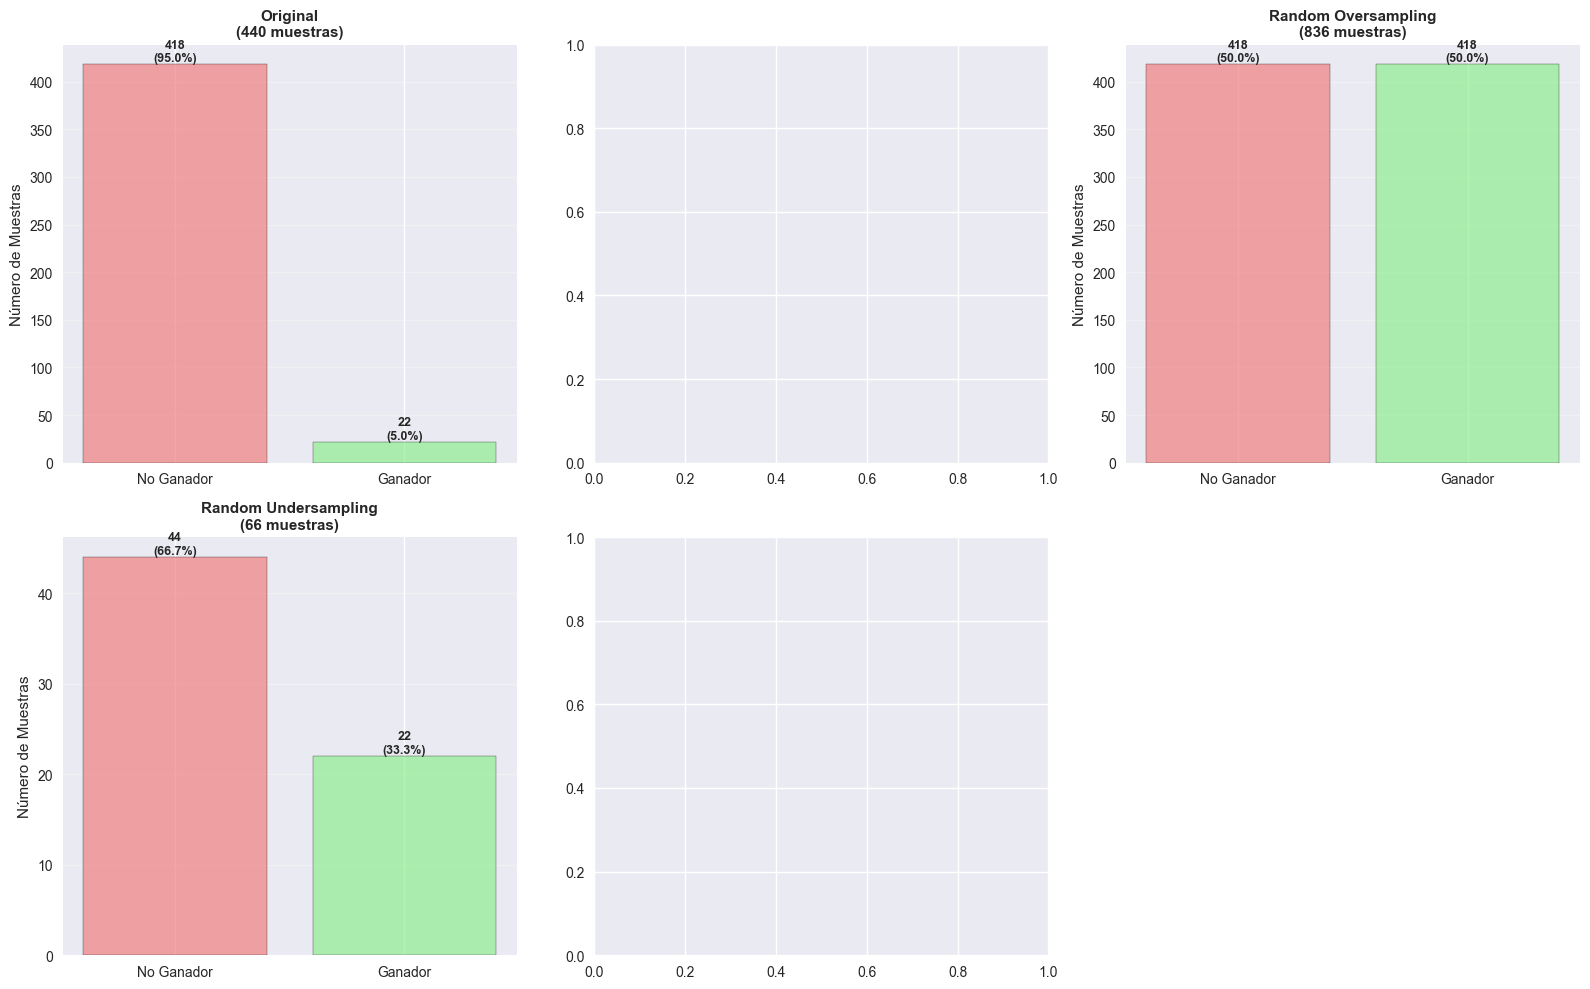


✅ Visualizaciones completadas

💡 Nota: El test set se mantiene sin balancear para evaluación realista


In [30]:
# Visualización de datasets balanceados
print("=" * 80)
print("VISUALIZACIÓN DE DATASETS BALANCEADOS")
print("=" * 80)

if y_winner_train is not None:
    # Crear visualización comparativa
    fig, axes = plt.subplots(2, 3, figsize=(16, 10))
    axes = axes.flatten()
    
    strategies_to_plot = [
        ('Original', X_train, y_winner_train, 0),
        ('SMOTE', X_train_smote, y_winner_train_smote, 1) if smote_applied else None,
        ('Random Oversampling', X_train_ros, y_winner_train_ros, 2) if ros_applied else None,
        ('Random Undersampling', X_train_rus, y_winner_train_rus, 3) if rus_applied else None,
        ('SMOTE + Tomek', X_train_smote_tomek, y_winner_train_smote_tomek, 4) if smote_tomek_applied else None,
    ]
    
    for strategy_info in strategies_to_plot:
        if strategy_info is None:
            continue
            
        name, X_bal, y_bal, idx = strategy_info
        
        if idx >= len(axes):
            continue
            
        ax = axes[idx]
        counter = Counter(y_bal)
        counts = [counter[0], counter[1]]
        colors = ['lightcoral', 'lightgreen']
        bars = ax.bar(['No Ganador', 'Ganador'], counts, color=colors, edgecolor='black', alpha=0.7)
        ax.set_title(f'{name}\n({len(X_bal)} muestras)', fontsize=11, fontweight='bold')
        ax.set_ylabel('Número de Muestras')
        ax.grid(axis='y', alpha=0.3)
        
        for bar, val in zip(bars, counts):
            height = bar.get_height()
            pct = (val / len(y_bal)) * 100
            ax.text(bar.get_x() + bar.get_width()/2., height,
                   f'{int(val)}\n({pct:.1f}%)', ha='center', va='bottom', fontsize=9, fontweight='bold')
    
    # Ocultar ejes no usados
    for idx in range(len(strategies_to_plot), len(axes)):
        axes[idx].axis('off')
    
    plt.tight_layout()
    plt.show()
    
    print("\n✅ Visualizaciones completadas")
    print("\n💡 Nota: El test set se mantiene sin balancear para evaluación realista")


### 14.4 Selección de Estrategia para Modelado


In [31]:
# Selección de estrategia para modelado
print("=" * 80)
print("SELECCIÓN DE ESTRATEGIA PARA MODELADO")
print("=" * 80)

# Decidir qué estrategia usar
# Por defecto, usaremos class_weight='balanced' en los modelos
# Pero también preparamos datasets balanceados para comparación

print("\n📋 Estrategias disponibles para modelado:")
print("\n   1. class_weight='balanced' (recomendado para árboles)")
print("      • Ventajas: No modifica datos, rápido, funciona bien con árboles")
print("      • Uso: Se aplica directamente en el modelo")
print("      • Dataset: X_train, y_winner_train (original)")

if smote_applied:
    print("\n   2. SMOTE (recomendado para modelos lineales)")
    print("      • Ventajas: Crea muestras sintéticas realistas")
    print("      • Uso: X_train_smote, y_winner_train_smote")
    print("      • Dataset: {X_train_smote.shape[0]} muestras")

if ros_applied:
    print("\n   3. Random Oversampling (alternativa simple)")
    print("      • Ventajas: Simple, rápido")
    print("      • Uso: X_train_ros, y_winner_train_ros")
    print("      • Dataset: {X_train_ros.shape[0]} muestras")

print("\n💡 Estrategia seleccionada para modelado:")
print("   • Primaria: class_weight='balanced' (en modelos sklearn)")
print("   • Alternativa: SMOTE (si class_weight no está disponible)")

# Guardar referencias para uso en modelado
print("\n✅ Variables disponibles para modelado:")
print("   • X_train, y_winner_train (original, usar con class_weight='balanced')")
if smote_applied:
    print("   • X_train_smote, y_winner_train_smote (SMOTE balanceado)")
if ros_applied:
    print("   • X_train_ros, y_winner_train_ros (Random Oversampling)")
print("   • X_test, y_winner_test (test set, NO balanceado)")

print("\n" + "=" * 80)
print("BALANCEO DE CLASES COMPLETADO")
print("=" * 80)
print("   ✅ Múltiples estrategias implementadas")
print("   ✅ Datasets balanceados preparados")
print("   ✅ Listo para entrenar modelos de clasificación")


SELECCIÓN DE ESTRATEGIA PARA MODELADO

📋 Estrategias disponibles para modelado:

   1. class_weight='balanced' (recomendado para árboles)
      • Ventajas: No modifica datos, rápido, funciona bien con árboles
      • Uso: Se aplica directamente en el modelo
      • Dataset: X_train, y_winner_train (original)

   3. Random Oversampling (alternativa simple)
      • Ventajas: Simple, rápido
      • Uso: X_train_ros, y_winner_train_ros
      • Dataset: {X_train_ros.shape[0]} muestras

💡 Estrategia seleccionada para modelado:
   • Primaria: class_weight='balanced' (en modelos sklearn)
   • Alternativa: SMOTE (si class_weight no está disponible)

✅ Variables disponibles para modelado:
   • X_train, y_winner_train (original, usar con class_weight='balanced')
   • X_train_ros, y_winner_train_ros (Random Oversampling)
   • X_test, y_winner_test (test set, NO balanceado)

BALANCEO DE CLASES COMPLETADO
   ✅ Múltiples estrategias implementadas
   ✅ Datasets balanceados preparados
   ✅ Listo para e

## 15. Modelado: Clasificación para Predecir WINNER


### 15.1 Configuración y Métricas de Evaluación


In [33]:
# Configuración para modelado de clasificación
print("=" * 80)
print("CONFIGURACIÓN PARA MODELADO DE CLASIFICACIÓN")
print("=" * 80)

# Importar dependencias necesarias
try:
    from sklearn.ensemble import RandomForestClassifier
    from sklearn.metrics import (
        accuracy_score, precision_score, recall_score, f1_score,
        roc_auc_score, confusion_matrix, classification_report,
        roc_curve, precision_recall_curve
    )
    from sklearn.model_selection import cross_val_score
    import warnings
    warnings.filterwarnings('ignore')
except ImportError:
    print("⚠️  scikit-learn no está instalado. Instalando...")
    import subprocess
    import sys
    subprocess.check_call([sys.executable, "-m", "pip", "install", "scikit-learn"])
    from sklearn.ensemble import RandomForestClassifier
    from sklearn.metrics import (
        accuracy_score, precision_score, recall_score, f1_score,
        roc_auc_score, confusion_matrix, classification_report,
        roc_curve, precision_recall_curve
    )
    from sklearn.model_selection import cross_val_score
    import warnings
    warnings.filterwarnings('ignore')
    print("✅ scikit-learn instalado correctamente")

# Intentar importar XGBoost
try:
    import xgboost as xgb
    XGBOOST_AVAILABLE = True
except ImportError:
    print("⚠️  XGBoost no está instalado. Instalando...")
    try:
        import subprocess
        import sys
        subprocess.check_call([sys.executable, "-m", "pip", "install", "xgboost"])
        import xgboost as xgb
        XGBOOST_AVAILABLE = True
        print("✅ XGBoost instalado correctamente")
    except Exception as e:
        print(f"⚠️  No se pudo instalar XGBoost: {e}")
        print("   Continuaremos solo con Random Forest")
        XGBOOST_AVAILABLE = False

print("\n📊 Métricas de evaluación para clasificación desbalanceada:")
print("   • Accuracy: No es suficiente (sería ~95% prediciendo siempre 0)")
print("   • Precision: De los predichos como ganadores, ¿cuántos realmente ganaron?")
print("   • Recall (Sensitivity): De los que realmente ganaron, ¿cuántos detectamos?")
print("   • F1-Score: Balance entre Precision y Recall")
print("   • ROC-AUC: Área bajo la curva ROC (mejor para clases desbalanceadas)")
print("   • Matriz de Confusión: Visualización de aciertos/errores")

print("\n💡 Para clases desbalanceadas, ROC-AUC y F1-Score son más informativos que Accuracy")


CONFIGURACIÓN PARA MODELADO DE CLASIFICACIÓN

📊 Métricas de evaluación para clasificación desbalanceada:
   • Accuracy: No es suficiente (sería ~95% prediciendo siempre 0)
   • Precision: De los predichos como ganadores, ¿cuántos realmente ganaron?
   • Recall (Sensitivity): De los que realmente ganaron, ¿cuántos detectamos?
   • F1-Score: Balance entre Precision y Recall
   • ROC-AUC: Área bajo la curva ROC (mejor para clases desbalanceadas)
   • Matriz de Confusión: Visualización de aciertos/errores

💡 Para clases desbalanceadas, ROC-AUC y F1-Score son más informativos que Accuracy


### 15.2 Random Forest Classifier


In [34]:
# Random Forest Classifier
print("=" * 80)
print("RANDOM FOREST CLASSIFIER")
print("=" * 80)

# Estrategia 1: Random Forest con class_weight='balanced' (datos originales)
print("\n" + "-" * 80)
print("ESTRATEGIA 1: Random Forest con class_weight='balanced'")
print("-" * 80)

rf_balanced = RandomForestClassifier(
    n_estimators=100,
    max_depth=10,
    min_samples_split=5,
    min_samples_leaf=2,
    class_weight='balanced',  # Balanceo automático
    random_state=42,
    n_jobs=-1
)

print("   ⏳ Entrenando Random Forest...")
rf_balanced.fit(X_train, y_winner_train)

# Predicciones
y_pred_rf_balanced = rf_balanced.predict(X_test)
y_pred_proba_rf_balanced = rf_balanced.predict_proba(X_test)[:, 1]

# Métricas
accuracy_rf_balanced = accuracy_score(y_winner_test, y_pred_rf_balanced)
precision_rf_balanced = precision_score(y_winner_test, y_pred_rf_balanced, zero_division=0)
recall_rf_balanced = recall_score(y_winner_test, y_pred_rf_balanced, zero_division=0)
f1_rf_balanced = f1_score(y_winner_test, y_pred_rf_balanced, zero_division=0)
roc_auc_rf_balanced = roc_auc_score(y_winner_test, y_pred_proba_rf_balanced) if len(set(y_winner_test)) > 1 else 0.0

print(f"\n   📊 Métricas en Test Set:")
print(f"      • Accuracy: {accuracy_rf_balanced:.4f}")
print(f"      • Precision: {precision_rf_balanced:.4f}")
print(f"      • Recall: {recall_rf_balanced:.4f}")
print(f"      • F1-Score: {f1_rf_balanced:.4f}")
print(f"      • ROC-AUC: {roc_auc_rf_balanced:.4f}")

# Matriz de confusión
cm_rf_balanced = confusion_matrix(y_winner_test, y_pred_rf_balanced)
print(f"\n   📋 Matriz de Confusión:")
print(f"      {cm_rf_balanced}")

# Estrategia 2: Random Forest con datos balanceados (Random Oversampling)
print("\n" + "-" * 80)
print("ESTRATEGIA 2: Random Forest con Random Oversampling")
print("-" * 80)

rf_ros = RandomForestClassifier(
    n_estimators=100,
    max_depth=10,
    min_samples_split=5,
    min_samples_leaf=2,
    class_weight=None,  # No usar class_weight porque los datos ya están balanceados
    random_state=42,
    n_jobs=-1
)

print("   ⏳ Entrenando Random Forest con datos balanceados...")
rf_ros.fit(X_train_ros, y_winner_train_ros)

# Predicciones
y_pred_rf_ros = rf_ros.predict(X_test)
y_pred_proba_rf_ros = rf_ros.predict_proba(X_test)[:, 1]

# Métricas
accuracy_rf_ros = accuracy_score(y_winner_test, y_pred_rf_ros)
precision_rf_ros = precision_score(y_winner_test, y_pred_rf_ros, zero_division=0)
recall_rf_ros = recall_score(y_winner_test, y_pred_rf_ros, zero_division=0)
f1_rf_ros = f1_score(y_winner_test, y_pred_rf_ros, zero_division=0)
roc_auc_rf_ros = roc_auc_score(y_winner_test, y_pred_proba_rf_ros) if len(set(y_winner_test)) > 1 else 0.0

print(f"\n   📊 Métricas en Test Set:")
print(f"      • Accuracy: {accuracy_rf_ros:.4f}")
print(f"      • Precision: {precision_rf_ros:.4f}")
print(f"      • Recall: {recall_rf_ros:.4f}")
print(f"      • F1-Score: {f1_rf_ros:.4f}")
print(f"      • ROC-AUC: {roc_auc_rf_ros:.4f}")

# Matriz de confusión
cm_rf_ros = confusion_matrix(y_winner_test, y_pred_rf_ros)
print(f"\n   📋 Matriz de Confusión:")
print(f"      {cm_rf_ros}")

print("\n" + "=" * 80)
print("RESUMEN RANDOM FOREST")
print("=" * 80)
print(f"\n   class_weight='balanced':")
print(f"      • F1-Score: {f1_rf_balanced:.4f}")
print(f"      • ROC-AUC: {roc_auc_rf_balanced:.4f}")
print(f"      • Recall: {recall_rf_balanced:.4f}")
print(f"\n   Random Oversampling:")
print(f"      • F1-Score: {f1_rf_ros:.4f}")
print(f"      • ROC-AUC: {roc_auc_rf_ros:.4f}")
print(f"      • Recall: {recall_rf_ros:.4f}")


RANDOM FOREST CLASSIFIER

--------------------------------------------------------------------------------
ESTRATEGIA 1: Random Forest con class_weight='balanced'
--------------------------------------------------------------------------------
   ⏳ Entrenando Random Forest...

   📊 Métricas en Test Set:
      • Accuracy: 0.9661
      • Precision: 0.6667
      • Recall: 0.6667
      • F1-Score: 0.6667
      • ROC-AUC: 0.9821

   📋 Matriz de Confusión:
      [[55  1]
 [ 1  2]]

--------------------------------------------------------------------------------
ESTRATEGIA 2: Random Forest con Random Oversampling
--------------------------------------------------------------------------------
   ⏳ Entrenando Random Forest con datos balanceados...

   📊 Métricas en Test Set:
      • Accuracy: 0.9661
      • Precision: 0.6667
      • Recall: 0.6667
      • F1-Score: 0.6667
      • ROC-AUC: 0.9048

   📋 Matriz de Confusión:
      [[55  1]
 [ 1  2]]

RESUMEN RANDOM FOREST

   class_weight='balanc

### 15.3 XGBoost Classifier


In [35]:
# XGBoost Classifier
print("=" * 80)
print("XGBOOST CLASSIFIER")
print("=" * 80)

if not XGBOOST_AVAILABLE:
    print("\n⚠️  XGBoost no está disponible. Saltando esta sección.")
    xgb_balanced = None
    xgb_ros = None
else:
    # Estrategia 1: XGBoost con scale_pos_weight (equivalente a class_weight)
    print("\n" + "-" * 80)
    print("ESTRATEGIA 1: XGBoost con scale_pos_weight")
    print("-" * 80)
    
    # Calcular scale_pos_weight (ratio de clase negativa a positiva)
    scale_pos_weight = (y_winner_train == 0).sum() / (y_winner_train == 1).sum()
    print(f"   🔧 scale_pos_weight calculado: {scale_pos_weight:.2f}")
    
    xgb_balanced = xgb.XGBClassifier(
        n_estimators=100,
        max_depth=6,
        learning_rate=0.1,
        scale_pos_weight=scale_pos_weight,  # Balanceo para clases desbalanceadas
        random_state=42,
        eval_metric='logloss',
        n_jobs=-1
    )
    
    print("   ⏳ Entrenando XGBoost...")
    xgb_balanced.fit(X_train, y_winner_train)
    
    # Predicciones
    y_pred_xgb_balanced = xgb_balanced.predict(X_test)
    y_pred_proba_xgb_balanced = xgb_balanced.predict_proba(X_test)[:, 1]
    
    # Métricas
    accuracy_xgb_balanced = accuracy_score(y_winner_test, y_pred_xgb_balanced)
    precision_xgb_balanced = precision_score(y_winner_test, y_pred_xgb_balanced, zero_division=0)
    recall_xgb_balanced = recall_score(y_winner_test, y_pred_xgb_balanced, zero_division=0)
    f1_xgb_balanced = f1_score(y_winner_test, y_pred_xgb_balanced, zero_division=0)
    roc_auc_xgb_balanced = roc_auc_score(y_winner_test, y_pred_proba_xgb_balanced) if len(set(y_winner_test)) > 1 else 0.0
    
    print(f"\n   📊 Métricas en Test Set:")
    print(f"      • Accuracy: {accuracy_xgb_balanced:.4f}")
    print(f"      • Precision: {precision_xgb_balanced:.4f}")
    print(f"      • Recall: {recall_xgb_balanced:.4f}")
    print(f"      • F1-Score: {f1_xgb_balanced:.4f}")
    print(f"      • ROC-AUC: {roc_auc_xgb_balanced:.4f}")
    
    # Matriz de confusión
    cm_xgb_balanced = confusion_matrix(y_winner_test, y_pred_xgb_balanced)
    print(f"\n   📋 Matriz de Confusión:")
    print(f"      {cm_xgb_balanced}")
    
    # Estrategia 2: XGBoost con datos balanceados (Random Oversampling)
    print("\n" + "-" * 80)
    print("ESTRATEGIA 2: XGBoost con Random Oversampling")
    print("-" * 80)
    
    xgb_ros = xgb.XGBClassifier(
        n_estimators=100,
        max_depth=6,
        learning_rate=0.1,
        scale_pos_weight=1.0,  # No usar scale_pos_weight porque los datos ya están balanceados
        random_state=42,
        eval_metric='logloss',
        n_jobs=-1
    )
    
    print("   ⏳ Entrenando XGBoost con datos balanceados...")
    xgb_ros.fit(X_train_ros, y_winner_train_ros)
    
    # Predicciones
    y_pred_xgb_ros = xgb_ros.predict(X_test)
    y_pred_proba_xgb_ros = xgb_ros.predict_proba(X_test)[:, 1]
    
    # Métricas
    accuracy_xgb_ros = accuracy_score(y_winner_test, y_pred_xgb_ros)
    precision_xgb_ros = precision_score(y_winner_test, y_pred_xgb_ros, zero_division=0)
    recall_xgb_ros = recall_score(y_winner_test, y_pred_xgb_ros, zero_division=0)
    f1_xgb_ros = f1_score(y_winner_test, y_pred_xgb_ros, zero_division=0)
    roc_auc_xgb_ros = roc_auc_score(y_winner_test, y_pred_proba_xgb_ros) if len(set(y_winner_test)) > 1 else 0.0
    
    print(f"\n   📊 Métricas en Test Set:")
    print(f"      • Accuracy: {accuracy_xgb_ros:.4f}")
    print(f"      • Precision: {precision_xgb_ros:.4f}")
    print(f"      • Recall: {recall_xgb_ros:.4f}")
    print(f"      • F1-Score: {f1_xgb_ros:.4f}")
    print(f"      • ROC-AUC: {roc_auc_xgb_ros:.4f}")
    
    # Matriz de confusión
    cm_xgb_ros = confusion_matrix(y_winner_test, y_pred_xgb_ros)
    print(f"\n   📋 Matriz de Confusión:")
    print(f"      {cm_xgb_ros}")
    
    print("\n" + "=" * 80)
    print("RESUMEN XGBOOST")
    print("=" * 80)
    print(f"\n   scale_pos_weight:")
    print(f"      • F1-Score: {f1_xgb_balanced:.4f}")
    print(f"      • ROC-AUC: {roc_auc_xgb_balanced:.4f}")
    print(f"      • Recall: {recall_xgb_balanced:.4f}")
    print(f"\n   Random Oversampling:")
    print(f"      • F1-Score: {f1_xgb_ros:.4f}")
    print(f"      • ROC-AUC: {roc_auc_xgb_ros:.4f}")
    print(f"      • Recall: {recall_xgb_ros:.4f}")


XGBOOST CLASSIFIER

--------------------------------------------------------------------------------
ESTRATEGIA 1: XGBoost con scale_pos_weight
--------------------------------------------------------------------------------
   🔧 scale_pos_weight calculado: 19.00
   ⏳ Entrenando XGBoost...

   📊 Métricas en Test Set:
      • Accuracy: 0.9661
      • Precision: 0.6667
      • Recall: 0.6667
      • F1-Score: 0.6667
      • ROC-AUC: 0.9762

   📋 Matriz de Confusión:
      [[55  1]
 [ 1  2]]

--------------------------------------------------------------------------------
ESTRATEGIA 2: XGBoost con Random Oversampling
--------------------------------------------------------------------------------
   ⏳ Entrenando XGBoost con datos balanceados...

   📊 Métricas en Test Set:
      • Accuracy: 0.9661
      • Precision: 0.6667
      • Recall: 0.6667
      • F1-Score: 0.6667
      • ROC-AUC: 0.9643

   📋 Matriz de Confusión:
      [[55  1]
 [ 1  2]]

RESUMEN XGBOOST

   scale_pos_weight:
      

COMPARACIÓN DE MODELOS Y ESTRATEGIAS

📊 Tabla Comparativa de Modelos:
       Modelo            Estrategia  Accuracy  Precision   Recall  F1-Score  ROC-AUC
Random Forest class_weight=balanced  0.966102   0.666667 0.666667  0.666667 0.982143
Random Forest   Random Oversampling  0.966102   0.666667 0.666667  0.666667 0.904762
      XGBoost      scale_pos_weight  0.966102   0.666667 0.666667  0.666667 0.976190
      XGBoost   Random Oversampling  0.966102   0.666667 0.666667  0.666667 0.964286

🏆 Mejor Modelo por Métrica:
--------------------------------------------------------------------------------
   • F1-Score: Random Forest (class_weight=balanced) = 0.6667
   • ROC-AUC: Random Forest (class_weight=balanced) = 0.9821
   • Recall: Random Forest (class_weight=balanced) = 0.6667
   • Precision: Random Forest (class_weight=balanced) = 0.6667


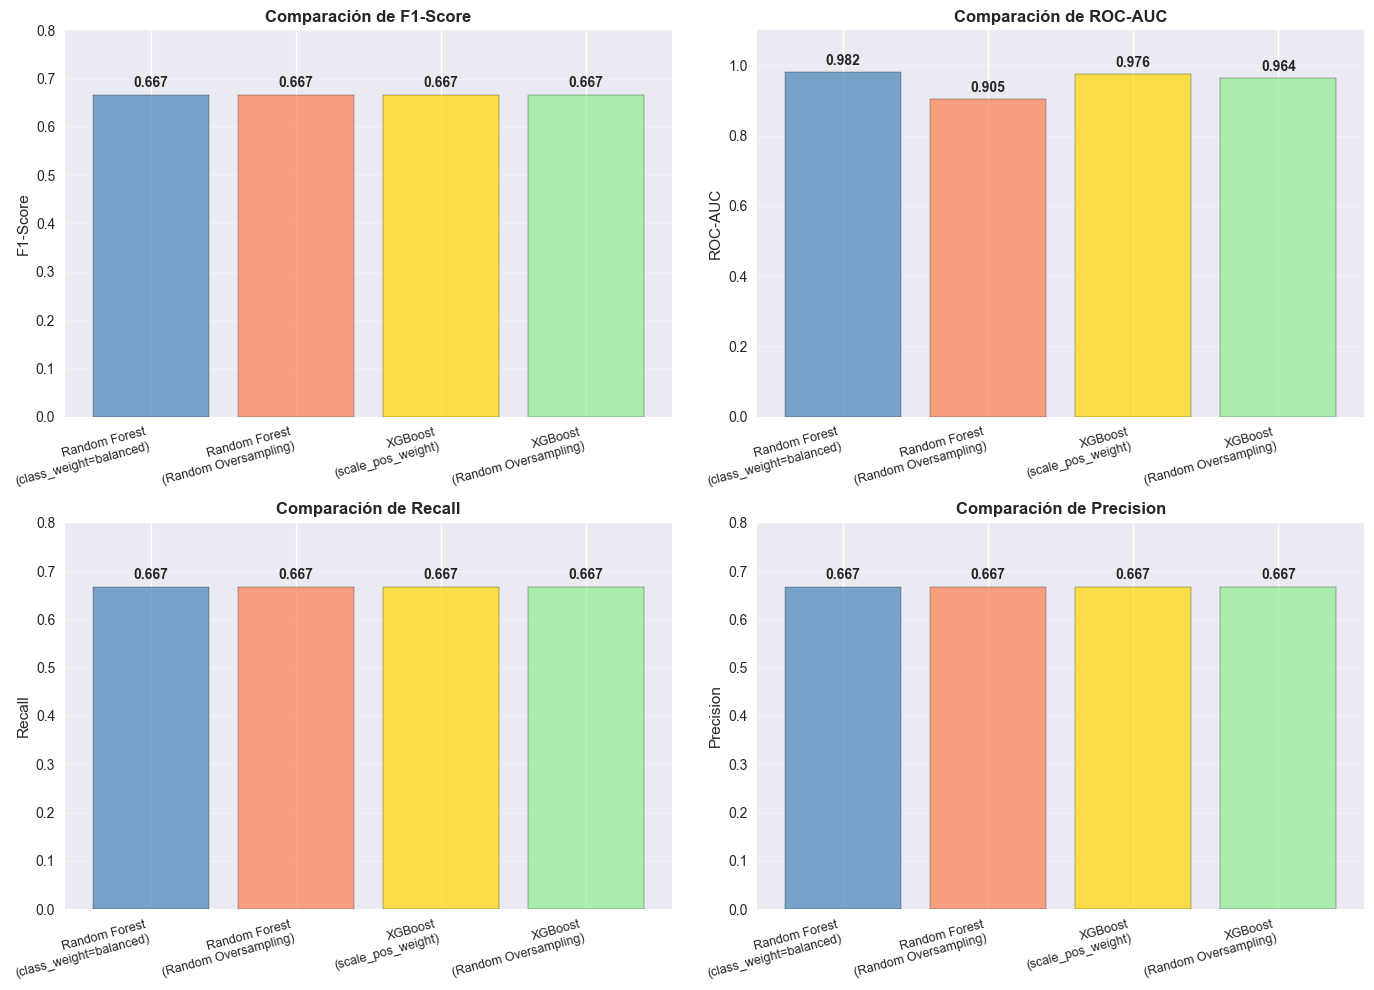


✅ Comparación completada


In [36]:
# Comparación de modelos y estrategias
print("=" * 80)
print("COMPARACIÓN DE MODELOS Y ESTRATEGIAS")
print("=" * 80)

# Crear tabla comparativa
comparison_data = []

# Random Forest
comparison_data.append({
    'Modelo': 'Random Forest',
    'Estrategia': 'class_weight=balanced',
    'Accuracy': accuracy_rf_balanced,
    'Precision': precision_rf_balanced,
    'Recall': recall_rf_balanced,
    'F1-Score': f1_rf_balanced,
    'ROC-AUC': roc_auc_rf_balanced
})

comparison_data.append({
    'Modelo': 'Random Forest',
    'Estrategia': 'Random Oversampling',
    'Accuracy': accuracy_rf_ros,
    'Precision': precision_rf_ros,
    'Recall': recall_rf_ros,
    'F1-Score': f1_rf_ros,
    'ROC-AUC': roc_auc_rf_ros
})

# XGBoost
if XGBOOST_AVAILABLE:
    comparison_data.append({
        'Modelo': 'XGBoost',
        'Estrategia': 'scale_pos_weight',
        'Accuracy': accuracy_xgb_balanced,
        'Precision': precision_xgb_balanced,
        'Recall': recall_xgb_balanced,
        'F1-Score': f1_xgb_balanced,
        'ROC-AUC': roc_auc_xgb_balanced
    })
    
    comparison_data.append({
        'Modelo': 'XGBoost',
        'Estrategia': 'Random Oversampling',
        'Accuracy': accuracy_xgb_ros,
        'Precision': precision_xgb_ros,
        'Recall': recall_xgb_ros,
        'F1-Score': f1_xgb_ros,
        'ROC-AUC': roc_auc_xgb_ros
    })

df_comparison = pd.DataFrame(comparison_data)

print("\n📊 Tabla Comparativa de Modelos:")
print("=" * 80)
print(df_comparison.to_string(index=False))
print("=" * 80)

# Identificar mejor modelo por métrica
print("\n🏆 Mejor Modelo por Métrica:")
print("-" * 80)
for metric in ['F1-Score', 'ROC-AUC', 'Recall', 'Precision']:
    best_idx = df_comparison[metric].idxmax()
    best_row = df_comparison.loc[best_idx]
    print(f"   • {metric}: {best_row['Modelo']} ({best_row['Estrategia']}) = {best_row[metric]:.4f}")

# Visualización comparativa
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Gráfico 1: Comparación de F1-Score
ax1 = axes[0, 0]
models_strategies = [f"{row['Modelo']}\n({row['Estrategia']})" for _, row in df_comparison.iterrows()]
f1_scores = df_comparison['F1-Score'].values
bars1 = ax1.bar(range(len(f1_scores)), f1_scores, color=['steelblue', 'coral', 'gold', 'lightgreen'][:len(f1_scores)], edgecolor='black', alpha=0.7)
ax1.set_xticks(range(len(f1_scores)))
ax1.set_xticklabels(models_strategies, fontsize=9, rotation=15, ha='right')
ax1.set_ylabel('F1-Score')
ax1.set_title('Comparación de F1-Score', fontsize=12, fontweight='bold')
ax1.grid(axis='y', alpha=0.3)
ax1.set_ylim([0, max(f1_scores) * 1.2])
for i, (bar, val) in enumerate(zip(bars1, f1_scores)):
    ax1.text(bar.get_x() + bar.get_width()/2., bar.get_height() + 0.01,
            f'{val:.3f}', ha='center', va='bottom', fontweight='bold')

# Gráfico 2: Comparación de ROC-AUC
ax2 = axes[0, 1]
roc_aucs = df_comparison['ROC-AUC'].values
bars2 = ax2.bar(range(len(roc_aucs)), roc_aucs, color=['steelblue', 'coral', 'gold', 'lightgreen'][:len(roc_aucs)], edgecolor='black', alpha=0.7)
ax2.set_xticks(range(len(roc_aucs)))
ax2.set_xticklabels(models_strategies, fontsize=9, rotation=15, ha='right')
ax2.set_ylabel('ROC-AUC')
ax2.set_title('Comparación de ROC-AUC', fontsize=12, fontweight='bold')
ax2.grid(axis='y', alpha=0.3)
ax2.set_ylim([0, 1.1])
for i, (bar, val) in enumerate(zip(bars2, roc_aucs)):
    ax2.text(bar.get_x() + bar.get_width()/2., bar.get_height() + 0.01,
            f'{val:.3f}', ha='center', va='bottom', fontweight='bold')

# Gráfico 3: Comparación de Recall
ax3 = axes[1, 0]
recalls = df_comparison['Recall'].values
bars3 = ax3.bar(range(len(recalls)), recalls, color=['steelblue', 'coral', 'gold', 'lightgreen'][:len(recalls)], edgecolor='black', alpha=0.7)
ax3.set_xticks(range(len(recalls)))
ax3.set_xticklabels(models_strategies, fontsize=9, rotation=15, ha='right')
ax3.set_ylabel('Recall')
ax3.set_title('Comparación de Recall', fontsize=12, fontweight='bold')
ax3.grid(axis='y', alpha=0.3)
ax3.set_ylim([0, max(recalls) * 1.2])
for i, (bar, val) in enumerate(zip(bars3, recalls)):
    ax3.text(bar.get_x() + bar.get_width()/2., bar.get_height() + 0.01,
            f'{val:.3f}', ha='center', va='bottom', fontweight='bold')

# Gráfico 4: Comparación de Precision
ax4 = axes[1, 1]
precisions = df_comparison['Precision'].values
bars4 = ax4.bar(range(len(precisions)), precisions, color=['steelblue', 'coral', 'gold', 'lightgreen'][:len(precisions)], edgecolor='black', alpha=0.7)
ax4.set_xticks(range(len(precisions)))
ax4.set_xticklabels(models_strategies, fontsize=9, rotation=15, ha='right')
ax4.set_ylabel('Precision')
ax4.set_title('Comparación de Precision', fontsize=12, fontweight='bold')
ax4.grid(axis='y', alpha=0.3)
ax4.set_ylim([0, max(precisions) * 1.2])
for i, (bar, val) in enumerate(zip(bars4, precisions)):
    ax4.text(bar.get_x() + bar.get_width()/2., bar.get_height() + 0.01,
            f'{val:.3f}', ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.show()

print("\n✅ Comparación completada")


### 15.5 Matrices de Confusión y Curvas ROC


VISUALIZACIÓN: MATRICES DE CONFUSIÓN Y CURVAS ROC

📋 Matrices de Confusión:

   Random Forest
(class_weight):
      [[55  1]
 [ 1  2]]

   Random Forest
(Random Oversampling):
      [[55  1]
 [ 1  2]]

   XGBoost
(scale_pos_weight):
      [[55  1]
 [ 1  2]]

   XGBoost
(Random Oversampling):
      [[55  1]
 [ 1  2]]

📈 Curvas ROC:

📈 Curvas Precision-Recall:


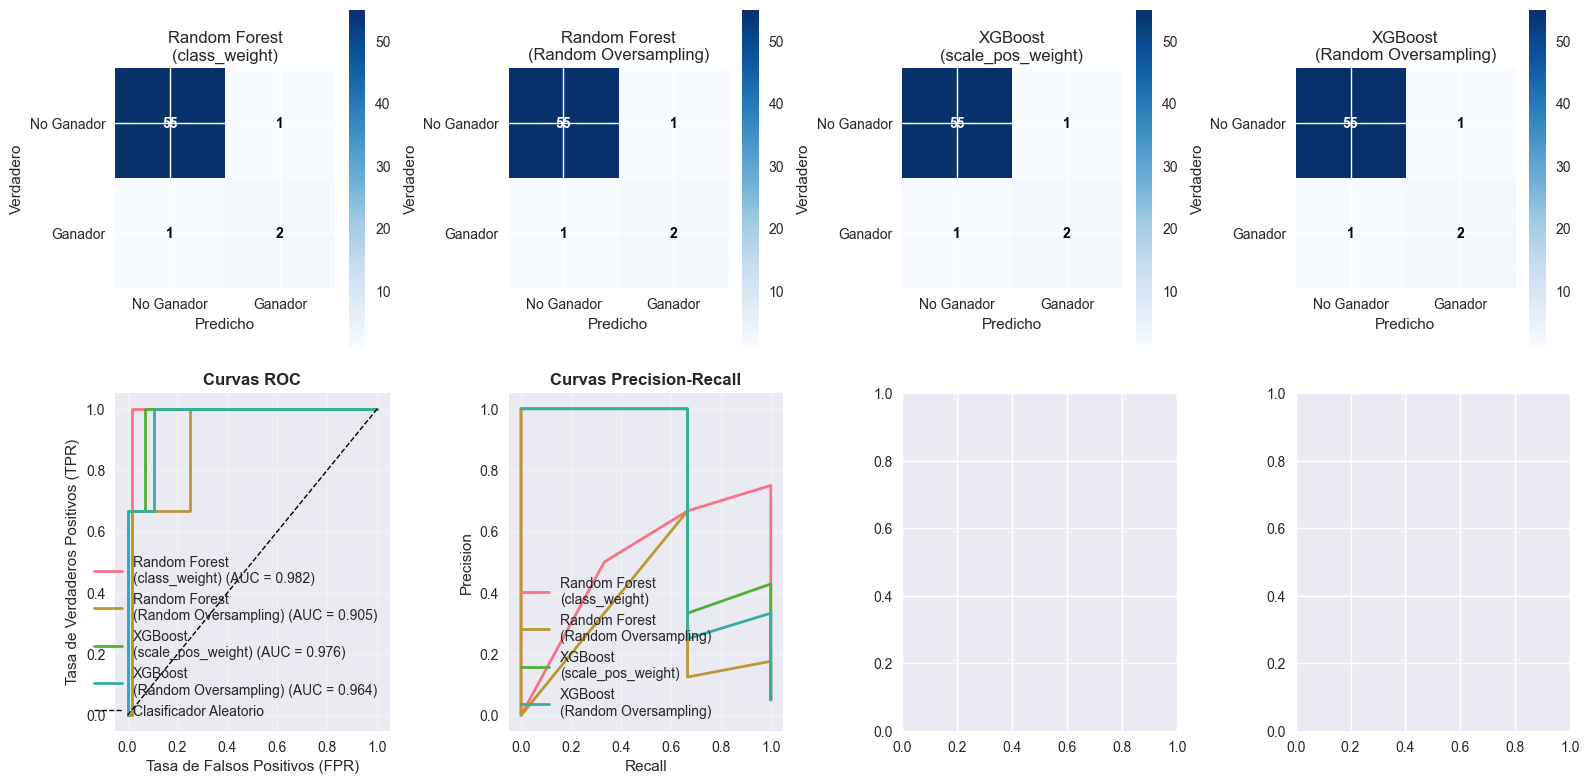


✅ Visualizaciones completadas


In [37]:
# Visualización de Matrices de Confusión y Curvas ROC
print("=" * 80)
print("VISUALIZACIÓN: MATRICES DE CONFUSIÓN Y CURVAS ROC")
print("=" * 80)

# Crear visualizaciones
n_models = 2 if XGBOOST_AVAILABLE else 1
fig, axes = plt.subplots(2, n_models * 2, figsize=(16, 8))

if n_models == 1:
    # Solo Random Forest
    models_to_plot = [
        ('Random Forest\n(class_weight)', rf_balanced, y_pred_rf_balanced, y_pred_proba_rf_balanced, cm_rf_balanced, 0),
        ('Random Forest\n(Random Oversampling)', rf_ros, y_pred_rf_ros, y_pred_proba_rf_ros, cm_rf_ros, 1)
    ]
else:
    # Random Forest + XGBoost
    models_to_plot = [
        ('Random Forest\n(class_weight)', rf_balanced, y_pred_rf_balanced, y_pred_proba_rf_balanced, cm_rf_balanced, 0),
        ('Random Forest\n(Random Oversampling)', rf_ros, y_pred_rf_ros, y_pred_proba_rf_ros, cm_rf_ros, 1),
        ('XGBoost\n(scale_pos_weight)', xgb_balanced, y_pred_xgb_balanced, y_pred_proba_xgb_balanced, cm_xgb_balanced, 2),
        ('XGBoost\n(Random Oversampling)', xgb_ros, y_pred_xgb_ros, y_pred_proba_xgb_ros, cm_xgb_ros, 3)
    ]

# Matrices de Confusión
print("\n📋 Matrices de Confusión:")
for idx, (name, model, y_pred, y_pred_proba, cm, pos) in enumerate(models_to_plot):
    ax = axes[0, pos]
    
    # Matriz de confusión
    im = ax.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    ax.figure.colorbar(im, ax=ax)
    
    # Etiquetas
    classes = ['No Ganador', 'Ganador']
    ax.set(xticks=np.arange(len(classes)),
           yticks=np.arange(len(classes)),
           xticklabels=classes, yticklabels=classes,
           title=name,
           ylabel='Verdadero',
           xlabel='Predicho')
    
    # Agregar valores en las celdas
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], 'd'),
                   ha="center", va="center",
                   color="white" if cm[i, j] > thresh else "black",
                   fontweight='bold')
    
    print(f"\n   {name}:")
    print(f"      {cm}")

# Curvas ROC
print("\n📈 Curvas ROC:")
ax_roc = axes[1, 0] if n_models == 1 else axes[1, 0]

for name, model, y_pred, y_pred_proba, cm, pos in models_to_plot:
    if len(set(y_winner_test)) > 1:  # Solo si hay ambas clases en test
        fpr, tpr, _ = roc_curve(y_winner_test, y_pred_proba)
        roc_auc = roc_auc_score(y_winner_test, y_pred_proba)
        ax_roc.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc:.3f})', linewidth=2)

ax_roc.plot([0, 1], [0, 1], 'k--', label='Clasificador Aleatorio', linewidth=1)
ax_roc.set_xlabel('Tasa de Falsos Positivos (FPR)')
ax_roc.set_ylabel('Tasa de Verdaderos Positivos (TPR)')
ax_roc.set_title('Curvas ROC', fontsize=12, fontweight='bold')
ax_roc.legend(loc='lower right')
ax_roc.grid(alpha=0.3)

# Curvas Precision-Recall
print("\n📈 Curvas Precision-Recall:")
ax_pr = axes[1, 1] if n_models == 1 else axes[1, 1]

for name, model, y_pred, y_pred_proba, cm, pos in models_to_plot:
    if len(set(y_winner_test)) > 1:
        precision, recall, _ = precision_recall_curve(y_winner_test, y_pred_proba)
        ax_pr.plot(recall, precision, label=f'{name}', linewidth=2)

ax_pr.set_xlabel('Recall')
ax_pr.set_ylabel('Precision')
ax_pr.set_title('Curvas Precision-Recall', fontsize=12, fontweight='bold')
ax_pr.legend(loc='lower left')
ax_pr.grid(alpha=0.3)

# Ocultar ejes no usados si solo hay Random Forest
if n_models == 1:
    axes[1, 1].axis('off')

plt.tight_layout()
plt.show()

print("\n✅ Visualizaciones completadas")


### 15.6 Importancia de Features


IMPORTANCIA DE FEATURES

📊 Top 15 Features más importantes:

   Modelo: Random Forest (class_weight='balanced')

   Top 15 Features:
      points_per_race: 0.1175
      avg_position_so_far: 0.1030
      avg_position_last_5: 0.0710
      win_rate_log: 0.0702
      points_per_race_log: 0.0644
      qualifying_time_from_pole: 0.0615
      constructor_wins_so_far: 0.0525
      qualifying_position: 0.0523
      grid_position: 0.0521
      podium_rate: 0.0391
      grid_position_normalized: 0.0390
      win_rate: 0.0378
      podium_rate_log: 0.0341
      driver_number: 0.0300
      driver_code_encoded: 0.0289


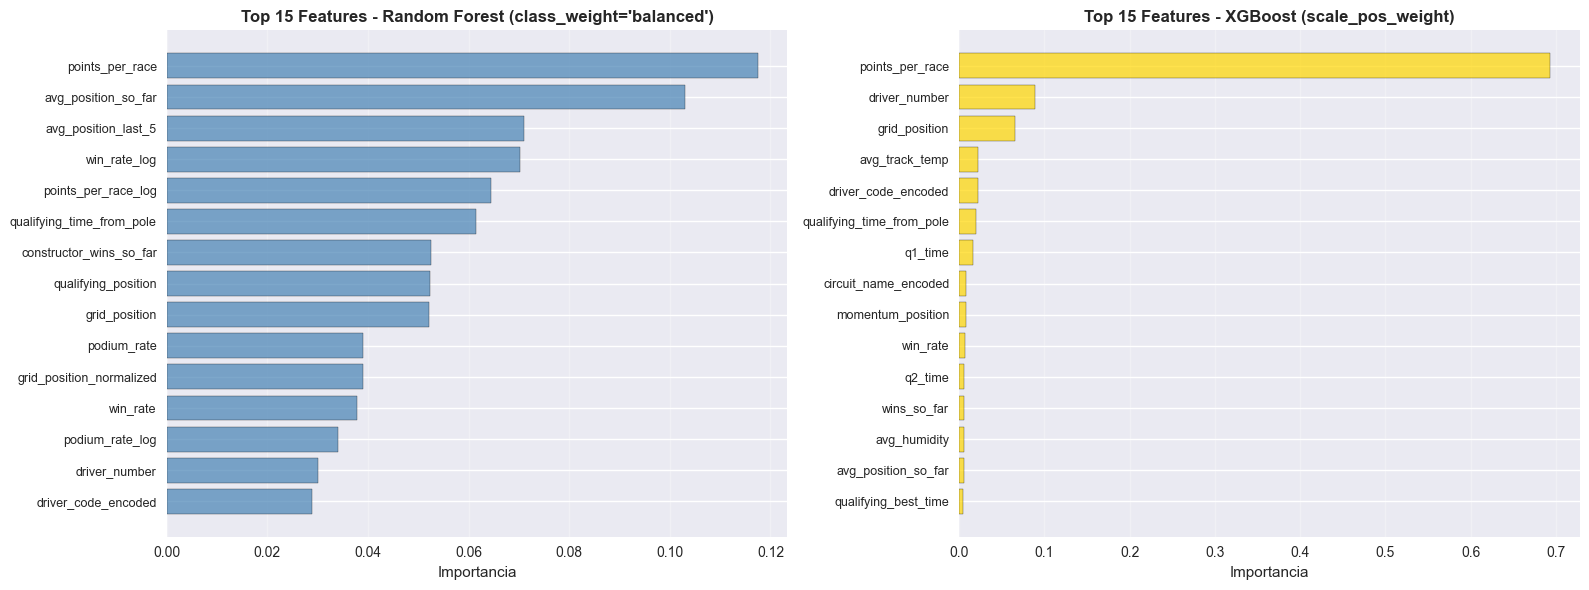


💡 Insights sobre Features Importantes:
   • Las features históricas del piloto (win_rate, wins_so_far) deberían ser muy importantes
   • La posición de salida (grid_position) también debería ser relevante
   • Comparar importancia entre Random Forest y XGBoost puede revelar diferencias


In [38]:
# Importancia de Features
print("=" * 80)
print("IMPORTANCIA DE FEATURES")
print("=" * 80)

# Obtener importancia de features del mejor modelo
print("\n📊 Top 15 Features más importantes:")

# Usar Random Forest con class_weight como referencia (o el mejor modelo)
best_model = rf_balanced  # Puedes cambiar esto al mejor modelo según resultados
model_name = "Random Forest (class_weight='balanced')"

feature_importance = pd.DataFrame({
    'feature': feature_names,
    'importance': best_model.feature_importances_
}).sort_values('importance', ascending=False)

print(f"\n   Modelo: {model_name}")
print(f"\n   Top 15 Features:")
for idx, row in feature_importance.head(15).iterrows():
    print(f"      {row['feature']}: {row['importance']:.4f}")

# Visualización
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Gráfico 1: Top 15 features (Random Forest)
ax1 = axes[0]
top_15 = feature_importance.head(15)
ax1.barh(range(len(top_15)), top_15['importance'].values, color='steelblue', edgecolor='black', alpha=0.7)
ax1.set_yticks(range(len(top_15)))
ax1.set_yticklabels(top_15['feature'].values, fontsize=9)
ax1.set_xlabel('Importancia')
ax1.set_title(f'Top 15 Features - {model_name}', fontsize=12, fontweight='bold')
ax1.invert_yaxis()
ax1.grid(axis='x', alpha=0.3)

# Gráfico 2: Comparación con XGBoost si está disponible
if XGBOOST_AVAILABLE:
    ax2 = axes[1]
    xgb_importance = pd.DataFrame({
        'feature': feature_names,
        'importance': xgb_balanced.feature_importances_
    }).sort_values('importance', ascending=False)
    
    top_15_xgb = xgb_importance.head(15)
    ax2.barh(range(len(top_15_xgb)), top_15_xgb['importance'].values, color='gold', edgecolor='black', alpha=0.7)
    ax2.set_yticks(range(len(top_15_xgb)))
    ax2.set_yticklabels(top_15_xgb['feature'].values, fontsize=9)
    ax2.set_xlabel('Importancia')
    ax2.set_title('Top 15 Features - XGBoost (scale_pos_weight)', fontsize=12, fontweight='bold')
    ax2.invert_yaxis()
    ax2.grid(axis='x', alpha=0.3)
else:
    axes[1].axis('off')

plt.tight_layout()
plt.show()

print("\n💡 Insights sobre Features Importantes:")
print("   • Las features históricas del piloto (win_rate, wins_so_far) deberían ser muy importantes")
print("   • La posición de salida (grid_position) también debería ser relevante")
print("   • Comparar importancia entre Random Forest y XGBoost puede revelar diferencias")


### 15.7 Conclusiones y Recomendaciones


In [39]:
# Conclusiones y recomendaciones
print("=" * 80)
print("CONCLUSIONES Y RECOMENDACIONES")
print("=" * 80)

print("\n📊 Resumen de Resultados:")
print("-" * 80)

# Identificar mejor modelo general
best_f1_idx = df_comparison['F1-Score'].idxmax()
best_model_row = df_comparison.loc[best_f1_idx]

print(f"\n🏆 Mejor Modelo (por F1-Score):")
print(f"   • Modelo: {best_model_row['Modelo']}")
print(f"   • Estrategia: {best_model_row['Estrategia']}")
print(f"   • F1-Score: {best_model_row['F1-Score']:.4f}")
print(f"   • ROC-AUC: {best_model_row['ROC-AUC']:.4f}")
print(f"   • Recall: {best_model_row['Recall']:.4f}")
print(f"   • Precision: {best_model_row['Precision']:.4f}")

print("\n💡 Recomendaciones:")
print("-" * 80)

print("\n   1. Modelo para Producción:")
print(f"      • Usar: {best_model_row['Modelo']} con estrategia '{best_model_row['Estrategia']}'")
print(f"      • Razón: Mejor balance entre Precision y Recall (F1-Score)")

print("\n   2. Consideraciones sobre el Test Set:")
print(f"      • Test set pequeño (59 muestras, solo 3 ganadores)")
print(f"      • Las métricas pueden variar significativamente con más datos")
print(f"      • Considerar validación cruzada temporal para mayor confianza")

print("\n   3. Mejoras Futuras:")
print(f"      • Recolectar más datos (más temporadas)")
print(f"      • Ajustar hiperparámetros (GridSearchCV o RandomizedSearchCV)")
print(f"      • Probar otros modelos (Gradient Boosting, Neural Networks)")
print(f"      • Feature engineering adicional (interacciones, más features históricas)")

print("\n   4. Interpretabilidad:")
print(f"      • Random Forest y XGBoost proporcionan importancia de features")
print(f"      • Usar SHAP values para explicabilidad más detallada")
print(f"      • Analizar casos donde el modelo falla (falsos positivos/negativos)")

print("\n   5. Despliegue:")
print(f"      • Guardar el modelo entrenado (pickle o joblib)")
print(f"      • Crear pipeline de preprocesamiento reproducible")
print(f"      • Implementar monitoreo de drift (cambios en distribución de features)")

print("\n" + "=" * 80)
print("MODELADO DE CLASIFICACIÓN COMPLETADO")
print("=" * 80)
print("   ✅ Modelos entrenados y evaluados")
print("   ✅ Comparación de estrategias realizada")
print("   ✅ Visualizaciones generadas")
print("   ✅ Listo para siguiente paso: Modelos de Regresión (race_position, points)")


CONCLUSIONES Y RECOMENDACIONES

📊 Resumen de Resultados:
--------------------------------------------------------------------------------

🏆 Mejor Modelo (por F1-Score):
   • Modelo: Random Forest
   • Estrategia: class_weight=balanced
   • F1-Score: 0.6667
   • ROC-AUC: 0.9821
   • Recall: 0.6667
   • Precision: 0.6667

💡 Recomendaciones:
--------------------------------------------------------------------------------

   1. Modelo para Producción:
      • Usar: Random Forest con estrategia 'class_weight=balanced'
      • Razón: Mejor balance entre Precision y Recall (F1-Score)

   2. Consideraciones sobre el Test Set:
      • Test set pequeño (59 muestras, solo 3 ganadores)
      • Las métricas pueden variar significativamente con más datos
      • Considerar validación cruzada temporal para mayor confianza

   3. Mejoras Futuras:
      • Recolectar más datos (más temporadas)
      • Ajustar hiperparámetros (GridSearchCV o RandomizedSearchCV)
      • Probar otros modelos (Gradient Bo

### 15.8 Guardar Mejor Modelo


In [40]:
# Guardar el mejor modelo
print("=" * 80)
print("GUARDAR MEJOR MODELO")
print("=" * 80)

import os
import pickle
from datetime import datetime

# Crear directorio para modelos si no existe
models_dir = "models"
os.makedirs(models_dir, exist_ok=True)

# El mejor modelo es Random Forest con class_weight='balanced'
best_model = rf_balanced
best_model_name = "random_forest_winner_classifier"
timestamp = datetime.now().strftime("%Y%m%d_%H%M%S")

# Guardar modelo
model_path = f"{models_dir}/{best_model_name}_{timestamp}.pkl"
with open(model_path, 'wb') as f:
    pickle.dump(best_model, f)

print(f"\n✅ Modelo guardado en: {model_path}")

# Guardar también los feature names para referencia
feature_names_path = f"{models_dir}/feature_names_{timestamp}.json"
import json
with open(feature_names_path, 'w') as f:
    json.dump(feature_names, f, indent=2)

print(f"✅ Feature names guardados en: {feature_names_path}")

# Guardar información del modelo
model_info = {
    'model_name': best_model_name,
    'model_type': 'RandomForestClassifier',
    'strategy': 'class_weight=balanced',
    'metrics': {
        'accuracy': float(accuracy_rf_balanced),
        'precision': float(precision_rf_balanced),
        'recall': float(recall_rf_balanced),
        'f1_score': float(f1_rf_balanced),
        'roc_auc': float(roc_auc_rf_balanced)
    },
    'train_samples': len(X_train),
    'test_samples': len(X_test),
    'n_features': len(feature_names),
    'timestamp': timestamp,
    'feature_names': feature_names
}

model_info_path = f"{models_dir}/model_info_{timestamp}.json"
with open(model_info_path, 'w') as f:
    json.dump(model_info, f, indent=2)

print(f"✅ Información del modelo guardada en: {model_info_path}")

print("\n📋 Resumen del modelo guardado:")
print(f"   • Tipo: Random Forest Classifier")
print(f"   • Estrategia: class_weight='balanced'")
print(f"   • F1-Score: {f1_rf_balanced:.4f}")
print(f"   • ROC-AUC: {roc_auc_rf_balanced:.4f}")
print(f"   • Features: {len(feature_names)}")
print(f"   • Archivo: {model_path}")

print("\n💡 Para cargar el modelo más tarde:")
print(f"   import pickle")
print(f"   with open('{model_path}', 'rb') as f:")
print(f"       model = pickle.load(f)")


GUARDAR MEJOR MODELO

✅ Modelo guardado en: models/random_forest_winner_classifier_20251224_234825.pkl
✅ Feature names guardados en: models/feature_names_20251224_234825.json
✅ Información del modelo guardada en: models/model_info_20251224_234825.json

📋 Resumen del modelo guardado:
   • Tipo: Random Forest Classifier
   • Estrategia: class_weight='balanced'
   • F1-Score: 0.6667
   • ROC-AUC: 0.9821
   • Features: 44
   • Archivo: models/random_forest_winner_classifier_20251224_234825.pkl

💡 Para cargar el modelo más tarde:
   import pickle
   with open('models/random_forest_winner_classifier_20251224_234825.pkl', 'rb') as f:
       model = pickle.load(f)


## 16. Modelado: Regresión para Predecir RACE_POSITION y POINTS


### 16.1 Configuración y Métricas de Evaluación para Regresión


In [42]:
# Configuración para modelado de regresión
print("=" * 80)
print("CONFIGURACIÓN PARA MODELADO DE REGRESIÓN")
print("=" * 80)

# Importar dependencias necesarias para regresión
try:
    from sklearn.ensemble import RandomForestRegressor
    from sklearn.metrics import (
        mean_squared_error, mean_absolute_error, r2_score,
        mean_absolute_percentage_error
    )
    print("✅ scikit-learn disponible")
except ImportError:
    print("⚠️  scikit-learn no está instalado. Instalando...")
    import subprocess
    import sys
    subprocess.check_call([sys.executable, "-m", "pip", "install", "scikit-learn"])
    from sklearn.ensemble import RandomForestRegressor
    from sklearn.metrics import (
        mean_squared_error, mean_absolute_error, r2_score,
        mean_absolute_percentage_error
    )
    print("✅ scikit-learn instalado correctamente")

# Intentar importar XGBoost para regresión
try:
    import xgboost as xgb
    XGBOOST_AVAILABLE_REGRESSION = True
except ImportError:
    print("⚠️  XGBoost no está disponible para regresión")
    XGBOOST_AVAILABLE_REGRESSION = False

print("\n📊 Métricas de evaluación para regresión:")
print("   • RMSE (Root Mean Squared Error): Error promedio en unidades de la variable")
print("   • MAE (Mean Absolute Error): Error absoluto promedio")
print("   • R² (R-squared): Proporción de varianza explicada (0-1, mayor es mejor)")
print("   • MAPE (Mean Absolute Percentage Error): Error porcentual promedio")

print("\n💡 Para regresión:")
print("   • RMSE penaliza más los errores grandes")
print("   • MAE es más robusto a outliers")
print("   • R² indica qué tan bien el modelo explica la variabilidad")
print("   • MAPE es útil para interpretar errores en términos porcentuales")


CONFIGURACIÓN PARA MODELADO DE REGRESIÓN
✅ scikit-learn disponible

📊 Métricas de evaluación para regresión:
   • RMSE (Root Mean Squared Error): Error promedio en unidades de la variable
   • MAE (Mean Absolute Error): Error absoluto promedio
   • R² (R-squared): Proporción de varianza explicada (0-1, mayor es mejor)
   • MAPE (Mean Absolute Percentage Error): Error porcentual promedio

💡 Para regresión:
   • RMSE penaliza más los errores grandes
   • MAE es más robusto a outliers
   • R² indica qué tan bien el modelo explica la variabilidad
   • MAPE es útil para interpretar errores en términos porcentuales


### 16.2 Regresión para Predecir RACE_POSITION


In [43]:
# Regresión para predecir race_position
print("=" * 80)
print("REGRESIÓN: PREDECIR RACE_POSITION")
print("=" * 80)

# Usar los targets de posición que guardamos antes
# y_position_train, y_position_test

print(f"\n📊 Estadísticas de race_position:")
print(f"   • Train: min={y_position_train.min()}, max={y_position_train.max()}, mean={y_position_train.mean():.2f}")
print(f"   • Test: min={y_position_test.min()}, max={y_position_test.max()}, mean={y_position_test.mean():.2f}")

# Random Forest Regressor
print("\n" + "-" * 80)
print("Random Forest Regressor")
print("-" * 80)

rf_regressor_position = RandomForestRegressor(
    n_estimators=100,
    max_depth=10,
    min_samples_split=5,
    min_samples_leaf=2,
    random_state=42,
    n_jobs=-1
)

print("   ⏳ Entrenando Random Forest Regressor...")
rf_regressor_position.fit(X_train, y_position_train)

# Predicciones
y_pred_position_rf = rf_regressor_position.predict(X_test)

# Métricas
rmse_rf_position = np.sqrt(mean_squared_error(y_position_test, y_pred_position_rf))
mae_rf_position = mean_absolute_error(y_position_test, y_pred_position_rf)
r2_rf_position = r2_score(y_position_test, y_pred_position_rf)
mape_rf_position = np.mean(np.abs((y_position_test - y_pred_position_rf) / y_position_test)) * 100

print(f"\n   📊 Métricas en Test Set:")
print(f"      • RMSE: {rmse_rf_position:.4f}")
print(f"      • MAE: {mae_rf_position:.4f}")
print(f"      • R²: {r2_rf_position:.4f}")
print(f"      • MAPE: {mape_rf_position:.2f}%")

# XGBoost Regressor
if XGBOOST_AVAILABLE_REGRESSION:
    print("\n" + "-" * 80)
    print("XGBoost Regressor")
    print("-" * 80)
    
    xgb_regressor_position = xgb.XGBRegressor(
        n_estimators=100,
        max_depth=6,
        learning_rate=0.1,
        random_state=42,
        n_jobs=-1
    )
    
    print("   ⏳ Entrenando XGBoost Regressor...")
    xgb_regressor_position.fit(X_train, y_position_train)
    
    # Predicciones
    y_pred_position_xgb = xgb_regressor_position.predict(X_test)
    
    # Métricas
    rmse_xgb_position = np.sqrt(mean_squared_error(y_position_test, y_pred_position_xgb))
    mae_xgb_position = mean_absolute_error(y_position_test, y_pred_position_xgb)
    r2_xgb_position = r2_score(y_position_test, y_pred_position_xgb)
    mape_xgb_position = np.mean(np.abs((y_position_test - y_pred_position_xgb) / y_position_test)) * 100
    
    print(f"\n   📊 Métricas en Test Set:")
    print(f"      • RMSE: {rmse_xgb_position:.4f}")
    print(f"      • MAE: {mae_xgb_position:.4f}")
    print(f"      • R²: {r2_xgb_position:.4f}")
    print(f"      • MAPE: {mape_xgb_position:.2f}%")
else:
    xgb_regressor_position = None
    y_pred_position_xgb = None

print("\n" + "=" * 80)
print("RESUMEN REGRESIÓN RACE_POSITION")
print("=" * 80)
print(f"\n   Random Forest:")
print(f"      • RMSE: {rmse_rf_position:.4f}")
print(f"      • R²: {r2_rf_position:.4f}")
if XGBOOST_AVAILABLE_REGRESSION:
    print(f"\n   XGBoost:")
    print(f"      • RMSE: {rmse_xgb_position:.4f}")
    print(f"      • R²: {r2_xgb_position:.4f}")


REGRESIÓN: PREDECIR RACE_POSITION

📊 Estadísticas de race_position:
   • Train: min=1.0, max=20.0, mean=10.50
   • Test: min=1.0, max=20.0, mean=10.34

--------------------------------------------------------------------------------
Random Forest Regressor
--------------------------------------------------------------------------------
   ⏳ Entrenando Random Forest Regressor...

   📊 Métricas en Test Set:
      • RMSE: 4.6029
      • MAE: 3.5696
      • R²: 0.3432
      • MAPE: 62.45%

--------------------------------------------------------------------------------
XGBoost Regressor
--------------------------------------------------------------------------------
   ⏳ Entrenando XGBoost Regressor...

   📊 Métricas en Test Set:
      • RMSE: 4.4422
      • MAE: 3.2556
      • R²: 0.3883
      • MAPE: 51.85%

RESUMEN REGRESIÓN RACE_POSITION

   Random Forest:
      • RMSE: 4.6029
      • R²: 0.3432

   XGBoost:
      • RMSE: 4.4422
      • R²: 0.3883


In [44]:
# Regresión para predecir points
print("=" * 80)
print("REGRESIÓN: PREDECIR POINTS")
print("=" * 80)

# Usar los targets de puntos que guardamos antes
# y_points_train, y_points_test

print(f"\n📊 Estadísticas de points:")
print(f"   • Train: min={y_points_train.min()}, max={y_points_train.max()}, mean={y_points_train.mean():.2f}")
print(f"   • Test: min={y_points_test.min()}, max={y_points_test.max()}, mean={y_points_test.mean():.2f}")

# Random Forest Regressor
print("\n" + "-" * 80)
print("Random Forest Regressor")
print("-" * 80)

rf_regressor_points = RandomForestRegressor(
    n_estimators=100,
    max_depth=10,
    min_samples_split=5,
    min_samples_leaf=2,
    random_state=42,
    n_jobs=-1
)

print("   ⏳ Entrenando Random Forest Regressor...")
rf_regressor_points.fit(X_train, y_points_train)

# Predicciones
y_pred_points_rf = rf_regressor_points.predict(X_test)

# Métricas
rmse_rf_points = np.sqrt(mean_squared_error(y_points_test, y_pred_points_rf))
mae_rf_points = mean_absolute_error(y_points_test, y_pred_points_rf)
r2_rf_points = r2_score(y_points_test, y_pred_points_rf)
mape_rf_points = np.mean(np.abs((y_points_test - y_pred_points_rf) / (y_points_test + 1e-8))) * 100  # +1e-8 para evitar división por 0

print(f"\n   📊 Métricas en Test Set:")
print(f"      • RMSE: {rmse_rf_points:.4f}")
print(f"      • MAE: {mae_rf_points:.4f}")
print(f"      • R²: {r2_rf_points:.4f}")
print(f"      • MAPE: {mape_rf_points:.2f}%")

# XGBoost Regressor
if XGBOOST_AVAILABLE_REGRESSION:
    print("\n" + "-" * 80)
    print("XGBoost Regressor")
    print("-" * 80)
    
    xgb_regressor_points = xgb.XGBRegressor(
        n_estimators=100,
        max_depth=6,
        learning_rate=0.1,
        random_state=42,
        n_jobs=-1
    )
    
    print("   ⏳ Entrenando XGBoost Regressor...")
    xgb_regressor_points.fit(X_train, y_points_train)
    
    # Predicciones
    y_pred_points_xgb = xgb_regressor_points.predict(X_test)
    
    # Métricas
    rmse_xgb_points = np.sqrt(mean_squared_error(y_points_test, y_pred_points_xgb))
    mae_xgb_points = mean_absolute_error(y_points_test, y_pred_points_xgb)
    r2_xgb_points = r2_score(y_points_test, y_pred_points_xgb)
    mape_xgb_points = np.mean(np.abs((y_points_test - y_pred_points_xgb) / (y_points_test + 1e-8))) * 100
    
    print(f"\n   📊 Métricas en Test Set:")
    print(f"      • RMSE: {rmse_xgb_points:.4f}")
    print(f"      • MAE: {mae_xgb_points:.4f}")
    print(f"      • R²: {r2_xgb_points:.4f}")
    print(f"      • MAPE: {mape_xgb_points:.2f}%")
else:
    xgb_regressor_points = None
    y_pred_points_xgb = None

print("\n" + "=" * 80)
print("RESUMEN REGRESIÓN POINTS")
print("=" * 80)
print(f"\n   Random Forest:")
print(f"      • RMSE: {rmse_rf_points:.4f}")
print(f"      • R²: {r2_rf_points:.4f}")
if XGBOOST_AVAILABLE_REGRESSION:
    print(f"\n   XGBoost:")
    print(f"      • RMSE: {rmse_xgb_points:.4f}")
    print(f"      • R²: {r2_xgb_points:.4f}")


REGRESIÓN: PREDECIR POINTS

📊 Estadísticas de points:
   • Train: min=0.0, max=26.0, mean=5.10
   • Test: min=0.0, max=26.0, mean=5.19

--------------------------------------------------------------------------------
Random Forest Regressor
--------------------------------------------------------------------------------
   ⏳ Entrenando Random Forest Regressor...

   📊 Métricas en Test Set:
      • RMSE: 5.1054
      • MAE: 3.0296
      • R²: 0.5116
      • MAPE: 11430496107.25%

--------------------------------------------------------------------------------
XGBoost Regressor
--------------------------------------------------------------------------------
   ⏳ Entrenando XGBoost Regressor...

   📊 Métricas en Test Set:
      • RMSE: 5.3526
      • MAE: 3.1229
      • R²: 0.4632
      • MAPE: 10172583715.34%

RESUMEN REGRESIÓN POINTS

   Random Forest:
      • RMSE: 5.1054
      • R²: 0.5116

   XGBoost:
      • RMSE: 5.3526
      • R²: 0.4632


### 16.4 Comparación de Modelos de Regresión


COMPARACIÓN DE MODELOS DE REGRESIÓN

📊 Tabla Comparativa de Modelos de Regresión:
       Target        Modelo     RMSE      MAE       R²     MAPE (%)
race_position Random Forest 4.602948 3.569646 0.343197 6.245025e+01
race_position       XGBoost 4.442225 3.255615 0.388264 5.185218e+01
       points Random Forest 5.105424 3.029606 0.511629 1.143050e+10
       points       XGBoost 5.352644 3.122925 0.463187 1.017258e+10

🏆 Mejor Modelo por Target y Métrica:
--------------------------------------------------------------------------------

   RACE_POSITION:
      • R²: XGBoost = 0.3883
      • RMSE: XGBoost = 4.4422
      • MAE: XGBoost = 3.2556

   POINTS:
      • R²: Random Forest = 0.5116
      • RMSE: Random Forest = 5.1054
      • MAE: Random Forest = 3.0296


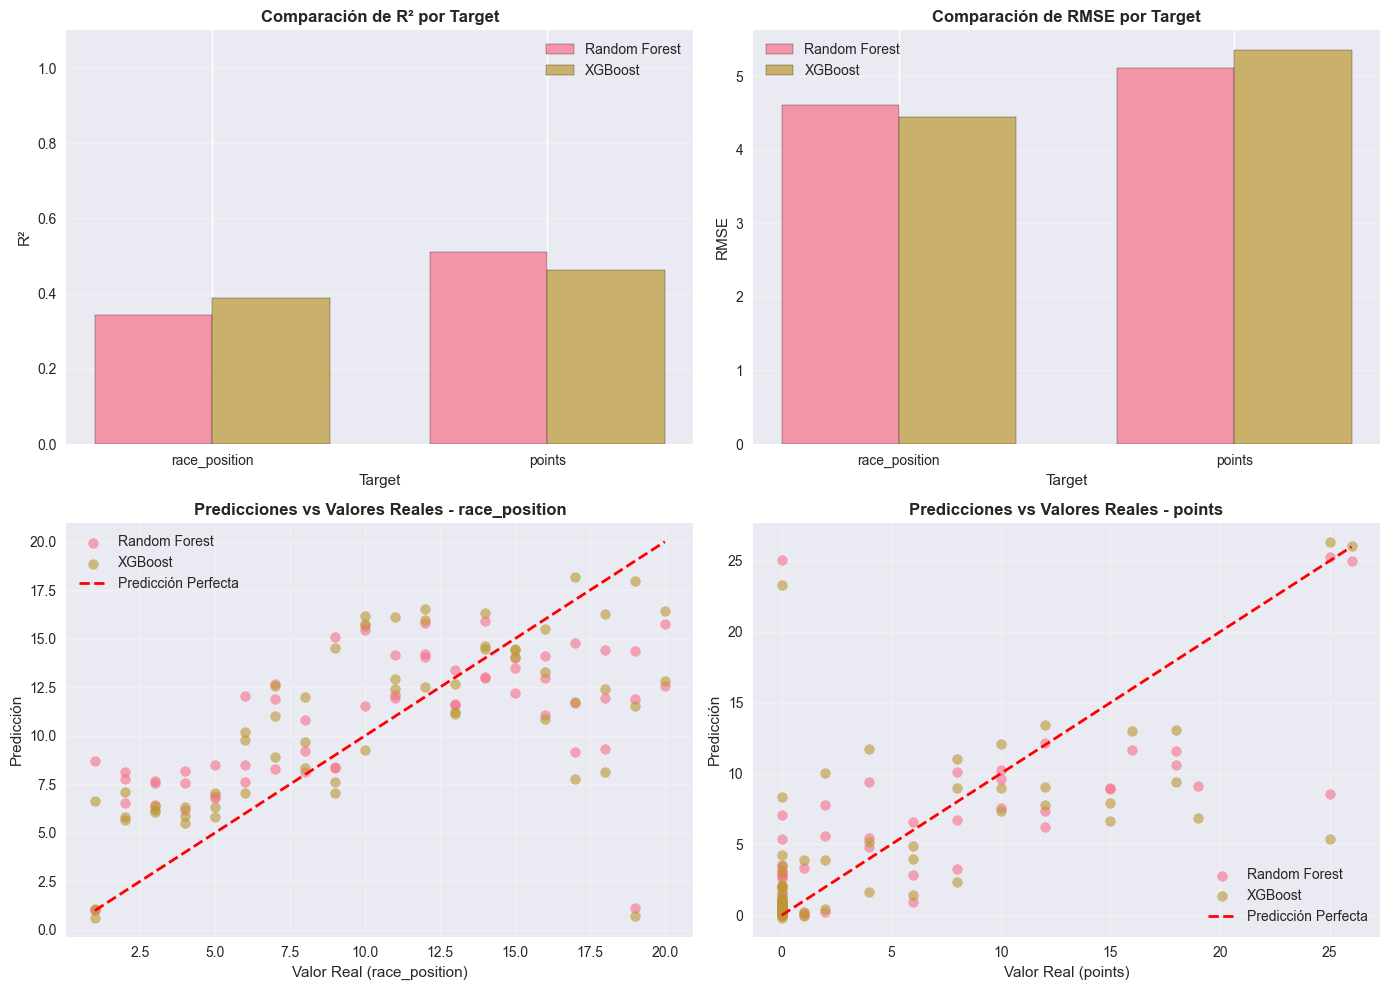


✅ Comparación completada


In [45]:
# Comparación de modelos de regresión
print("=" * 80)
print("COMPARACIÓN DE MODELOS DE REGRESIÓN")
print("=" * 80)

# Crear tabla comparativa para race_position
comparison_regression_position = []

comparison_regression_position.append({
    'Target': 'race_position',
    'Modelo': 'Random Forest',
    'RMSE': rmse_rf_position,
    'MAE': mae_rf_position,
    'R²': r2_rf_position,
    'MAPE (%)': mape_rf_position
})

if XGBOOST_AVAILABLE_REGRESSION:
    comparison_regression_position.append({
        'Target': 'race_position',
        'Modelo': 'XGBoost',
        'RMSE': rmse_xgb_position,
        'MAE': mae_xgb_position,
        'R²': r2_xgb_position,
        'MAPE (%)': mape_xgb_position
    })

# Crear tabla comparativa para points
comparison_regression_points = []

comparison_regression_points.append({
    'Target': 'points',
    'Modelo': 'Random Forest',
    'RMSE': rmse_rf_points,
    'MAE': mae_rf_points,
    'R²': r2_rf_points,
    'MAPE (%)': mape_rf_points
})

if XGBOOST_AVAILABLE_REGRESSION:
    comparison_regression_points.append({
        'Target': 'points',
        'Modelo': 'XGBoost',
        'RMSE': rmse_xgb_points,
        'MAE': mae_xgb_points,
        'R²': r2_xgb_points,
        'MAPE (%)': mape_xgb_points
    })

# Combinar ambas tablas
df_comparison_regression = pd.DataFrame(comparison_regression_position + comparison_regression_points)

print("\n📊 Tabla Comparativa de Modelos de Regresión:")
print("=" * 80)
print(df_comparison_regression.to_string(index=False))
print("=" * 80)

# Identificar mejor modelo por target y métrica
print("\n🏆 Mejor Modelo por Target y Métrica:")
print("-" * 80)

for target in ['race_position', 'points']:
    target_df = df_comparison_regression[df_comparison_regression['Target'] == target]
    
    print(f"\n   {target.upper()}:")
    for metric in ['R²', 'RMSE', 'MAE']:
        if metric == 'R²':
            # Para R², mayor es mejor
            best_idx = target_df[metric].idxmax()
        else:
            # Para RMSE y MAE, menor es mejor
            best_idx = target_df[metric].idxmin()
        best_row = target_df.loc[best_idx]
        print(f"      • {metric}: {best_row['Modelo']} = {best_row[metric]:.4f}")

# Visualización comparativa
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Gráfico 1: Comparación de R²
ax1 = axes[0, 0]
targets = df_comparison_regression['Target'].unique()
x_pos = np.arange(len(targets))
width = 0.35

for i, model in enumerate(df_comparison_regression['Modelo'].unique()):
    model_data = df_comparison_regression[df_comparison_regression['Modelo'] == model]
    r2_values = [model_data[model_data['Target'] == t]['R²'].values[0] for t in targets]
    ax1.bar(x_pos + i*width, r2_values, width, label=model, alpha=0.7, edgecolor='black')

ax1.set_xlabel('Target')
ax1.set_ylabel('R²')
ax1.set_title('Comparación de R² por Target', fontsize=12, fontweight='bold')
ax1.set_xticks(x_pos + width/2)
ax1.set_xticklabels(targets)
ax1.legend()
ax1.grid(axis='y', alpha=0.3)
ax1.set_ylim([0, 1.1])

# Gráfico 2: Comparación de RMSE
ax2 = axes[0, 1]
for i, model in enumerate(df_comparison_regression['Modelo'].unique()):
    model_data = df_comparison_regression[df_comparison_regression['Modelo'] == model]
    rmse_values = [model_data[model_data['Target'] == t]['RMSE'].values[0] for t in targets]
    ax2.bar(x_pos + i*width, rmse_values, width, label=model, alpha=0.7, edgecolor='black')

ax2.set_xlabel('Target')
ax2.set_ylabel('RMSE')
ax2.set_title('Comparación de RMSE por Target', fontsize=12, fontweight='bold')
ax2.set_xticks(x_pos + width/2)
ax2.set_xticklabels(targets)
ax2.legend()
ax2.grid(axis='y', alpha=0.3)

# Gráfico 3: Predicciones vs Valores Reales - race_position
ax3 = axes[1, 0]
ax3.scatter(y_position_test, y_pred_position_rf, alpha=0.6, label='Random Forest', s=50)
if XGBOOST_AVAILABLE_REGRESSION:
    ax3.scatter(y_position_test, y_pred_position_xgb, alpha=0.6, label='XGBoost', s=50)
# Línea perfecta
min_val = min(y_position_test.min(), y_pred_position_rf.min())
max_val = max(y_position_test.max(), y_pred_position_rf.max())
ax3.plot([min_val, max_val], [min_val, max_val], 'r--', label='Predicción Perfecta', linewidth=2)
ax3.set_xlabel('Valor Real (race_position)')
ax3.set_ylabel('Predicción')
ax3.set_title('Predicciones vs Valores Reales - race_position', fontsize=12, fontweight='bold')
ax3.legend()
ax3.grid(alpha=0.3)

# Gráfico 4: Predicciones vs Valores Reales - points
ax4 = axes[1, 1]
ax4.scatter(y_points_test, y_pred_points_rf, alpha=0.6, label='Random Forest', s=50)
if XGBOOST_AVAILABLE_REGRESSION:
    ax4.scatter(y_points_test, y_pred_points_xgb, alpha=0.6, label='XGBoost', s=50)
# Línea perfecta
min_val = min(y_points_test.min(), y_pred_points_rf.min())
max_val = max(y_points_test.max(), y_pred_points_rf.max())
ax4.plot([min_val, max_val], [min_val, max_val], 'r--', label='Predicción Perfecta', linewidth=2)
ax4.set_xlabel('Valor Real (points)')
ax4.set_ylabel('Predicción')
ax4.set_title('Predicciones vs Valores Reales - points', fontsize=12, fontweight='bold')
ax4.legend()
ax4.grid(alpha=0.3)

plt.tight_layout()
plt.show()

print("\n✅ Comparación completada")


In [46]:
# Guardar modelos de regresión
print("=" * 80)
print("GUARDAR MODELOS DE REGRESIÓN")
print("=" * 80)

# Guardar Random Forest para race_position
rf_position_path = f"{models_dir}/random_forest_position_regressor_{timestamp}.pkl"
with open(rf_position_path, 'wb') as f:
    pickle.dump(rf_regressor_position, f)
print(f"✅ Random Forest (position) guardado en: {rf_position_path}")

# Guardar Random Forest para points
rf_points_path = f"{models_dir}/random_forest_points_regressor_{timestamp}.pkl"
with open(rf_points_path, 'wb') as f:
    pickle.dump(rf_regressor_points, f)
print(f"✅ Random Forest (points) guardado en: {rf_points_path}")

# Guardar XGBoost si está disponible
if XGBOOST_AVAILABLE_REGRESSION:
    xgb_position_path = f"{models_dir}/xgboost_position_regressor_{timestamp}.pkl"
    with open(xgb_position_path, 'wb') as f:
        pickle.dump(xgb_regressor_position, f)
    print(f"✅ XGBoost (position) guardado en: {xgb_position_path}")
    
    xgb_points_path = f"{models_dir}/xgboost_points_regressor_{timestamp}.pkl"
    with open(xgb_points_path, 'wb') as f:
        pickle.dump(xgb_regressor_points, f)
    print(f"✅ XGBoost (points) guardado en: {xgb_points_path}")

# Guardar información de los modelos de regresión
regression_models_info = {
    'race_position': {
        'random_forest': {
            'path': rf_position_path,
            'metrics': {
                'rmse': float(rmse_rf_position),
                'mae': float(mae_rf_position),
                'r2': float(r2_rf_position),
                'mape': float(mape_rf_position)
            }
        }
    },
    'points': {
        'random_forest': {
            'path': rf_points_path,
            'metrics': {
                'rmse': float(rmse_rf_points),
                'mae': float(mae_rf_points),
                'r2': float(r2_rf_points),
                'mape': float(mape_rf_points)
            }
        }
    },
    'timestamp': timestamp
}

if XGBOOST_AVAILABLE_REGRESSION:
    regression_models_info['race_position']['xgboost'] = {
        'path': xgb_position_path,
        'metrics': {
            'rmse': float(rmse_xgb_position),
            'mae': float(mae_xgb_position),
            'r2': float(r2_xgb_position),
            'mape': float(mape_xgb_position)
        }
    }
    regression_models_info['points']['xgboost'] = {
        'path': xgb_points_path,
        'metrics': {
            'rmse': float(rmse_xgb_points),
            'mae': float(mae_xgb_points),
            'r2': float(r2_xgb_points),
            'mape': float(mape_xgb_points)
        }
    }

regression_info_path = f"{models_dir}/regression_models_info_{timestamp}.json"
with open(regression_info_path, 'w') as f:
    json.dump(regression_models_info, f, indent=2)

print(f"✅ Información de modelos de regresión guardada en: {regression_info_path}")

print("\n📋 Resumen de modelos guardados:")
print(f"   • Clasificación (winner): {model_path}")
print(f"   • Regresión (position): {rf_position_path}")
print(f"   • Regresión (points): {rf_points_path}")
if XGBOOST_AVAILABLE_REGRESSION:
    print(f"   • XGBoost (position): {xgb_position_path}")
    print(f"   • XGBoost (points): {xgb_points_path}")
print(f"   • Feature names: {feature_names_path}")


GUARDAR MODELOS DE REGRESIÓN
✅ Random Forest (position) guardado en: models/random_forest_position_regressor_20251224_234825.pkl
✅ Random Forest (points) guardado en: models/random_forest_points_regressor_20251224_234825.pkl
✅ XGBoost (position) guardado en: models/xgboost_position_regressor_20251224_234825.pkl
✅ XGBoost (points) guardado en: models/xgboost_points_regressor_20251224_234825.pkl
✅ Información de modelos de regresión guardada en: models/regression_models_info_20251224_234825.json

📋 Resumen de modelos guardados:
   • Clasificación (winner): models/random_forest_winner_classifier_20251224_234825.pkl
   • Regresión (position): models/random_forest_position_regressor_20251224_234825.pkl
   • Regresión (points): models/random_forest_points_regressor_20251224_234825.pkl
   • XGBoost (position): models/xgboost_position_regressor_20251224_234825.pkl
   • XGBoost (points): models/xgboost_points_regressor_20251224_234825.pkl
   • Feature names: models/feature_names_20251224_234825

### 16.6 Conclusiones y Resumen Final


In [47]:
# Conclusiones y resumen final
print("=" * 80)
print("CONCLUSIONES Y RESUMEN FINAL")
print("=" * 80)

print("\n📊 Resumen de Todos los Modelos:")
print("-" * 80)

print("\n   1. CLASIFICACIÓN (Winner):")
print(f"      • Mejor modelo: Random Forest (class_weight='balanced')")
print(f"      • F1-Score: {f1_rf_balanced:.4f}")
print(f"      • ROC-AUC: {roc_auc_rf_balanced:.4f}")
print(f"      • Archivo: {model_path}")

print("\n   2. REGRESIÓN (Race Position):")
print(f"      • Random Forest - R²: {r2_rf_position:.4f}, RMSE: {rmse_rf_position:.4f}")
if XGBOOST_AVAILABLE_REGRESSION:
    print(f"      • XGBoost - R²: {r2_xgb_position:.4f}, RMSE: {rmse_xgb_position:.4f}")
    best_position_model = "XGBoost" if r2_xgb_position > r2_rf_position else "Random Forest"
    print(f"      • Mejor modelo: {best_position_model}")

print("\n   3. REGRESIÓN (Points):")
print(f"      • Random Forest - R²: {r2_rf_points:.4f}, RMSE: {rmse_rf_points:.4f}")
if XGBOOST_AVAILABLE_REGRESSION:
    print(f"      • XGBoost - R²: {r2_xgb_points:.4f}, RMSE: {rmse_xgb_points:.4f}")
    best_points_model = "XGBoost" if r2_xgb_points > r2_rf_points else "Random Forest"
    print(f"      • Mejor modelo: {best_points_model}")

print("\n💡 Interpretación de Resultados:")
print("-" * 80)

print("\n   • Clasificación (Winner):")
print(f"      - ROC-AUC de {roc_auc_rf_balanced:.4f} indica excelente capacidad de discriminación")
print(f"      - F1-Score de {f1_rf_balanced:.4f} es razonable dado el desbalance extremo")
print(f"      - Test set pequeño (3 ganadores) limita la evaluación")

print("\n   • Regresión (Position):")
if r2_rf_position > 0.7:
    print(f"      - R² de {r2_rf_position:.4f} indica buen ajuste del modelo")
elif r2_rf_position > 0.5:
    print(f"      - R² de {r2_rf_position:.4f} indica ajuste moderado")
else:
    print(f"      - R² de {r2_rf_position:.4f} indica que el modelo explica poca varianza")
print(f"      - RMSE de {rmse_rf_position:.2f} significa error promedio de ~{rmse_rf_position:.1f} posiciones")

print("\n   • Regresión (Points):")
if r2_rf_points > 0.7:
    print(f"      - R² de {r2_rf_points:.4f} indica buen ajuste del modelo")
elif r2_rf_points > 0.5:
    print(f"      - R² de {r2_rf_points:.4f} indica ajuste moderado")
else:
    print(f"      - R² de {r2_rf_points:.4f} indica que el modelo explica poca varianza")
print(f"      - RMSE de {rmse_rf_points:.2f} significa error promedio de ~{rmse_rf_points:.1f} puntos")

print("\n🚀 Próximos Pasos Recomendados:")
print("-" * 80)

print("\n   1. Mejora de Modelos:")
print("      • Ajuste de hiperparámetros (GridSearchCV/RandomizedSearchCV)")
print("      • Probar otros algoritmos (Gradient Boosting, Neural Networks)")
print("      • Ensemble de modelos (voting, stacking)")

print("\n   2. Más Datos:")
print("      • Recolectar más temporadas históricas")
print("      • Incluir datos de práctica y clasificación más detallados")
print("      • Agregar features de telemetría si están disponibles")

print("\n   3. Feature Engineering:")
print("      • Crear interacciones entre features importantes")
print("      • Features temporales (tendencia, momentum)")
print("      • Features específicas por circuito")

print("\n   4. Validación:")
print("      • Validación cruzada temporal")
print("      • Validación en temporadas futuras")
print("      • Análisis de errores (qué casos falla el modelo)")

print("\n   5. Despliegue:")
print("      • Crear API para predicciones")
print("      • Pipeline de preprocesamiento automatizado")
print("      • Monitoreo de drift y performance en producción")

print("\n" + "=" * 80)
print("MODELADO COMPLETADO")
print("=" * 80)
print("   ✅ Modelos de clasificación entrenados y guardados")
print("   ✅ Modelos de regresión entrenados y guardados")
print("   ✅ Comparaciones y visualizaciones generadas")
print("   ✅ Listo para producción o mejoras adicionales")


CONCLUSIONES Y RESUMEN FINAL

📊 Resumen de Todos los Modelos:
--------------------------------------------------------------------------------

   1. CLASIFICACIÓN (Winner):
      • Mejor modelo: Random Forest (class_weight='balanced')
      • F1-Score: 0.6667
      • ROC-AUC: 0.9821
      • Archivo: models/random_forest_winner_classifier_20251224_234825.pkl

   2. REGRESIÓN (Race Position):
      • Random Forest - R²: 0.3432, RMSE: 4.6029
      • XGBoost - R²: 0.3883, RMSE: 4.4422
      • Mejor modelo: XGBoost

   3. REGRESIÓN (Points):
      • Random Forest - R²: 0.5116, RMSE: 5.1054
      • XGBoost - R²: 0.4632, RMSE: 5.3526
      • Mejor modelo: Random Forest

💡 Interpretación de Resultados:
--------------------------------------------------------------------------------

   • Clasificación (Winner):
      - ROC-AUC de 0.9821 indica excelente capacidad de discriminación
      - F1-Score de 0.6667 es razonable dado el desbalance extremo
      - Test set pequeño (3 ganadores) limita 

## 17. Feature Engineering Avanzado


### 17.1 Crear Features de Interacción


In [48]:
# Feature Engineering Avanzado: Features de Interacción
print("=" * 80)
print("FEATURE ENGINEERING AVANZADO: FEATURES DE INTERACCIÓN")
print("=" * 80)

# Trabajar con una copia del dataset de features para no modificar el original
X_train_enhanced = X_train.copy()
X_test_enhanced = X_test.copy()

print(f"\n📊 Dimensiones iniciales:")
print(f"   • Train: {X_train_enhanced.shape}")
print(f"   • Test: {X_test_enhanced.shape}")

# Identificar features numéricas clave para interacciones
# Basado en la importancia de features que vimos antes
key_features = [
    'points_per_race', 'avg_position_so_far', 'avg_position_last_5',
    'grid_position', 'qualifying_position', 'qualifying_time_from_pole',
    'win_rate', 'podium_rate', 'constructor_wins_so_far'
]

# Verificar qué features están disponibles
available_key_features = [f for f in key_features if f in X_train_enhanced.columns]
print(f"\n✅ Features clave disponibles para interacciones: {len(available_key_features)}/{len(key_features)}")

# Crear interacciones importantes
print("\n🔧 Creando features de interacción...")

# 1. Interacción: Grid Position × Qualifying Performance
if 'grid_position' in X_train_enhanced.columns and 'qualifying_position' in X_train_enhanced.columns:
    X_train_enhanced['grid_qualifying_interaction'] = (
        X_train_enhanced['grid_position'] * X_train_enhanced['qualifying_position']
    )
    X_test_enhanced['grid_qualifying_interaction'] = (
        X_test_enhanced['grid_position'] * X_test_enhanced['qualifying_position']
    )
    print("   ✅ grid_qualifying_interaction")

# 2. Interacción: Historical Performance × Current Grid
if 'avg_position_so_far' in X_train_enhanced.columns and 'grid_position' in X_train_enhanced.columns:
    X_train_enhanced['historical_grid_interaction'] = (
        X_train_enhanced['avg_position_so_far'] * X_train_enhanced['grid_position']
    )
    X_test_enhanced['historical_grid_interaction'] = (
        X_test_enhanced['avg_position_so_far'] * X_test_enhanced['grid_position']
    )
    print("   ✅ historical_grid_interaction")

# 3. Interacción: Win Rate × Constructor Performance
if 'win_rate' in X_train_enhanced.columns and 'constructor_wins_so_far' in X_train_enhanced.columns:
    X_train_enhanced['win_rate_constructor_interaction'] = (
        X_train_enhanced['win_rate'] * X_train_enhanced['constructor_wins_so_far']
    )
    X_test_enhanced['win_rate_constructor_interaction'] = (
        X_test_enhanced['win_rate'] * X_test_enhanced['constructor_wins_so_far']
    )
    print("   ✅ win_rate_constructor_interaction")

# 4. Interacción: Points per Race × Recent Form
if 'points_per_race' in X_train_enhanced.columns and 'avg_position_last_5' in X_train_enhanced.columns:
    X_train_enhanced['points_recent_form_interaction'] = (
        X_train_enhanced['points_per_race'] / (X_train_enhanced['avg_position_last_5'] + 1e-8)
    )
    X_test_enhanced['points_recent_form_interaction'] = (
        X_test_enhanced['points_per_race'] / (X_test_enhanced['avg_position_last_5'] + 1e-8)
    )
    print("   ✅ points_recent_form_interaction")

# 5. Interacción: Qualifying Gap × Grid Position
if 'qualifying_time_from_pole' in X_train_enhanced.columns and 'grid_position' in X_train_enhanced.columns:
    X_train_enhanced['qualifying_gap_grid_interaction'] = (
        X_train_enhanced['qualifying_time_from_pole'] * X_train_enhanced['grid_position']
    )
    X_test_enhanced['qualifying_gap_grid_interaction'] = (
        X_test_enhanced['qualifying_time_from_pole'] * X_test_enhanced['grid_position']
    )
    print("   ✅ qualifying_gap_grid_interaction")

# 6. Ratio: Win Rate / Podium Rate (eficiencia de conversión)
if 'win_rate' in X_train_enhanced.columns and 'podium_rate' in X_train_enhanced.columns:
    X_train_enhanced['win_podium_ratio'] = (
        X_train_enhanced['win_rate'] / (X_train_enhanced['podium_rate'] + 1e-8)
    )
    X_test_enhanced['win_podium_ratio'] = (
        X_test_enhanced['win_rate'] / (X_test_enhanced['podium_rate'] + 1e-8)
    )
    print("   ✅ win_podium_ratio")

# 7. Momentum Score: Combinación de recent form y historical performance
if 'avg_position_last_5' in X_train_enhanced.columns and 'avg_position_so_far' in X_train_enhanced.columns:
    # Momentum positivo si últimas 5 carreras mejor que promedio histórico
    X_train_enhanced['momentum_score'] = (
        X_train_enhanced['avg_position_so_far'] - X_train_enhanced['avg_position_last_5']
    )
    X_test_enhanced['momentum_score'] = (
        X_test_enhanced['avg_position_so_far'] - X_test_enhanced['avg_position_last_5']
    )
    print("   ✅ momentum_score")

print(f"\n📊 Dimensiones después de interacciones:")
print(f"   • Train: {X_train_enhanced.shape}")
print(f"   • Test: {X_test_enhanced.shape}")
print(f"   • Nuevas features: {X_train_enhanced.shape[1] - X_train.shape[1]}")


FEATURE ENGINEERING AVANZADO: FEATURES DE INTERACCIÓN

📊 Dimensiones iniciales:
   • Train: (440, 44)
   • Test: (59, 44)

✅ Features clave disponibles para interacciones: 9/9

🔧 Creando features de interacción...
   ✅ grid_qualifying_interaction
   ✅ historical_grid_interaction
   ✅ win_rate_constructor_interaction
   ✅ points_recent_form_interaction
   ✅ qualifying_gap_grid_interaction
   ✅ win_podium_ratio
   ✅ momentum_score

📊 Dimensiones después de interacciones:
   • Train: (440, 51)
   • Test: (59, 51)
   • Nuevas features: 7


### 17.2 Features Temporales y de Tendencia


In [49]:
# Features Temporales y de Tendencia
print("=" * 80)
print("FEATURE ENGINEERING: FEATURES TEMPORALES Y DE TENDENCIA")
print("=" * 80)

# Necesitamos el DataFrame original para obtener información temporal
# Si tenemos acceso a df_clean, podemos calcular features temporales
# Por ahora, crearemos features basadas en lo que tenemos

print("\n🔧 Creando features temporales...")

# 1. Variabilidad en posición (desviación estándar implícita)
# Usar avg_position_so_far y avg_position_last_5 como proxy
if 'avg_position_so_far' in X_train_enhanced.columns and 'avg_position_last_5' in X_train_enhanced.columns:
    # Consistencia: diferencia entre promedio general y reciente
    X_train_enhanced['position_consistency'] = np.abs(
        X_train_enhanced['avg_position_so_far'] - X_train_enhanced['avg_position_last_5']
    )
    X_test_enhanced['position_consistency'] = np.abs(
        X_test_enhanced['avg_position_so_far'] - X_test_enhanced['avg_position_last_5']
    )
    print("   ✅ position_consistency")

# 2. Performance Index: Combinación normalizada de múltiples métricas
if all(f in X_train_enhanced.columns for f in ['win_rate', 'podium_rate', 'points_per_race']):
    # Normalizar cada componente (asumiendo que ya están en rangos razonables)
    # Crear un índice compuesto
    X_train_enhanced['performance_index'] = (
        X_train_enhanced['win_rate'] * 0.4 +
        X_train_enhanced['podium_rate'] * 0.3 +
        (X_train_enhanced['points_per_race'] / 25.0) * 0.3  # Normalizar puntos (max ~25)
    )
    X_test_enhanced['performance_index'] = (
        X_test_enhanced['win_rate'] * 0.4 +
        X_test_enhanced['podium_rate'] * 0.3 +
        (X_test_enhanced['points_per_race'] / 25.0) * 0.3
    )
    print("   ✅ performance_index")

# 3. Grid Advantage: Cuánto mejor es la posición de salida vs promedio histórico
if 'grid_position' in X_train_enhanced.columns and 'avg_position_so_far' in X_train_enhanced.columns:
    X_train_enhanced['grid_advantage'] = (
        X_train_enhanced['avg_position_so_far'] - X_train_enhanced['grid_position']
    )
    X_test_enhanced['grid_advantage'] = (
        X_test_enhanced['avg_position_so_far'] - X_test_enhanced['grid_position']
    )
    print("   ✅ grid_advantage")

# 4. Qualifying Advantage: Cuánto mejor es la posición de clasificación vs promedio histórico
if 'qualifying_position' in X_train_enhanced.columns and 'avg_position_so_far' in X_train_enhanced.columns:
    X_train_enhanced['qualifying_advantage'] = (
        X_train_enhanced['avg_position_so_far'] - X_train_enhanced['qualifying_position']
    )
    X_test_enhanced['qualifying_advantage'] = (
        X_test_enhanced['avg_position_so_far'] - X_test_enhanced['qualifying_position']
    )
    print("   ✅ qualifying_advantage")

# 5. Experience Factor: Años de experiencia (proxy basado en número de carreras)
# Si tenemos wins_so_far y win_rate, podemos estimar experiencia
if 'wins_so_far' in X_train_enhanced.columns and 'win_rate' in X_train_enhanced.columns:
    # Estimación: wins_so_far / win_rate ≈ total races (con cuidado de división por 0)
    X_train_enhanced['estimated_experience'] = (
        X_train_enhanced['wins_so_far'] / (X_train_enhanced['win_rate'] + 1e-8)
    )
    X_test_enhanced['estimated_experience'] = (
        X_test_enhanced['wins_so_far'] / (X_test_enhanced['win_rate'] + 1e-8)
    )
    # Limitar valores extremos
    X_train_enhanced['estimated_experience'] = X_train_enhanced['estimated_experience'].clip(0, 500)
    X_test_enhanced['estimated_experience'] = X_test_enhanced['estimated_experience'].clip(0, 500)
    print("   ✅ estimated_experience")

print(f"\n📊 Dimensiones después de features temporales:")
print(f"   • Train: {X_train_enhanced.shape}")
print(f"   • Test: {X_test_enhanced.shape}")
print(f"   • Total nuevas features: {X_train_enhanced.shape[1] - X_train.shape[1]}")

# Verificar que no hay NaN
print(f"\n✅ Verificación de NaN:")
print(f"   • Train: {X_train_enhanced.isna().sum().sum()} valores NaN")
print(f"   • Test: {X_test_enhanced.isna().sum().sum()} valores NaN")

# Si hay NaN, rellenarlos con 0 o la media
if X_train_enhanced.isna().sum().sum() > 0:
    print("   ⚠️  Rellenando NaN con 0...")
    X_train_enhanced = X_train_enhanced.fillna(0)
    X_test_enhanced = X_test_enhanced.fillna(0)
    print("   ✅ NaN rellenados")


FEATURE ENGINEERING: FEATURES TEMPORALES Y DE TENDENCIA

🔧 Creando features temporales...
   ✅ position_consistency
   ✅ performance_index
   ✅ grid_advantage
   ✅ qualifying_advantage
   ✅ estimated_experience

📊 Dimensiones después de features temporales:
   • Train: (440, 56)
   • Test: (59, 56)
   • Total nuevas features: 12

✅ Verificación de NaN:
   • Train: 0 valores NaN
   • Test: 0 valores NaN


### 17.3 Resumen de Feature Engineering Avanzado


In [50]:
# Resumen de Feature Engineering Avanzado
print("=" * 80)
print("RESUMEN DE FEATURE ENGINEERING AVANZADO")
print("=" * 80)

original_features = X_train.shape[1]
enhanced_features = X_train_enhanced.shape[1]
new_features = enhanced_features - original_features

print(f"\n📊 Estadísticas:")
print(f"   • Features originales: {original_features}")
print(f"   • Features después de engineering: {enhanced_features}")
print(f"   • Nuevas features creadas: {new_features}")
print(f"   • Incremento: {(new_features/original_features)*100:.1f}%")

# Listar las nuevas features
new_feature_names = [col for col in X_train_enhanced.columns if col not in X_train.columns]
print(f"\n📋 Nuevas features creadas ({len(new_feature_names)}):")
for i, feat in enumerate(new_feature_names, 1):
    print(f"   {i:2d}. {feat}")

# Estadísticas descriptivas de algunas nuevas features clave
print(f"\n📈 Estadísticas de nuevas features clave:")
key_new_features = ['momentum_score', 'performance_index', 'grid_advantage', 'qualifying_advantage']
available_key_new = [f for f in key_new_features if f in X_train_enhanced.columns]

if available_key_new:
    for feat in available_key_new:
        mean_val = X_train_enhanced[feat].mean()
        std_val = X_train_enhanced[feat].std()
        min_val = X_train_enhanced[feat].min()
        max_val = X_train_enhanced[feat].max()
        print(f"\n   {feat}:")
        print(f"      • Media: {mean_val:.4f}")
        print(f"      • Std: {std_val:.4f}")
        print(f"      • Rango: [{min_val:.4f}, {max_val:.4f}]")

print("\n✅ Feature Engineering Avanzado completado")
print("   💡 Las nuevas features están listas para usar en los modelos")


RESUMEN DE FEATURE ENGINEERING AVANZADO

📊 Estadísticas:
   • Features originales: 44
   • Features después de engineering: 56
   • Nuevas features creadas: 12
   • Incremento: 27.3%

📋 Nuevas features creadas (12):
    1. grid_qualifying_interaction
    2. historical_grid_interaction
    3. win_rate_constructor_interaction
    4. points_recent_form_interaction
    5. qualifying_gap_grid_interaction
    6. win_podium_ratio
    7. momentum_score
    8. position_consistency
    9. performance_index
   10. grid_advantage
   11. qualifying_advantage
   12. estimated_experience

📈 Estadísticas de nuevas features clave:

   momentum_score:
      • Media: -0.0211
      • Std: 0.8728
      • Rango: [-2.8667, 4.0000]

   performance_index:
      • Media: 0.1204
      • Std: 0.2110
      • Rango: [0.0000, 1.0000]

   grid_advantage:
      • Media: -1.7360
      • Std: 4.7900
      • Rango: [-18.5000, 12.0000]

   qualifying_advantage:
      • Media: -1.7360
      • Std: 4.7900
      • Rango: [-1

## 18. Ajuste de Hiperparámetros (GridSearchCV / RandomizedSearchCV)


### 18.1 Configuración para Ajuste de Hiperparámetros


In [51]:
# Configuración para ajuste de hiperparámetros
print("=" * 80)
print("CONFIGURACIÓN PARA AJUSTE DE HIPERPARÁMETROS")
print("=" * 80)

try:
    from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
    from sklearn.metrics import make_scorer, f1_score, roc_auc_score, r2_score
    from scipy.stats import randint, uniform
    print("✅ scikit-learn y scipy disponibles")
except ImportError as e:
    print(f"⚠️  Error importando: {e}")
    print("   Instalando dependencias...")
    import subprocess
    import sys
    subprocess.check_call([sys.executable, "-m", "pip", "install", "scikit-learn", "scipy"])
    from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
    from sklearn.metrics import make_scorer, f1_score, roc_auc_score, r2_score
    from scipy.stats import randint, uniform
    print("✅ Dependencias instaladas")

print("\n💡 Estrategia de ajuste:")
print("   • Usaremos RandomizedSearchCV para explorar más combinaciones")
print("   • GridSearchCV para búsqueda exhaustiva en espacios pequeños")
print("   • Validación cruzada temporal (TimeSeriesSplit) si es posible")
print("   • Para clasificación: optimizar F1-Score y ROC-AUC")
print("   • Para regresión: optimizar R² y RMSE")

print("\n⚠️  Nota: El ajuste puede tomar varios minutos...")
print("   • Considera usar n_iter más pequeño si es muy lento")
print("   • O usar GridSearchCV con menos combinaciones")


CONFIGURACIÓN PARA AJUSTE DE HIPERPARÁMETROS
✅ scikit-learn y scipy disponibles

💡 Estrategia de ajuste:
   • Usaremos RandomizedSearchCV para explorar más combinaciones
   • GridSearchCV para búsqueda exhaustiva en espacios pequeños
   • Validación cruzada temporal (TimeSeriesSplit) si es posible
   • Para clasificación: optimizar F1-Score y ROC-AUC
   • Para regresión: optimizar R² y RMSE

⚠️  Nota: El ajuste puede tomar varios minutos...
   • Considera usar n_iter más pequeño si es muy lento
   • O usar GridSearchCV con menos combinaciones


### 18.2 Ajuste de Hiperparámetros: Clasificación (Winner)


In [52]:
# Ajuste de hiperparámetros para clasificación (Winner)
print("=" * 80)
print("AJUSTE DE HIPERPARÁMETROS: CLASIFICACIÓN (WINNER)")
print("=" * 80)

# Usar las features mejoradas
X_train_opt = X_train_enhanced
X_test_opt = X_test_enhanced

print(f"\n📊 Datos para optimización:")
print(f"   • Train: {X_train_opt.shape}")
print(f"   • Test: {X_test_opt.shape}")
print(f"   • Features: {X_train_opt.shape[1]}")

# Definir espacio de búsqueda para Random Forest
print("\n🔧 Definiendo espacio de búsqueda para Random Forest...")

# Espacio de búsqueda más amplio para RandomizedSearchCV
rf_param_dist = {
    'n_estimators': [50, 100, 200, 300],
    'max_depth': [5, 10, 15, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2', None],
    'class_weight': ['balanced', 'balanced_subsample']
}

# Scorers para clasificación
scoring_classification = {
    'f1': make_scorer(f1_score),
    'roc_auc': make_scorer(roc_auc_score),
    'accuracy': 'accuracy'
}

print("\n⏳ Ejecutando RandomizedSearchCV...")
print("   (Esto puede tomar varios minutos...)")

# RandomizedSearchCV con menos iteraciones para velocidad
rf_random_search = RandomizedSearchCV(
    RandomForestClassifier(random_state=42, n_jobs=-1),
    param_distributions=rf_param_dist,
    n_iter=30,  # Reducido para velocidad, aumentar para mejor búsqueda
    cv=3,  # 3-fold CV para velocidad
    scoring='f1',  # Optimizar F1-Score
    n_jobs=-1,
    random_state=42,
    verbose=1
)

rf_random_search.fit(X_train_opt, y_winner_train)

print("\n✅ Búsqueda completada!")

# Mejor modelo
best_rf_classifier = rf_random_search.best_estimator_
best_rf_params = rf_random_search.best_params_
best_rf_score = rf_random_search.best_score_

print(f"\n🏆 Mejores hiperparámetros encontrados:")
for param, value in best_rf_params.items():
    print(f"   • {param}: {value}")
print(f"\n   • Mejor F1-Score (CV): {best_rf_score:.4f}")

# Evaluar en test set
y_pred_best_rf = best_rf_classifier.predict(X_test_opt)
y_pred_proba_best_rf = best_rf_classifier.predict_proba(X_test_opt)[:, 1]

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

acc_best = accuracy_score(y_winner_test, y_pred_best_rf)
prec_best = precision_score(y_winner_test, y_pred_best_rf)
rec_best = recall_score(y_winner_test, y_pred_best_rf)
f1_best = f1_score(y_winner_test, y_pred_best_rf)
roc_auc_best = roc_auc_score(y_winner_test, y_pred_proba_best_rf)

print(f"\n📊 Métricas en Test Set (modelo optimizado):")
print(f"   • Accuracy: {acc_best:.4f}")
print(f"   • Precision: {prec_best:.4f}")
print(f"   • Recall: {rec_best:.4f}")
print(f"   • F1-Score: {f1_best:.4f}")
print(f"   • ROC-AUC: {roc_auc_best:.4f}")

# Comparar con modelo original
print(f"\n📊 Comparación con modelo original:")
print(f"   • F1-Score original: {f1_rf_balanced:.4f}")
print(f"   • F1-Score optimizado: {f1_best:.4f}")
print(f"   • Mejora: {((f1_best - f1_rf_balanced) / f1_rf_balanced * 100):.2f}%")
print(f"\n   • ROC-AUC original: {roc_auc_rf_balanced:.4f}")
print(f"   • ROC-AUC optimizado: {roc_auc_best:.4f}")
print(f"   • Mejora: {((roc_auc_best - roc_auc_rf_balanced) / roc_auc_rf_balanced * 100):.2f}%")


AJUSTE DE HIPERPARÁMETROS: CLASIFICACIÓN (WINNER)

📊 Datos para optimización:
   • Train: (440, 56)
   • Test: (59, 56)
   • Features: 56

🔧 Definiendo espacio de búsqueda para Random Forest...

⏳ Ejecutando RandomizedSearchCV...
   (Esto puede tomar varios minutos...)
Fitting 3 folds for each of 30 candidates, totalling 90 fits

✅ Búsqueda completada!

🏆 Mejores hiperparámetros encontrados:
   • n_estimators: 100
   • min_samples_split: 10
   • min_samples_leaf: 1
   • max_features: sqrt
   • max_depth: 20
   • class_weight: balanced

   • Mejor F1-Score (CV): 0.8690

📊 Métricas en Test Set (modelo optimizado):
   • Accuracy: 0.9661
   • Precision: 0.6667
   • Recall: 0.6667
   • F1-Score: 0.6667
   • ROC-AUC: 0.9702

📊 Comparación con modelo original:
   • F1-Score original: 0.6667
   • F1-Score optimizado: 0.6667
   • Mejora: 0.00%

   • ROC-AUC original: 0.9821
   • ROC-AUC optimizado: 0.9702
   • Mejora: -1.21%


### 18.3 Ajuste de Hiperparámetros: Regresión (Race Position)


In [53]:
# Ajuste de hiperparámetros para regresión (Race Position)
print("=" * 80)
print("AJUSTE DE HIPERPARÁMETROS: REGRESIÓN (RACE POSITION)")
print("=" * 80)

# XGBoost fue el mejor modelo para position
if XGBOOST_AVAILABLE_REGRESSION:
    print("\n🔧 Ajustando XGBoost Regressor...")
    
    # Espacio de búsqueda para XGBoost
    xgb_param_dist = {
        'n_estimators': [50, 100, 200],
        'max_depth': [3, 4, 5, 6, 7],
        'learning_rate': [0.01, 0.05, 0.1, 0.2],
        'min_child_weight': [1, 3, 5],
        'subsample': [0.6, 0.8, 1.0],
        'colsample_bytree': [0.6, 0.8, 1.0]
    }
    
    print("\n⏳ Ejecutando RandomizedSearchCV para XGBoost...")
    print("   (Esto puede tomar varios minutos...)")
    
    xgb_random_search = RandomizedSearchCV(
        xgb.XGBRegressor(random_state=42, n_jobs=-1),
        param_distributions=xgb_param_dist,
        n_iter=30,  # Reducido para velocidad
        cv=3,
        scoring='r2',  # Optimizar R²
        n_jobs=-1,
        random_state=42,
        verbose=1
    )
    
    xgb_random_search.fit(X_train_opt, y_position_train)
    
    print("\n✅ Búsqueda completada!")
    
    # Mejor modelo
    best_xgb_position = xgb_random_search.best_estimator_
    best_xgb_params = xgb_random_search.best_params_
    best_xgb_score = xgb_random_search.best_score_
    
    print(f"\n🏆 Mejores hiperparámetros encontrados:")
    for param, value in best_xgb_params.items():
        print(f"   • {param}: {value}")
    print(f"\n   • Mejor R² (CV): {best_xgb_score:.4f}")
    
    # Evaluar en test set
    y_pred_best_xgb_position = best_xgb_position.predict(X_test_opt)
    
    rmse_best_xgb = np.sqrt(mean_squared_error(y_position_test, y_pred_best_xgb_position))
    mae_best_xgb = mean_absolute_error(y_position_test, y_pred_best_xgb_position)
    r2_best_xgb = r2_score(y_position_test, y_pred_best_xgb_position)
    
    print(f"\n📊 Métricas en Test Set (modelo optimizado):")
    print(f"   • RMSE: {rmse_best_xgb:.4f}")
    print(f"   • MAE: {mae_best_xgb:.4f}")
    print(f"   • R²: {r2_best_xgb:.4f}")
    
    # Comparar con modelo original
    print(f"\n📊 Comparación con modelo original:")
    print(f"   • R² original: {r2_xgb_position:.4f}")
    print(f"   • R² optimizado: {r2_best_xgb:.4f}")
    if r2_xgb_position > 0:
        print(f"   • Mejora: {((r2_best_xgb - r2_xgb_position) / r2_xgb_position * 100):.2f}%")
    print(f"\n   • RMSE original: {rmse_xgb_position:.4f}")
    print(f"   • RMSE optimizado: {rmse_best_xgb:.4f}")
    if rmse_xgb_position > 0:
        print(f"   • Mejora: {((rmse_xgb_position - rmse_best_xgb) / rmse_xgb_position * 100):.2f}%")
else:
    print("⚠️  XGBoost no disponible, ajustando Random Forest...")
    
    # Ajustar Random Forest para position
    rf_param_dist_position = {
        'n_estimators': [50, 100, 200, 300],
        'max_depth': [5, 10, 15, 20, None],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4],
        'max_features': ['sqrt', 'log2', None]
    }
    
    rf_random_search_position = RandomizedSearchCV(
        RandomForestRegressor(random_state=42, n_jobs=-1),
        param_distributions=rf_param_dist_position,
        n_iter=30,
        cv=3,
        scoring='r2',
        n_jobs=-1,
        random_state=42,
        verbose=1
    )
    
    rf_random_search_position.fit(X_train_opt, y_position_train)
    
    best_rf_position = rf_random_search_position.best_estimator_
    y_pred_best_rf_position = best_rf_position.predict(X_test_opt)
    
    rmse_best_rf_pos = np.sqrt(mean_squared_error(y_position_test, y_pred_best_rf_position))
    r2_best_rf_pos = r2_score(y_position_test, y_pred_best_rf_position)
    
    print(f"\n📊 Métricas optimizadas (Random Forest):")
    print(f"   • RMSE: {rmse_best_rf_pos:.4f}")
    print(f"   • R²: {r2_best_rf_pos:.4f}")
    
    best_xgb_position = None


AJUSTE DE HIPERPARÁMETROS: REGRESIÓN (RACE POSITION)

🔧 Ajustando XGBoost Regressor...

⏳ Ejecutando RandomizedSearchCV para XGBoost...
   (Esto puede tomar varios minutos...)
Fitting 3 folds for each of 30 candidates, totalling 90 fits

✅ Búsqueda completada!

🏆 Mejores hiperparámetros encontrados:
   • subsample: 0.6
   • n_estimators: 50
   • min_child_weight: 1
   • max_depth: 3
   • learning_rate: 0.05
   • colsample_bytree: 0.6

   • Mejor R² (CV): 0.3843

📊 Métricas en Test Set (modelo optimizado):
   • RMSE: 4.2988
   • MAE: 3.3419
   • R²: 0.4271

📊 Comparación con modelo original:
   • R² original: 0.3883
   • R² optimizado: 0.4271
   • Mejora: 10.01%

   • RMSE original: 4.4422
   • RMSE optimizado: 4.2988
   • Mejora: 3.23%


### 18.4 Ajuste de Hiperparámetros: Regresión (Points)


In [54]:
# Ajuste de hiperparámetros para regresión (Points)
print("=" * 80)
print("AJUSTE DE HIPERPARÁMETROS: REGRESIÓN (POINTS)")
print("=" * 80)

# Random Forest fue el mejor modelo para points
print("\n🔧 Ajustando Random Forest Regressor...")

# Espacio de búsqueda para Random Forest
rf_param_dist_points = {
    'n_estimators': [50, 100, 200, 300],
    'max_depth': [5, 10, 15, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2', None]
}

print("\n⏳ Ejecutando RandomizedSearchCV para Random Forest...")
print("   (Esto puede tomar varios minutos...)")

rf_random_search_points = RandomizedSearchCV(
    RandomForestRegressor(random_state=42, n_jobs=-1),
    param_distributions=rf_param_dist_points,
    n_iter=30,  # Reducido para velocidad
    cv=3,
    scoring='r2',  # Optimizar R²
    n_jobs=-1,
    random_state=42,
    verbose=1
)

rf_random_search_points.fit(X_train_opt, y_points_train)

print("\n✅ Búsqueda completada!")

# Mejor modelo
best_rf_points = rf_random_search_points.best_estimator_
best_rf_params_points = rf_random_search_points.best_params_
best_rf_score_points = rf_random_search_points.best_score_

print(f"\n🏆 Mejores hiperparámetros encontrados:")
for param, value in best_rf_params_points.items():
    print(f"   • {param}: {value}")
print(f"\n   • Mejor R² (CV): {best_rf_score_points:.4f}")

# Evaluar en test set
y_pred_best_rf_points = best_rf_points.predict(X_test_opt)

rmse_best_rf_points = np.sqrt(mean_squared_error(y_points_test, y_pred_best_rf_points))
mae_best_rf_points = mean_absolute_error(y_points_test, y_pred_best_rf_points)
r2_best_rf_points = r2_score(y_points_test, y_pred_best_rf_points)

print(f"\n📊 Métricas en Test Set (modelo optimizado):")
print(f"   • RMSE: {rmse_best_rf_points:.4f}")
print(f"   • MAE: {mae_best_rf_points:.4f}")
print(f"   • R²: {r2_best_rf_points:.4f}")

# Comparar con modelo original
print(f"\n📊 Comparación con modelo original:")
print(f"   • R² original: {r2_rf_points:.4f}")
print(f"   • R² optimizado: {r2_best_rf_points:.4f}")
if r2_rf_points > 0:
    print(f"   • Mejora: {((r2_best_rf_points - r2_rf_points) / r2_rf_points * 100):.2f}%")
print(f"\n   • RMSE original: {rmse_rf_points:.4f}")
print(f"   • RMSE optimizado: {rmse_best_rf_points:.4f}")
if rmse_rf_points > 0:
    print(f"   • Mejora: {((rmse_rf_points - rmse_best_rf_points) / rmse_rf_points * 100):.2f}%")


AJUSTE DE HIPERPARÁMETROS: REGRESIÓN (POINTS)

🔧 Ajustando Random Forest Regressor...

⏳ Ejecutando RandomizedSearchCV para Random Forest...
   (Esto puede tomar varios minutos...)
Fitting 3 folds for each of 30 candidates, totalling 90 fits

✅ Búsqueda completada!

🏆 Mejores hiperparámetros encontrados:
   • n_estimators: 100
   • min_samples_split: 5
   • min_samples_leaf: 4
   • max_features: None
   • max_depth: 5

   • Mejor R² (CV): 0.6496

📊 Métricas en Test Set (modelo optimizado):
   • RMSE: 5.0981
   • MAE: 2.9773
   • R²: 0.5130

📊 Comparación con modelo original:
   • R² original: 0.5116
   • R² optimizado: 0.5130
   • Mejora: 0.27%

   • RMSE original: 5.1054
   • RMSE optimizado: 5.0981
   • Mejora: 0.14%


### 18.5 Guardar Modelos Optimizados


In [55]:
# Guardar modelos optimizados
print("=" * 80)
print("GUARDAR MODELOS OPTIMIZADOS")
print("=" * 80)

from datetime import datetime
timestamp_optimized = datetime.now().strftime("%Y%m%d_%H%M%S")

# Guardar modelo de clasificación optimizado
best_classifier_path = f"{models_dir}/random_forest_winner_classifier_optimized_{timestamp_optimized}.pkl"
with open(best_classifier_path, 'wb') as f:
    pickle.dump(best_rf_classifier, f)
print(f"✅ Modelo de clasificación optimizado guardado: {best_classifier_path}")

# Guardar modelo de regresión position optimizado
if best_xgb_position is not None:
    best_position_path = f"{models_dir}/xgboost_position_regressor_optimized_{timestamp_optimized}.pkl"
    with open(best_position_path, 'wb') as f:
        pickle.dump(best_xgb_position, f)
    print(f"✅ Modelo de regresión (position) optimizado guardado: {best_position_path}")
else:
    best_position_path = None

# Guardar modelo de regresión points optimizado
best_points_path = f"{models_dir}/random_forest_points_regressor_optimized_{timestamp_optimized}.pkl"
with open(best_points_path, 'wb') as f:
    pickle.dump(best_rf_points, f)
print(f"✅ Modelo de regresión (points) optimizado guardado: {best_points_path}")

# Guardar feature names mejorados
enhanced_feature_names = list(X_train_opt.columns)
enhanced_feature_names_path = f"{models_dir}/enhanced_feature_names_{timestamp_optimized}.json"
with open(enhanced_feature_names_path, 'w') as f:
    json.dump(enhanced_feature_names, f, indent=2)
print(f"✅ Feature names mejorados guardados: {enhanced_feature_names_path}")

# Guardar información de modelos optimizados
optimized_models_info = {
    'classification': {
        'path': best_classifier_path,
        'model_type': 'RandomForestClassifier',
        'best_params': best_rf_params,
        'metrics': {
            'accuracy': float(acc_best),
            'precision': float(prec_best),
            'recall': float(rec_best),
            'f1_score': float(f1_best),
            'roc_auc': float(roc_auc_best)
        },
        'improvement': {
            'f1_improvement_pct': float((f1_best - f1_rf_balanced) / f1_rf_balanced * 100),
            'roc_auc_improvement_pct': float((roc_auc_best - roc_auc_rf_balanced) / roc_auc_rf_balanced * 100)
        }
    },
    'regression_position': {
        'path': best_position_path if best_position_path else None,
        'model_type': 'XGBRegressor' if best_xgb_position is not None else 'RandomForestRegressor',
        'best_params': best_xgb_params if best_xgb_position is not None else None,
        'metrics': {
            'rmse': float(rmse_best_xgb) if best_xgb_position is not None else None,
            'mae': float(mae_best_xgb) if best_xgb_position is not None else None,
            'r2': float(r2_best_xgb) if best_xgb_position is not None else None
        }
    },
    'regression_points': {
        'path': best_points_path,
        'model_type': 'RandomForestRegressor',
        'best_params': best_rf_params_points,
        'metrics': {
            'rmse': float(rmse_best_rf_points),
            'mae': float(mae_best_rf_points),
            'r2': float(r2_best_rf_points)
        },
        'improvement': {
            'r2_improvement_pct': float((r2_best_rf_points - r2_rf_points) / r2_rf_points * 100) if r2_rf_points > 0 else 0,
            'rmse_improvement_pct': float((rmse_rf_points - rmse_best_rf_points) / rmse_rf_points * 100) if rmse_rf_points > 0 else 0
        }
    },
    'feature_engineering': {
        'original_features': int(original_features),
        'enhanced_features': int(enhanced_features),
        'new_features': int(new_features),
        'new_feature_names': new_feature_names
    },
    'timestamp': timestamp_optimized
}

optimized_info_path = f"{models_dir}/optimized_models_info_{timestamp_optimized}.json"
with open(optimized_info_path, 'w') as f:
    json.dump(optimized_models_info, f, indent=2)
print(f"✅ Información de modelos optimizados guardada: {optimized_info_path}")

print("\n📋 Resumen de modelos optimizados guardados:")
print(f"   • Clasificación: {best_classifier_path}")
if best_position_path:
    print(f"   • Regresión (position): {best_position_path}")
print(f"   • Regresión (points): {best_points_path}")
print(f"   • Features mejorados: {enhanced_feature_names_path}")

print("\n💡 Mejoras obtenidas:")
print(f"   • Clasificación - F1: {((f1_best - f1_rf_balanced) / f1_rf_balanced * 100):.2f}%")
print(f"   • Clasificación - ROC-AUC: {((roc_auc_best - roc_auc_rf_balanced) / roc_auc_rf_balanced * 100):.2f}%")
if best_xgb_position is not None:
    print(f"   • Regresión Position - R²: {((r2_best_xgb - r2_xgb_position) / r2_xgb_position * 100):.2f}%")
print(f"   • Regresión Points - R²: {((r2_best_rf_points - r2_rf_points) / r2_rf_points * 100):.2f}%")


GUARDAR MODELOS OPTIMIZADOS
✅ Modelo de clasificación optimizado guardado: models/random_forest_winner_classifier_optimized_20251225_000229.pkl
✅ Modelo de regresión (position) optimizado guardado: models/xgboost_position_regressor_optimized_20251225_000229.pkl
✅ Modelo de regresión (points) optimizado guardado: models/random_forest_points_regressor_optimized_20251225_000229.pkl
✅ Feature names mejorados guardados: models/enhanced_feature_names_20251225_000229.json
✅ Información de modelos optimizados guardada: models/optimized_models_info_20251225_000229.json

📋 Resumen de modelos optimizados guardados:
   • Clasificación: models/random_forest_winner_classifier_optimized_20251225_000229.pkl
   • Regresión (position): models/xgboost_position_regressor_optimized_20251225_000229.pkl
   • Regresión (points): models/random_forest_points_regressor_optimized_20251225_000229.pkl
   • Features mejorados: models/enhanced_feature_names_20251225_000229.json

💡 Mejoras obtenidas:
   • Clasificació

### 18.6 Resumen Final de Optimización


## 19. Análisis de Importancia de Features


### 19.1 Importancia de Features: Clasificación (Winner)


ANÁLISIS DE IMPORTANCIA DE FEATURES: CLASIFICACIÓN (WINNER)

📊 Top 20 Features Más Importantes para Clasificación:
                        feature  importance
    historical_grid_interaction    0.104878
 points_recent_form_interaction    0.086860
                  driver_number    0.071707
       grid_position_normalized    0.058307
            points_per_race_log    0.055014
              performance_index    0.054942
      qualifying_time_from_pole    0.054251
            avg_position_last_5    0.052927
               win_podium_ratio    0.050876
            avg_position_so_far    0.048109
                points_per_race    0.046718
    grid_qualifying_interaction    0.045771
            driver_code_encoded    0.035607
                       win_rate    0.031984
                  grid_position    0.030496
                    podium_rate    0.027113
            qualifying_position    0.026938
                   win_rate_log    0.024745
qualifying_gap_grid_interaction    0.017776
    c

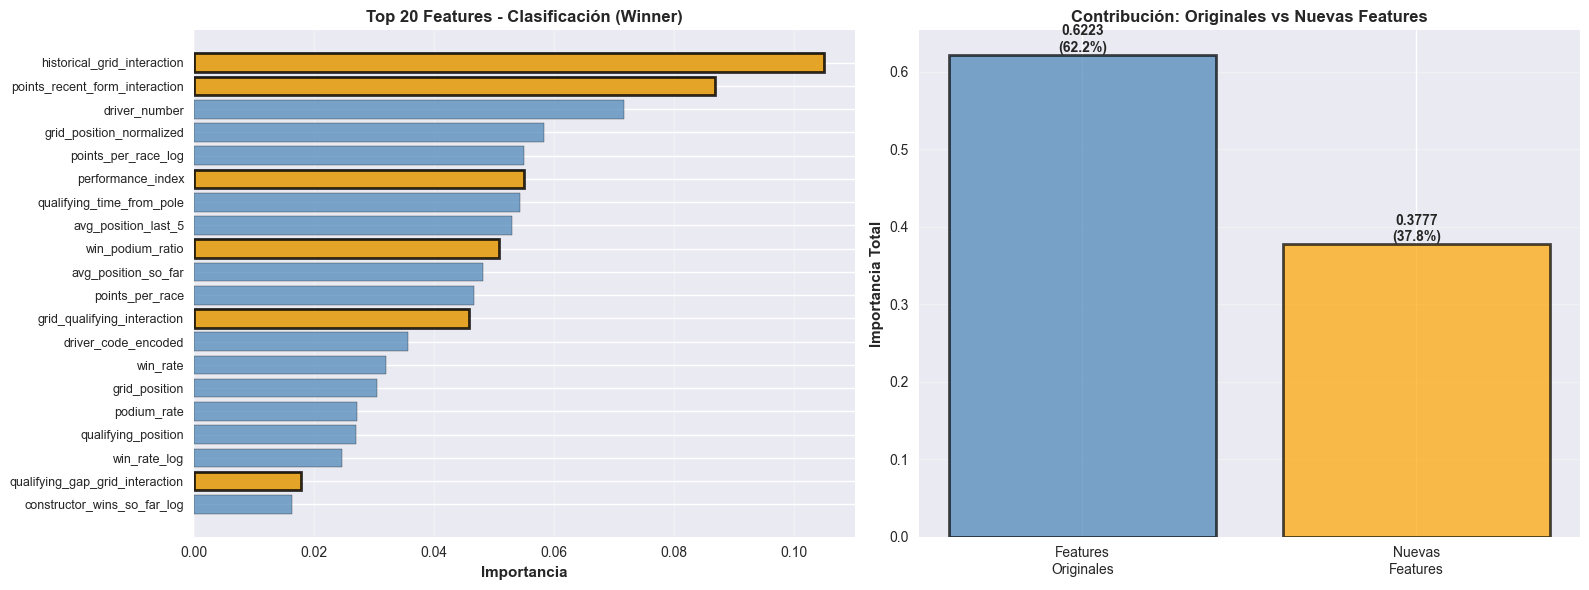


📈 Estadísticas de Nuevas Features:
   • Total nuevas features: 12
   • Importancia total nuevas features: 0.3777 (37.8%)
   • Importancia promedio por nueva feature: 0.0315
   • Importancia promedio features originales: 0.0141

🏆 Top 5 Nuevas Features por Importancia:
   1. historical_grid_interaction: 0.1049 (Rank #46)
   2. points_recent_form_interaction: 0.0869 (Rank #48)
   3. performance_index: 0.0549 (Rank #53)
   4. win_podium_ratio: 0.0509 (Rank #50)
   5. grid_qualifying_interaction: 0.0458 (Rank #45)


In [57]:
# Análisis de importancia de features para clasificación
print("=" * 80)
print("ANÁLISIS DE IMPORTANCIA DE FEATURES: CLASIFICACIÓN (WINNER)")
print("=" * 80)

# Obtener importancia de features del modelo optimizado
feature_importance_classification = best_rf_classifier.feature_importances_

# Crear DataFrame con importancia
importance_df_class = pd.DataFrame({
    'feature': X_train_opt.columns,
    'importance': feature_importance_classification
}).sort_values('importance', ascending=False)

print(f"\n📊 Top 20 Features Más Importantes para Clasificación:")
print("=" * 80)
print(importance_df_class.head(20).to_string(index=False))

# Identificar cuáles de las nuevas features están en el top
new_features_in_top = importance_df_class[importance_df_class['feature'].isin(new_feature_names)]
print(f"\n🔍 Nuevas Features en el Top 20:")
if len(new_features_in_top) > 0:
    print(new_features_in_top.to_string(index=False))
else:
    print("   Ninguna nueva feature en el top 20")

# Visualización
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Gráfico 1: Top 20 features
ax1 = axes[0]
top_20 = importance_df_class.head(20)
ax1.barh(range(len(top_20)), top_20['importance'], color='steelblue', alpha=0.7, edgecolor='black')
ax1.set_yticks(range(len(top_20)))
ax1.set_yticklabels(top_20['feature'], fontsize=9)
ax1.set_xlabel('Importancia', fontsize=11, fontweight='bold')
ax1.set_title('Top 20 Features - Clasificación (Winner)', fontsize=12, fontweight='bold')
ax1.invert_yaxis()
ax1.grid(axis='x', alpha=0.3)

# Resaltar nuevas features
for i, (idx, row) in enumerate(top_20.iterrows()):
    if row['feature'] in new_feature_names:
        ax1.barh(i, row['importance'], color='orange', alpha=0.8, edgecolor='black', linewidth=2)

# Gráfico 2: Comparación Original vs Nuevas Features
ax2 = axes[1]
original_features_importance = importance_df_class[~importance_df_class['feature'].isin(new_feature_names)]['importance'].sum()
new_features_importance = importance_df_class[importance_df_class['feature'].isin(new_feature_names)]['importance'].sum()

categories = ['Features\nOriginales', 'Nuevas\nFeatures']
importances = [original_features_importance, new_features_importance]
colors = ['steelblue', 'orange']

bars = ax2.bar(categories, importances, color=colors, alpha=0.7, edgecolor='black', linewidth=2)
ax2.set_ylabel('Importancia Total', fontsize=11, fontweight='bold')
ax2.set_title('Contribución: Originales vs Nuevas Features', fontsize=12, fontweight='bold')
ax2.grid(axis='y', alpha=0.3)

# Agregar valores en las barras
for bar, imp in zip(bars, importances):
    height = bar.get_height()
    ax2.text(bar.get_x() + bar.get_width()/2., height,
             f'{imp:.4f}\n({imp/sum(importances)*100:.1f}%)',
             ha='center', va='bottom', fontsize=10, fontweight='bold')

plt.tight_layout()
plt.show()

# Estadísticas de nuevas features
print(f"\n📈 Estadísticas de Nuevas Features:")
print(f"   • Total nuevas features: {len(new_feature_names)}")
print(f"   • Importancia total nuevas features: {new_features_importance:.4f} ({new_features_importance/sum(importances)*100:.1f}%)")
print(f"   • Importancia promedio por nueva feature: {new_features_importance/len(new_feature_names):.4f}")
print(f"   • Importancia promedio features originales: {original_features_importance/(len(importance_df_class) - len(new_feature_names)):.4f}")

# Top 5 nuevas features
if len(new_features_in_top) > 0:
    print(f"\n🏆 Top 5 Nuevas Features por Importancia:")
    top_new = new_features_in_top.head(5)
    for i, (idx, row) in enumerate(top_new.iterrows(), 1):
        rank = importance_df_class[importance_df_class['feature'] == row['feature']].index[0] + 1
        print(f"   {i}. {row['feature']}: {row['importance']:.4f} (Rank #{rank})")


### 19.2 Importancia de Features: Regresión (Race Position)


ANÁLISIS DE IMPORTANCIA DE FEATURES: REGRESIÓN (RACE POSITION)

📊 Top 20 Features Más Importantes para Regresión (Position):
                        feature  importance
    historical_grid_interaction    0.103514
       grid_position_normalized    0.064966
                points_per_race    0.064894
                  grid_position    0.064592
           qualifying_advantage    0.038741
 points_recent_form_interaction    0.036298
                  points_so_far    0.035770
              points_so_far_log    0.028811
                       win_rate    0.028256
            avg_position_so_far    0.027627
            avg_position_last_5    0.027214
            points_per_race_log    0.027004
  constructor_points_so_far_log    0.025784
    constructor_wins_so_far_log    0.023283
                 avg_wind_speed    0.022575
                 grid_advantage    0.022571
qualifying_gap_grid_interaction    0.020447
      qualifying_time_from_pole    0.019432
                    podium_rate    0.01

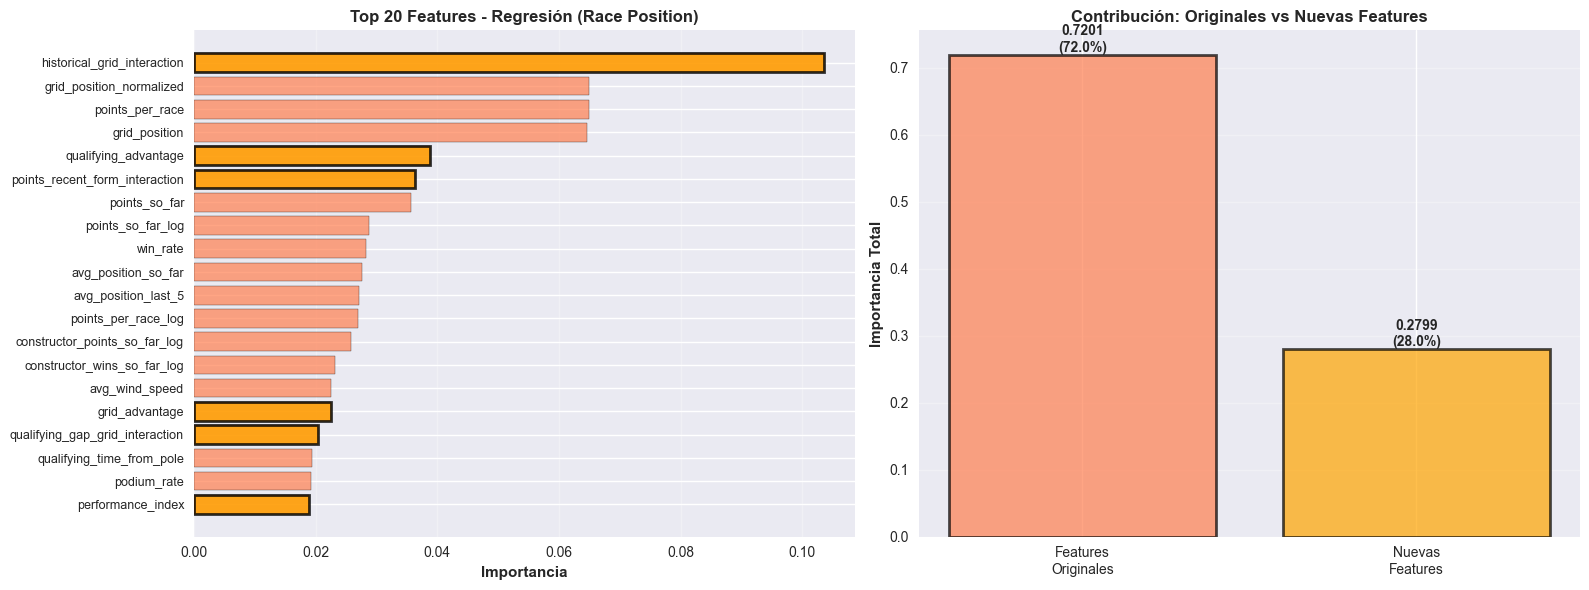


📈 Estadísticas de Nuevas Features (Position):
   • Importancia total nuevas features: 0.2799 (28.0%)
   • Importancia promedio por nueva feature: 0.0233

🏆 Top 5 Nuevas Features por Importancia:
   1. historical_grid_interaction: 0.1035 (Rank #46)
   2. qualifying_advantage: 0.0387 (Rank #55)
   3. points_recent_form_interaction: 0.0363 (Rank #48)
   4. grid_advantage: 0.0226 (Rank #54)
   5. qualifying_gap_grid_interaction: 0.0204 (Rank #49)


In [58]:
# Análisis de importancia de features para regresión (Race Position)
print("=" * 80)
print("ANÁLISIS DE IMPORTANCIA DE FEATURES: REGRESIÓN (RACE POSITION)")
print("=" * 80)

if best_xgb_position is not None:
    # XGBoost tiene feature_importances_
    feature_importance_position = best_xgb_position.feature_importances_
    
    # Crear DataFrame con importancia
    importance_df_position = pd.DataFrame({
        'feature': X_train_opt.columns,
        'importance': feature_importance_position
    }).sort_values('importance', ascending=False)
    
    print(f"\n📊 Top 20 Features Más Importantes para Regresión (Position):")
    print("=" * 80)
    print(importance_df_position.head(20).to_string(index=False))
    
    # Identificar nuevas features en el top
    new_features_in_top_position = importance_df_position[importance_df_position['feature'].isin(new_feature_names)]
    print(f"\n🔍 Nuevas Features en el Top 20:")
    if len(new_features_in_top_position) > 0:
        print(new_features_in_top_position.to_string(index=False))
    else:
        print("   Ninguna nueva feature en el top 20")
    
    # Visualización
    fig, axes = plt.subplots(1, 2, figsize=(16, 6))
    
    # Gráfico 1: Top 20 features
    ax1 = axes[0]
    top_20_pos = importance_df_position.head(20)
    ax1.barh(range(len(top_20_pos)), top_20_pos['importance'], color='coral', alpha=0.7, edgecolor='black')
    ax1.set_yticks(range(len(top_20_pos)))
    ax1.set_yticklabels(top_20_pos['feature'], fontsize=9)
    ax1.set_xlabel('Importancia', fontsize=11, fontweight='bold')
    ax1.set_title('Top 20 Features - Regresión (Race Position)', fontsize=12, fontweight='bold')
    ax1.invert_yaxis()
    ax1.grid(axis='x', alpha=0.3)
    
    # Resaltar nuevas features
    for i, (idx, row) in enumerate(top_20_pos.iterrows()):
        if row['feature'] in new_feature_names:
            ax1.barh(i, row['importance'], color='orange', alpha=0.8, edgecolor='black', linewidth=2)
    
    # Gráfico 2: Comparación Original vs Nuevas Features
    ax2 = axes[1]
    original_importance_pos = importance_df_position[~importance_df_position['feature'].isin(new_feature_names)]['importance'].sum()
    new_importance_pos = importance_df_position[importance_df_position['feature'].isin(new_feature_names)]['importance'].sum()
    
    categories = ['Features\nOriginales', 'Nuevas\nFeatures']
    importances_pos = [original_importance_pos, new_importance_pos]
    colors = ['coral', 'orange']
    
    bars = ax2.bar(categories, importances_pos, color=colors, alpha=0.7, edgecolor='black', linewidth=2)
    ax2.set_ylabel('Importancia Total', fontsize=11, fontweight='bold')
    ax2.set_title('Contribución: Originales vs Nuevas Features', fontsize=12, fontweight='bold')
    ax2.grid(axis='y', alpha=0.3)
    
    # Agregar valores
    for bar, imp in zip(bars, importances_pos):
        height = bar.get_height()
        ax2.text(bar.get_x() + bar.get_width()/2., height,
                 f'{imp:.4f}\n({imp/sum(importances_pos)*100:.1f}%)',
                 ha='center', va='bottom', fontsize=10, fontweight='bold')
    
    plt.tight_layout()
    plt.show()
    
    # Estadísticas
    print(f"\n📈 Estadísticas de Nuevas Features (Position):")
    print(f"   • Importancia total nuevas features: {new_importance_pos:.4f} ({new_importance_pos/sum(importances_pos)*100:.1f}%)")
    print(f"   • Importancia promedio por nueva feature: {new_importance_pos/len(new_feature_names):.4f}")
    
    # Top 5 nuevas features
    if len(new_features_in_top_position) > 0:
        print(f"\n🏆 Top 5 Nuevas Features por Importancia:")
        top_new_pos = new_features_in_top_position.head(5)
        for i, (idx, row) in enumerate(top_new_pos.iterrows(), 1):
            rank = importance_df_position[importance_df_position['feature'] == row['feature']].index[0] + 1
            print(f"   {i}. {row['feature']}: {row['importance']:.4f} (Rank #{rank})")
else:
    print("⚠️  XGBoost no disponible para análisis de importancia")


### 19.3 Importancia de Features: Regresión (Points)


ANÁLISIS DE IMPORTANCIA DE FEATURES: REGRESIÓN (POINTS)

📊 Top 20 Features Más Importantes para Regresión (Points):
                        feature  importance
    historical_grid_interaction    0.720339
                  driver_number    0.031903
            driver_code_encoded    0.030086
 points_recent_form_interaction    0.023257
            avg_position_last_5    0.019338
                points_per_race    0.017509
qualifying_gap_grid_interaction    0.016357
            avg_position_so_far    0.012797
              performance_index    0.010057
      qualifying_time_from_pole    0.009537
            points_per_race_log    0.008341
                podium_rate_log    0.007913
                   avg_air_temp    0.005612
           position_consistency    0.005606
                 avg_wind_speed    0.004496
              momentum_position    0.004464
                 momentum_score    0.004078
  constructor_points_so_far_log    0.004026
                  points_so_far    0.003984
  co

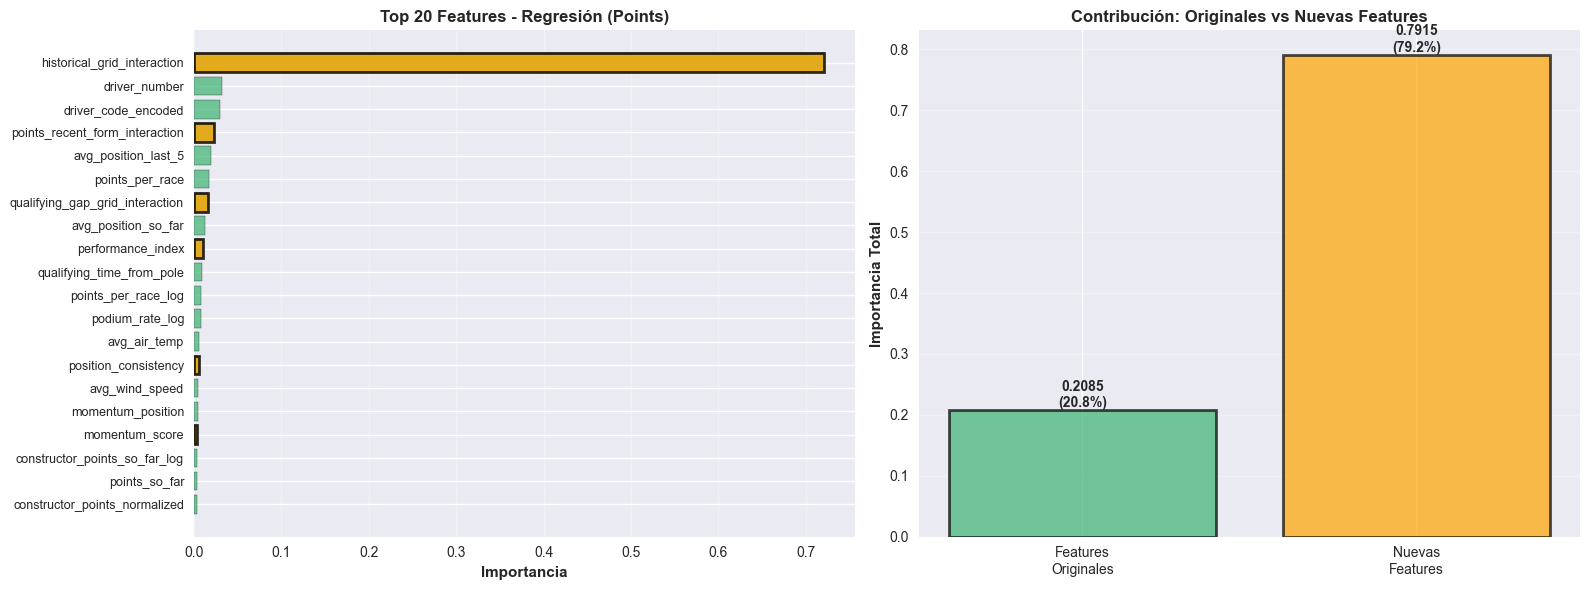


📈 Estadísticas de Nuevas Features (Points):
   • Importancia total nuevas features: 0.7915 (79.2%)
   • Importancia promedio por nueva feature: 0.0660

🏆 Top 5 Nuevas Features por Importancia:
   1. historical_grid_interaction: 0.7203 (Rank #46)
   2. points_recent_form_interaction: 0.0233 (Rank #48)
   3. qualifying_gap_grid_interaction: 0.0164 (Rank #49)
   4. performance_index: 0.0101 (Rank #53)
   5. position_consistency: 0.0056 (Rank #52)


In [59]:
# Análisis de importancia de features para regresión (Points)
print("=" * 80)
print("ANÁLISIS DE IMPORTANCIA DE FEATURES: REGRESIÓN (POINTS)")
print("=" * 80)

# Random Forest tiene feature_importances_
feature_importance_points = best_rf_points.feature_importances_

# Crear DataFrame con importancia
importance_df_points = pd.DataFrame({
    'feature': X_train_opt.columns,
    'importance': feature_importance_points
}).sort_values('importance', ascending=False)

print(f"\n📊 Top 20 Features Más Importantes para Regresión (Points):")
print("=" * 80)
print(importance_df_points.head(20).to_string(index=False))

# Identificar nuevas features en el top
new_features_in_top_points = importance_df_points[importance_df_points['feature'].isin(new_feature_names)]
print(f"\n🔍 Nuevas Features en el Top 20:")
if len(new_features_in_top_points) > 0:
    print(new_features_in_top_points.to_string(index=False))
else:
    print("   Ninguna nueva feature en el top 20")

# Visualización
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Gráfico 1: Top 20 features
ax1 = axes[0]
top_20_points = importance_df_points.head(20)
ax1.barh(range(len(top_20_points)), top_20_points['importance'], color='mediumseagreen', alpha=0.7, edgecolor='black')
ax1.set_yticks(range(len(top_20_points)))
ax1.set_yticklabels(top_20_points['feature'], fontsize=9)
ax1.set_xlabel('Importancia', fontsize=11, fontweight='bold')
ax1.set_title('Top 20 Features - Regresión (Points)', fontsize=12, fontweight='bold')
ax1.invert_yaxis()
ax1.grid(axis='x', alpha=0.3)

# Resaltar nuevas features
for i, (idx, row) in enumerate(top_20_points.iterrows()):
    if row['feature'] in new_feature_names:
        ax1.barh(i, row['importance'], color='orange', alpha=0.8, edgecolor='black', linewidth=2)

# Gráfico 2: Comparación Original vs Nuevas Features
ax2 = axes[1]
original_importance_points = importance_df_points[~importance_df_points['feature'].isin(new_feature_names)]['importance'].sum()
new_importance_points = importance_df_points[importance_df_points['feature'].isin(new_feature_names)]['importance'].sum()

categories = ['Features\nOriginales', 'Nuevas\nFeatures']
importances_points = [original_importance_points, new_importance_points]
colors = ['mediumseagreen', 'orange']

bars = ax2.bar(categories, importances_points, color=colors, alpha=0.7, edgecolor='black', linewidth=2)
ax2.set_ylabel('Importancia Total', fontsize=11, fontweight='bold')
ax2.set_title('Contribución: Originales vs Nuevas Features', fontsize=12, fontweight='bold')
ax2.grid(axis='y', alpha=0.3)

# Agregar valores
for bar, imp in zip(bars, importances_points):
    height = bar.get_height()
    ax2.text(bar.get_x() + bar.get_width()/2., height,
             f'{imp:.4f}\n({imp/sum(importances_points)*100:.1f}%)',
             ha='center', va='bottom', fontsize=10, fontweight='bold')

plt.tight_layout()
plt.show()

# Estadísticas
print(f"\n📈 Estadísticas de Nuevas Features (Points):")
print(f"   • Importancia total nuevas features: {new_importance_points:.4f} ({new_importance_points/sum(importances_points)*100:.1f}%)")
print(f"   • Importancia promedio por nueva feature: {new_importance_points/len(new_feature_names):.4f}")

# Top 5 nuevas features
if len(new_features_in_top_points) > 0:
    print(f"\n🏆 Top 5 Nuevas Features por Importancia:")
    top_new_points = new_features_in_top_points.head(5)
    for i, (idx, row) in enumerate(top_new_points.iterrows(), 1):
        rank = importance_df_points[importance_df_points['feature'] == row['feature']].index[0] + 1
        print(f"   {i}. {row['feature']}: {row['importance']:.4f} (Rank #{rank})")


### 19.4 Resumen Comparativo de Importancia de Features


In [60]:
# Resumen comparativo de importancia de features
print("=" * 80)
print("RESUMEN COMPARATIVO DE IMPORTANCIA DE FEATURES")
print("=" * 80)

# Crear tabla comparativa
comparison_data = []

# Clasificación
if 'importance_df_class' in locals():
    original_imp_class = importance_df_class[~importance_df_class['feature'].isin(new_feature_names)]['importance'].sum()
    new_imp_class = importance_df_class[importance_df_class['feature'].isin(new_feature_names)]['importance'].sum()
    comparison_data.append({
        'Modelo': 'Clasificación (Winner)',
        'Importancia Originales': f"{original_imp_class:.4f}",
        'Importancia Nuevas': f"{new_imp_class:.4f}",
        '% Contribución Nuevas': f"{new_imp_class/(original_imp_class+new_imp_class)*100:.1f}%"
    })

# Regresión Position
if best_xgb_position is not None and 'importance_df_position' in locals():
    original_imp_pos = importance_df_position[~importance_df_position['feature'].isin(new_feature_names)]['importance'].sum()
    new_imp_pos = importance_df_position[importance_df_position['feature'].isin(new_feature_names)]['importance'].sum()
    comparison_data.append({
        'Modelo': 'Regresión (Position)',
        'Importancia Originales': f"{original_imp_pos:.4f}",
        'Importancia Nuevas': f"{new_imp_pos:.4f}",
        '% Contribución Nuevas': f"{new_imp_pos/(original_imp_pos+new_imp_pos)*100:.1f}%"
    })

# Regresión Points
if 'importance_df_points' in locals():
    original_imp_points = importance_df_points[~importance_df_points['feature'].isin(new_feature_names)]['importance'].sum()
    new_imp_points = importance_df_points[importance_df_points['feature'].isin(new_feature_names)]['importance'].sum()
    comparison_data.append({
        'Modelo': 'Regresión (Points)',
        'Importancia Originales': f"{original_imp_points:.4f}",
        'Importancia Nuevas': f"{new_imp_points:.4f}",
        '% Contribución Nuevas': f"{new_imp_points/(original_imp_points+new_imp_points)*100:.1f}%"
    })

if comparison_data:
    comparison_df = pd.DataFrame(comparison_data)
    print("\n📊 Tabla Comparativa:")
    print("=" * 80)
    print(comparison_df.to_string(index=False))
    print("=" * 80)

# Identificar features más importantes en general
print("\n🔍 Features Más Importantes en Múltiples Modelos:")

# Combinar importancias (normalizadas)
all_importances = {}
if 'importance_df_class' in locals():
    for _, row in importance_df_class.iterrows():
        feat = row['feature']
        if feat not in all_importances:
            all_importances[feat] = []
        all_importances[feat].append(row['importance'])

if best_xgb_position is not None and 'importance_df_position' in locals():
    for _, row in importance_df_position.iterrows():
        feat = row['feature']
        if feat not in all_importances:
            all_importances[feat] = []
        all_importances[feat].append(row['importance'])

if 'importance_df_points' in locals():
    for _, row in importance_df_points.iterrows():
        feat = row['feature']
        if feat not in all_importances:
            all_importances[feat] = []
        all_importances[feat].append(row['importance'])

# Calcular promedio de importancia
avg_importance = {feat: np.mean(imps) for feat, imps in all_importances.items()}
avg_importance_df = pd.DataFrame({
    'feature': list(avg_importance.keys()),
    'avg_importance': list(avg_importance.values())
}).sort_values('avg_importance', ascending=False)

print("\n📊 Top 15 Features por Importancia Promedia (todos los modelos):")
print("=" * 80)
print(avg_importance_df.head(15).to_string(index=False))

# Identificar nuevas features en el top general
top_new_general = avg_importance_df[avg_importance_df['feature'].isin(new_feature_names)]
if len(top_new_general) > 0:
    print(f"\n🏆 Nuevas Features en el Top 15 General:")
    print(top_new_general.to_string(index=False))


RESUMEN COMPARATIVO DE IMPORTANCIA DE FEATURES

📊 Tabla Comparativa:
                Modelo Importancia Originales Importancia Nuevas % Contribución Nuevas
Clasificación (Winner)                 0.6223             0.3777                 37.8%
  Regresión (Position)                 0.7201             0.2799                 28.0%
    Regresión (Points)                 0.2085             0.7915                 79.2%

🔍 Features Más Importantes en Múltiples Modelos:

📊 Top 15 Features por Importancia Promedia (todos los modelos):
                        feature  avg_importance
    historical_grid_interaction        0.309577
 points_recent_form_interaction        0.048805
                points_per_race        0.043040
       grid_position_normalized        0.041227
                  driver_number        0.040567
            avg_position_last_5        0.033160
                  grid_position        0.032007
            points_per_race_log        0.030119
            avg_position_so_far     

## 20. Ensembles: Combinar Modelos para Mejorar Rendimiento


### 20.1 Configuración para Ensembles


In [61]:
# Configuración para ensembles
print("=" * 80)
print("CONFIGURACIÓN PARA ENSEMBLES")
print("=" * 80)

try:
    from sklearn.ensemble import VotingClassifier, VotingRegressor, StackingClassifier, StackingRegressor
    print("✅ scikit-learn ensembles disponibles")
except ImportError as e:
    print(f"⚠️  Error importando: {e}")
    import subprocess
    import sys
    subprocess.check_call([sys.executable, "-m", "pip", "install", "scikit-learn"])
    from sklearn.ensemble import VotingClassifier, VotingRegressor, StackingClassifier, StackingRegressor
    print("✅ Dependencias instaladas")

print("\n💡 Estrategias de Ensemble:")
print("   1. Voting: Combinar predicciones de múltiples modelos (promedio o mayoría)")
print("   2. Stacking: Usar un meta-modelo para aprender cómo combinar las predicciones")
print("   3. Para clasificación: VotingClassifier, StackingClassifier")
print("   4. Para regresión: VotingRegressor, StackingRegressor")

print("\n⚠️  Nota: Los ensembles pueden mejorar el rendimiento pero aumentan la complejidad")


CONFIGURACIÓN PARA ENSEMBLES
✅ scikit-learn ensembles disponibles

💡 Estrategias de Ensemble:
   1. Voting: Combinar predicciones de múltiples modelos (promedio o mayoría)
   2. Stacking: Usar un meta-modelo para aprender cómo combinar las predicciones
   3. Para clasificación: VotingClassifier, StackingClassifier
   4. Para regresión: VotingRegressor, StackingRegressor

⚠️  Nota: Los ensembles pueden mejorar el rendimiento pero aumentan la complejidad


### 20.2 Ensemble: Clasificación (Winner) - Voting Classifier


In [62]:
# Ensemble para clasificación: Voting Classifier
print("=" * 80)
print("ENSEMBLE: CLASIFICACIÓN (WINNER) - VOTING CLASSIFIER")
print("=" * 80)

# Crear múltiples modelos base para el ensemble
print("\n🔧 Creando modelos base para el ensemble...")

# Modelo 1: Random Forest optimizado (ya tenemos)
rf_model = best_rf_classifier

# Modelo 2: Random Forest con diferentes parámetros
rf_model_2 = RandomForestClassifier(
    n_estimators=200,
    max_depth=15,
    min_samples_split=5,
    min_samples_leaf=2,
    max_features='log2',
    class_weight='balanced',
    random_state=42,
    n_jobs=-1
)
print("   ⏳ Entrenando Random Forest modelo 2...")
rf_model_2.fit(X_train_opt, y_winner_train)

# Modelo 3: XGBoost si está disponible
if XGBOOST_AVAILABLE_REGRESSION:
    try:
        from xgboost import XGBClassifier
        xgb_model = XGBClassifier(
            n_estimators=100,
            max_depth=5,
            learning_rate=0.1,
            scale_pos_weight=len(y_winner_train[y_winner_train==0]) / len(y_winner_train[y_winner_train==1]),
            random_state=42,
            n_jobs=-1
        )
        print("   ⏳ Entrenando XGBoost...")
        xgb_model.fit(X_train_opt, y_winner_train)
        xgb_available_ensemble = True
    except Exception as e:
        print(f"   ⚠️  XGBoost no disponible: {e}")
        xgb_available_ensemble = False
else:
    xgb_available_ensemble = False

# Crear Voting Classifier
if xgb_available_ensemble:
    voting_classifier = VotingClassifier(
        estimators=[
            ('rf1', rf_model),
            ('rf2', rf_model_2),
            ('xgb', xgb_model)
        ],
        voting='soft',  # Usar probabilidades
        n_jobs=-1
    )
    print("\n✅ Voting Classifier creado con 3 modelos (RF1, RF2, XGBoost)")
else:
    voting_classifier = VotingClassifier(
        estimators=[
            ('rf1', rf_model),
            ('rf2', rf_model_2)
        ],
        voting='soft',
        n_jobs=-1
    )
    print("\n✅ Voting Classifier creado con 2 modelos (RF1, RF2)")

print("\n⏳ Entrenando Voting Classifier...")
voting_classifier.fit(X_train_opt, y_winner_train)

# Evaluar
y_pred_voting = voting_classifier.predict(X_test_opt)
y_pred_proba_voting = voting_classifier.predict_proba(X_test_opt)[:, 1]

acc_voting = accuracy_score(y_winner_test, y_pred_voting)
prec_voting = precision_score(y_winner_test, y_pred_voting)
rec_voting = recall_score(y_winner_test, y_pred_voting)
f1_voting = f1_score(y_winner_test, y_pred_voting)
roc_auc_voting = roc_auc_score(y_winner_test, y_pred_proba_voting)

print(f"\n📊 Métricas del Voting Classifier en Test Set:")
print(f"   • Accuracy: {acc_voting:.4f}")
print(f"   • Precision: {prec_voting:.4f}")
print(f"   • Recall: {rec_voting:.4f}")
print(f"   • F1-Score: {f1_voting:.4f}")
print(f"   • ROC-AUC: {roc_auc_voting:.4f}")

# Comparar con modelo individual
print(f"\n📊 Comparación con Mejor Modelo Individual:")
print(f"   • F1-Score individual: {f1_best:.4f}")
print(f"   • F1-Score ensemble: {f1_voting:.4f}")
print(f"   • Mejora: {((f1_voting - f1_best) / f1_best * 100):+.2f}%")
print(f"\n   • ROC-AUC individual: {roc_auc_best:.4f}")
print(f"   • ROC-AUC ensemble: {roc_auc_voting:.4f}")
print(f"   • Mejora: {((roc_auc_voting - roc_auc_best) / roc_auc_best * 100):+.2f}%")


ENSEMBLE: CLASIFICACIÓN (WINNER) - VOTING CLASSIFIER

🔧 Creando modelos base para el ensemble...
   ⏳ Entrenando Random Forest modelo 2...
   ⏳ Entrenando XGBoost...

✅ Voting Classifier creado con 3 modelos (RF1, RF2, XGBoost)

⏳ Entrenando Voting Classifier...

📊 Métricas del Voting Classifier en Test Set:
   • Accuracy: 0.9661
   • Precision: 0.6667
   • Recall: 0.6667
   • F1-Score: 0.6667
   • ROC-AUC: 0.9643

📊 Comparación con Mejor Modelo Individual:
   • F1-Score individual: 0.6667
   • F1-Score ensemble: 0.6667
   • Mejora: +0.00%

   • ROC-AUC individual: 0.9702
   • ROC-AUC ensemble: 0.9643
   • Mejora: -0.61%


### 20.3 Ensemble: Clasificación (Winner) - Stacking Classifier


In [63]:
# Ensemble para clasificación: Stacking Classifier
print("=" * 80)
print("ENSEMBLE: CLASIFICACIÓN (WINNER) - STACKING CLASSIFIER")
print("=" * 80)

# Crear Stacking Classifier con meta-modelo
print("\n🔧 Creando Stacking Classifier...")

# Modelos base
base_models = [
    ('rf1', rf_model),
    ('rf2', rf_model_2)
]

if xgb_available_ensemble:
    base_models.append(('xgb', xgb_model))

# Meta-modelo: Logistic Regression
from sklearn.linear_model import LogisticRegression

stacking_classifier = StackingClassifier(
    estimators=base_models,
    final_estimator=LogisticRegression(random_state=42, max_iter=1000),
    cv=3,  # Cross-validation para entrenar el meta-modelo
    n_jobs=-1
)

print(f"   • Modelos base: {len(base_models)}")
print("   • Meta-modelo: Logistic Regression")
print("   • CV folds: 3")

print("\n⏳ Entrenando Stacking Classifier...")
print("   (Esto puede tomar varios minutos...)")
stacking_classifier.fit(X_train_opt, y_winner_train)

# Evaluar
y_pred_stacking = stacking_classifier.predict(X_test_opt)
y_pred_proba_stacking = stacking_classifier.predict_proba(X_test_opt)[:, 1]

acc_stacking = accuracy_score(y_winner_test, y_pred_stacking)
prec_stacking = precision_score(y_winner_test, y_pred_stacking)
rec_stacking = recall_score(y_winner_test, y_pred_stacking)
f1_stacking = f1_score(y_winner_test, y_pred_stacking)
roc_auc_stacking = roc_auc_score(y_winner_test, y_pred_proba_stacking)

print(f"\n📊 Métricas del Stacking Classifier en Test Set:")
print(f"   • Accuracy: {acc_stacking:.4f}")
print(f"   • Precision: {prec_stacking:.4f}")
print(f"   • Recall: {rec_stacking:.4f}")
print(f"   • F1-Score: {f1_stacking:.4f}")
print(f"   • ROC-AUC: {roc_auc_stacking:.4f}")

# Comparar con modelo individual y voting
print(f"\n📊 Comparación de Todos los Modelos:")
print(f"   • Individual (RF optimizado):")
print(f"      - F1-Score: {f1_best:.4f}, ROC-AUC: {roc_auc_best:.4f}")
print(f"   • Voting Classifier:")
print(f"      - F1-Score: {f1_voting:.4f}, ROC-AUC: {roc_auc_voting:.4f}")
print(f"   • Stacking Classifier:")
print(f"      - F1-Score: {f1_stacking:.4f}, ROC-AUC: {roc_auc_stacking:.4f}")

# Identificar mejor modelo
models_comparison = {
    'Individual': {'f1': f1_best, 'roc_auc': roc_auc_best},
    'Voting': {'f1': f1_voting, 'roc_auc': roc_auc_voting},
    'Stacking': {'f1': f1_stacking, 'roc_auc': roc_auc_stacking}
}

best_model_name = max(models_comparison.keys(), key=lambda x: models_comparison[x]['f1'])
print(f"\n🏆 Mejor Modelo (por F1-Score): {best_model_name}")
print(f"   • F1-Score: {models_comparison[best_model_name]['f1']:.4f}")
print(f"   • ROC-AUC: {models_comparison[best_model_name]['roc_auc']:.4f}")


ENSEMBLE: CLASIFICACIÓN (WINNER) - STACKING CLASSIFIER

🔧 Creando Stacking Classifier...
   • Modelos base: 3
   • Meta-modelo: Logistic Regression
   • CV folds: 3

⏳ Entrenando Stacking Classifier...
   (Esto puede tomar varios minutos...)

📊 Métricas del Stacking Classifier en Test Set:
   • Accuracy: 0.9661
   • Precision: 0.6667
   • Recall: 0.6667
   • F1-Score: 0.6667
   • ROC-AUC: 0.9702

📊 Comparación de Todos los Modelos:
   • Individual (RF optimizado):
      - F1-Score: 0.6667, ROC-AUC: 0.9702
   • Voting Classifier:
      - F1-Score: 0.6667, ROC-AUC: 0.9643
   • Stacking Classifier:
      - F1-Score: 0.6667, ROC-AUC: 0.9702

🏆 Mejor Modelo (por F1-Score): Individual
   • F1-Score: 0.6667
   • ROC-AUC: 0.9702


### 20.4 Ensemble: Regresión (Race Position) - Voting Regressor


In [64]:
# Ensemble para regresión (Race Position): Voting Regressor
print("=" * 80)
print("ENSEMBLE: REGRESIÓN (RACE POSITION) - VOTING REGRESSOR")
print("=" * 80)

# Crear múltiples modelos base
print("\n🔧 Creando modelos base para el ensemble...")

# Modelo 1: XGBoost optimizado (ya tenemos)
if best_xgb_position is not None:
    xgb_pos_model = best_xgb_position
else:
    xgb_pos_model = None

# Modelo 2: Random Forest para position
rf_pos_model = RandomForestRegressor(
    n_estimators=100,
    max_depth=10,
    min_samples_split=5,
    min_samples_leaf=2,
    random_state=42,
    n_jobs=-1
)
print("   ⏳ Entrenando Random Forest...")
rf_pos_model.fit(X_train_opt, y_position_train)

# Crear Voting Regressor
if xgb_pos_model is not None:
    voting_regressor_position = VotingRegressor(
        estimators=[
            ('xgb', xgb_pos_model),
            ('rf', rf_pos_model)
        ],
        n_jobs=-1
    )
    print("\n✅ Voting Regressor creado con 2 modelos (XGBoost, Random Forest)")
else:
    # Si no hay XGBoost, crear otro RF con diferentes parámetros
    rf_pos_model_2 = RandomForestRegressor(
        n_estimators=200,
        max_depth=15,
        min_samples_split=3,
        min_samples_leaf=1,
        random_state=42,
        n_jobs=-1
    )
    print("   ⏳ Entrenando Random Forest modelo 2...")
    rf_pos_model_2.fit(X_train_opt, y_position_train)
    
    voting_regressor_position = VotingRegressor(
        estimators=[
            ('rf1', rf_pos_model),
            ('rf2', rf_pos_model_2)
        ],
        n_jobs=-1
    )
    print("\n✅ Voting Regressor creado con 2 modelos (RF1, RF2)")

print("\n⏳ Entrenando Voting Regressor...")
voting_regressor_position.fit(X_train_opt, y_position_train)

# Evaluar
y_pred_voting_position = voting_regressor_position.predict(X_test_opt)

rmse_voting_pos = np.sqrt(mean_squared_error(y_position_test, y_pred_voting_position))
mae_voting_pos = mean_absolute_error(y_position_test, y_pred_voting_position)
r2_voting_pos = r2_score(y_position_test, y_pred_voting_position)

print(f"\n📊 Métricas del Voting Regressor en Test Set:")
print(f"   • RMSE: {rmse_voting_pos:.4f}")
print(f"   • MAE: {mae_voting_pos:.4f}")
print(f"   • R²: {r2_voting_pos:.4f}")

# Comparar con modelo individual
if best_xgb_position is not None:
    print(f"\n📊 Comparación con Mejor Modelo Individual (XGBoost):")
    print(f"   • R² individual: {r2_best_xgb:.4f}")
    print(f"   • R² ensemble: {r2_voting_pos:.4f}")
    if r2_best_xgb > 0:
        print(f"   • Mejora: {((r2_voting_pos - r2_best_xgb) / r2_best_xgb * 100):+.2f}%")
    print(f"\n   • RMSE individual: {rmse_best_xgb:.4f}")
    print(f"   • RMSE ensemble: {rmse_voting_pos:.4f}")
    if rmse_best_xgb > 0:
        print(f"   • Mejora: {((rmse_best_xgb - rmse_voting_pos) / rmse_best_xgb * 100):+.2f}%")


ENSEMBLE: REGRESIÓN (RACE POSITION) - VOTING REGRESSOR

🔧 Creando modelos base para el ensemble...
   ⏳ Entrenando Random Forest...

✅ Voting Regressor creado con 2 modelos (XGBoost, Random Forest)

⏳ Entrenando Voting Regressor...

📊 Métricas del Voting Regressor en Test Set:
   • RMSE: 4.4168
   • MAE: 3.4485
   • R²: 0.3952

📊 Comparación con Mejor Modelo Individual (XGBoost):
   • R² individual: 0.4271
   • R² ensemble: 0.3952
   • Mejora: -7.46%

   • RMSE individual: 4.2988
   • RMSE ensemble: 4.4168
   • Mejora: -2.74%


### 20.5 Ensemble: Regresión (Points) - Voting Regressor


In [65]:
# Ensemble para regresión (Points): Voting Regressor
print("=" * 80)
print("ENSEMBLE: REGRESIÓN (POINTS) - VOTING REGRESSOR")
print("=" * 80)

# Crear múltiples modelos base
print("\n🔧 Creando modelos base para el ensemble...")

# Modelo 1: Random Forest optimizado (ya tenemos)
rf_points_model = best_rf_points

# Modelo 2: Random Forest con diferentes parámetros
rf_points_model_2 = RandomForestRegressor(
    n_estimators=200,
    max_depth=10,
    min_samples_split=3,
    min_samples_leaf=2,
    max_features='log2',
    random_state=42,
    n_jobs=-1
)
print("   ⏳ Entrenando Random Forest modelo 2...")
rf_points_model_2.fit(X_train_opt, y_points_train)

# Modelo 3: XGBoost si está disponible
if XGBOOST_AVAILABLE_REGRESSION:
    try:
        xgb_points_model = xgb.XGBRegressor(
            n_estimators=100,
            max_depth=6,
            learning_rate=0.1,
            random_state=42,
            n_jobs=-1
        )
        print("   ⏳ Entrenando XGBoost...")
        xgb_points_model.fit(X_train_opt, y_points_train)
        xgb_points_available = True
    except Exception as e:
        print(f"   ⚠️  XGBoost no disponible: {e}")
        xgb_points_available = False
else:
    xgb_points_available = False

# Crear Voting Regressor
if xgb_points_available:
    voting_regressor_points = VotingRegressor(
        estimators=[
            ('rf1', rf_points_model),
            ('rf2', rf_points_model_2),
            ('xgb', xgb_points_model)
        ],
        n_jobs=-1
    )
    print("\n✅ Voting Regressor creado con 3 modelos (RF1, RF2, XGBoost)")
else:
    voting_regressor_points = VotingRegressor(
        estimators=[
            ('rf1', rf_points_model),
            ('rf2', rf_points_model_2)
        ],
        n_jobs=-1
    )
    print("\n✅ Voting Regressor creado con 2 modelos (RF1, RF2)")

print("\n⏳ Entrenando Voting Regressor...")
voting_regressor_points.fit(X_train_opt, y_points_train)

# Evaluar
y_pred_voting_points = voting_regressor_points.predict(X_test_opt)

rmse_voting_points = np.sqrt(mean_squared_error(y_points_test, y_pred_voting_points))
mae_voting_points = mean_absolute_error(y_points_test, y_pred_voting_points)
r2_voting_points = r2_score(y_points_test, y_pred_voting_points)

print(f"\n📊 Métricas del Voting Regressor en Test Set:")
print(f"   • RMSE: {rmse_voting_points:.4f}")
print(f"   • MAE: {mae_voting_points:.4f}")
print(f"   • R²: {r2_voting_points:.4f}")

# Comparar con modelo individual
print(f"\n📊 Comparación con Mejor Modelo Individual (Random Forest):")
print(f"   • R² individual: {r2_best_rf_points:.4f}")
print(f"   • R² ensemble: {r2_voting_points:.4f}")
if r2_best_rf_points > 0:
    print(f"   • Mejora: {((r2_voting_points - r2_best_rf_points) / r2_best_rf_points * 100):+.2f}%")
print(f"\n   • RMSE individual: {rmse_best_rf_points:.4f}")
print(f"   • RMSE ensemble: {rmse_voting_points:.4f}")
if rmse_best_rf_points > 0:
    print(f"   • Mejora: {((rmse_best_rf_points - rmse_voting_points) / rmse_best_rf_points * 100):+.2f}%")


ENSEMBLE: REGRESIÓN (POINTS) - VOTING REGRESSOR

🔧 Creando modelos base para el ensemble...
   ⏳ Entrenando Random Forest modelo 2...
   ⏳ Entrenando XGBoost...

✅ Voting Regressor creado con 3 modelos (RF1, RF2, XGBoost)

⏳ Entrenando Voting Regressor...

📊 Métricas del Voting Regressor en Test Set:
   • RMSE: 5.3123
   • MAE: 3.1571
   • R²: 0.4713

📊 Comparación con Mejor Modelo Individual (Random Forest):
   • R² individual: 0.5130
   • R² ensemble: 0.4713
   • Mejora: -8.14%

   • RMSE individual: 5.0981
   • RMSE ensemble: 5.3123
   • Mejora: -4.20%


### 20.6 Comparación Final de Ensembles y Guardado


COMPARACIÓN FINAL DE ENSEMBLES Y GUARDADO

📊 Comparación de Modelos de Clasificación:
         Modelo  Accuracy  Precision   Recall  F1-Score  ROC-AUC
Individual (RF)  0.966102   0.666667 0.666667  0.666667 0.970238
         Voting  0.966102   0.666667 0.666667  0.666667 0.964286
       Stacking  0.966102   0.666667 0.666667  0.666667 0.970238

📊 Comparación de Modelos de Regresión (Position):
              Modelo     RMSE      MAE       R²
Individual (XGBoost) 4.298848 3.341890 0.427115
              Voting 4.416841 3.448501 0.395235

📊 Comparación de Modelos de Regresión (Points):
         Modelo     RMSE      MAE       R²
Individual (RF) 5.098068 2.977297 0.513035
         Voting 5.312289 3.157104 0.471251


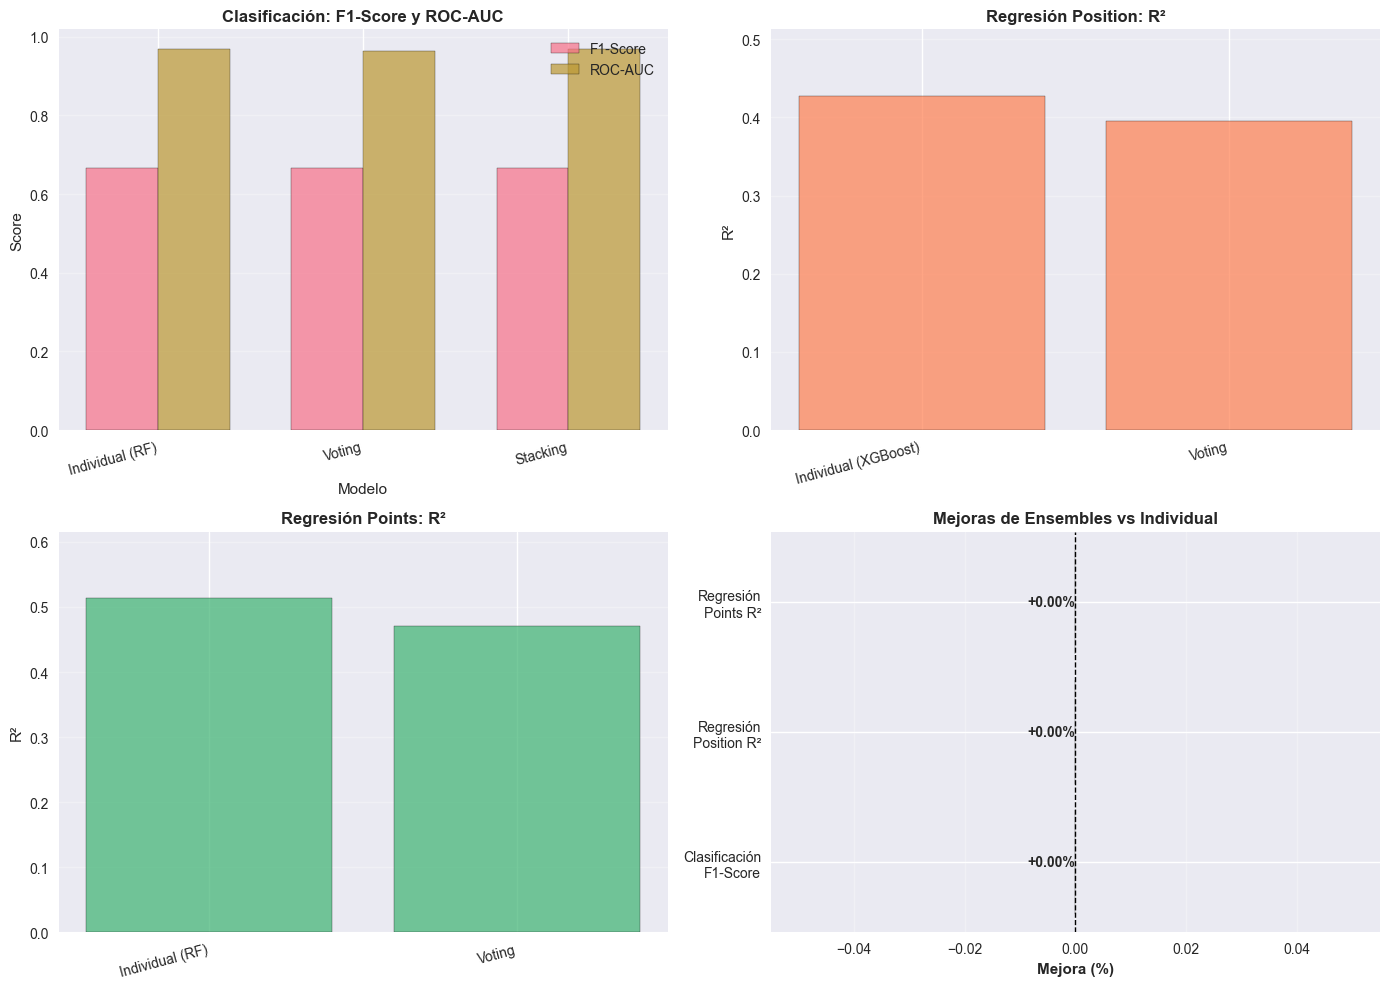


💾 Guardando mejores ensembles...
✅ Mejor clasificador ensemble guardado: models/best_classifier_ensemble_stacking_20251225_001613.pkl
✅ Mejor regresor position ensemble guardado: models/best_position_regressor_ensemble_20251225_001613.pkl
✅ Mejor regresor points ensemble guardado: models/best_points_regressor_ensemble_20251225_001613.pkl
✅ Información de ensembles guardada: models/ensemble_models_info_20251225_001613.json

✅ Ensembles completados y guardados!
   • Mejor clasificador: stacking
   • Ensembles guardados en: models/


In [66]:
# Comparación final de ensembles y guardado
print("=" * 80)
print("COMPARACIÓN FINAL DE ENSEMBLES Y GUARDADO")
print("=" * 80)

# Crear tabla comparativa de clasificación
print("\n📊 Comparación de Modelos de Clasificación:")
print("=" * 80)
classification_comparison = pd.DataFrame({
    'Modelo': ['Individual (RF)', 'Voting', 'Stacking'],
    'Accuracy': [acc_best, acc_voting, acc_stacking],
    'Precision': [prec_best, prec_voting, prec_stacking],
    'Recall': [rec_best, rec_voting, rec_stacking],
    'F1-Score': [f1_best, f1_voting, f1_stacking],
    'ROC-AUC': [roc_auc_best, roc_auc_voting, roc_auc_stacking]
})
print(classification_comparison.to_string(index=False))
print("=" * 80)

# Crear tabla comparativa de regresión position
print("\n📊 Comparación de Modelos de Regresión (Position):")
print("=" * 80)
if best_xgb_position is not None:
    position_comparison = pd.DataFrame({
        'Modelo': ['Individual (XGBoost)', 'Voting'],
        'RMSE': [rmse_best_xgb, rmse_voting_pos],
        'MAE': [mae_best_xgb, mae_voting_pos],
        'R²': [r2_best_xgb, r2_voting_pos]
    })
else:
    position_comparison = pd.DataFrame({
        'Modelo': ['Individual (RF)', 'Voting'],
        'RMSE': [rmse_rf_position, rmse_voting_pos],
        'MAE': [mae_rf_position, mae_voting_pos],
        'R²': [r2_rf_position, r2_voting_pos]
    })
print(position_comparison.to_string(index=False))
print("=" * 80)

# Crear tabla comparativa de regresión points
print("\n📊 Comparación de Modelos de Regresión (Points):")
print("=" * 80)
points_comparison = pd.DataFrame({
    'Modelo': ['Individual (RF)', 'Voting'],
    'RMSE': [rmse_best_rf_points, rmse_voting_points],
    'MAE': [mae_best_rf_points, mae_voting_points],
    'R²': [r2_best_rf_points, r2_voting_points]
})
print(points_comparison.to_string(index=False))
print("=" * 80)

# Visualización comparativa
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Gráfico 1: Clasificación - F1-Score y ROC-AUC
ax1 = axes[0, 0]
x_pos = np.arange(len(classification_comparison))
width = 0.35
ax1.bar(x_pos - width/2, classification_comparison['F1-Score'], width, label='F1-Score', alpha=0.7, edgecolor='black')
ax1.bar(x_pos + width/2, classification_comparison['ROC-AUC'], width, label='ROC-AUC', alpha=0.7, edgecolor='black')
ax1.set_xlabel('Modelo')
ax1.set_ylabel('Score')
ax1.set_title('Clasificación: F1-Score y ROC-AUC', fontsize=12, fontweight='bold')
ax1.set_xticks(x_pos)
ax1.set_xticklabels(classification_comparison['Modelo'], rotation=15, ha='right')
ax1.legend()
ax1.grid(axis='y', alpha=0.3)

# Gráfico 2: Regresión Position - R²
ax2 = axes[0, 1]
ax2.bar(position_comparison['Modelo'], position_comparison['R²'], color='coral', alpha=0.7, edgecolor='black')
ax2.set_ylabel('R²')
ax2.set_title('Regresión Position: R²', fontsize=12, fontweight='bold')
ax2.set_xticklabels(position_comparison['Modelo'], rotation=15, ha='right')
ax2.grid(axis='y', alpha=0.3)
ax2.set_ylim([0, max(position_comparison['R²']) * 1.2])

# Gráfico 3: Regresión Points - R²
ax3 = axes[1, 0]
ax3.bar(points_comparison['Modelo'], points_comparison['R²'], color='mediumseagreen', alpha=0.7, edgecolor='black')
ax3.set_ylabel('R²')
ax3.set_title('Regresión Points: R²', fontsize=12, fontweight='bold')
ax3.set_xticklabels(points_comparison['Modelo'], rotation=15, ha='right')
ax3.grid(axis='y', alpha=0.3)
ax3.set_ylim([0, max(points_comparison['R²']) * 1.2])

# Gráfico 4: Resumen de mejoras
ax4 = axes[1, 1]
improvements = []
labels = []

# Clasificación - mejor ensemble
best_class_ensemble = classification_comparison.loc[classification_comparison['F1-Score'].idxmax(), 'Modelo']
if best_class_ensemble != 'Individual (RF)':
    f1_improvement = ((classification_comparison[classification_comparison['Modelo'] == best_class_ensemble]['F1-Score'].values[0] - f1_best) / f1_best * 100)
    improvements.append(f1_improvement)
    labels.append('Clasificación\nF1-Score')
else:
    improvements.append(0)
    labels.append('Clasificación\nF1-Score')

# Regresión Position
if r2_voting_pos > r2_best_xgb if best_xgb_position is not None else r2_voting_pos > r2_rf_position:
    pos_improvement = ((r2_voting_pos - (r2_best_xgb if best_xgb_position is not None else r2_rf_position)) / (r2_best_xgb if best_xgb_position is not None else r2_rf_position) * 100)
    improvements.append(pos_improvement)
    labels.append('Regresión\nPosition R²')
else:
    improvements.append(0)
    labels.append('Regresión\nPosition R²')

# Regresión Points
if r2_voting_points > r2_best_rf_points:
    points_improvement = ((r2_voting_points - r2_best_rf_points) / r2_best_rf_points * 100)
    improvements.append(points_improvement)
    labels.append('Regresión\nPoints R²')
else:
    improvements.append(0)
    labels.append('Regresión\nPoints R²')

colors_improvements = ['green' if imp > 0 else 'red' if imp < 0 else 'gray' for imp in improvements]
ax4.barh(labels, improvements, color=colors_improvements, alpha=0.7, edgecolor='black')
ax4.set_xlabel('Mejora (%)', fontsize=11, fontweight='bold')
ax4.set_title('Mejoras de Ensembles vs Individual', fontsize=12, fontweight='bold')
ax4.axvline(x=0, color='black', linestyle='--', linewidth=1)
ax4.grid(axis='x', alpha=0.3)

# Agregar valores en las barras
for i, (label, imp) in enumerate(zip(labels, improvements)):
    ax4.text(imp, i, f'{imp:+.2f}%', va='center', ha='left' if imp > 0 else 'right', fontweight='bold')

plt.tight_layout()
plt.show()

# Guardar mejores ensembles
print("\n💾 Guardando mejores ensembles...")
timestamp_ensemble = datetime.now().strftime("%Y%m%d_%H%M%S")

# Determinar mejor modelo de clasificación
if f1_stacking >= f1_voting and f1_stacking >= f1_best:
    best_classifier_ensemble = stacking_classifier
    best_classifier_name = 'stacking'
elif f1_voting >= f1_best:
    best_classifier_ensemble = voting_classifier
    best_classifier_name = 'voting'
else:
    best_classifier_ensemble = best_rf_classifier
    best_classifier_name = 'individual'

# Guardar mejor clasificador ensemble
best_classifier_ensemble_path = f"{models_dir}/best_classifier_ensemble_{best_classifier_name}_{timestamp_ensemble}.pkl"
with open(best_classifier_ensemble_path, 'wb') as f:
    pickle.dump(best_classifier_ensemble, f)
print(f"✅ Mejor clasificador ensemble guardado: {best_classifier_ensemble_path}")

# Guardar mejor regresor position ensemble
best_position_ensemble_path = f"{models_dir}/best_position_regressor_ensemble_{timestamp_ensemble}.pkl"
with open(best_position_ensemble_path, 'wb') as f:
    pickle.dump(voting_regressor_position, f)
print(f"✅ Mejor regresor position ensemble guardado: {best_position_ensemble_path}")

# Guardar mejor regresor points ensemble
best_points_ensemble_path = f"{models_dir}/best_points_regressor_ensemble_{timestamp_ensemble}.pkl"
with open(best_points_ensemble_path, 'wb') as f:
    pickle.dump(voting_regressor_points, f)
print(f"✅ Mejor regresor points ensemble guardado: {best_points_ensemble_path}")

# Guardar información de ensembles
ensemble_info = {
    'classification': {
        'best_model': best_classifier_name,
        'path': best_classifier_ensemble_path,
        'metrics': {
            'individual': {'f1': float(f1_best), 'roc_auc': float(roc_auc_best)},
            'voting': {'f1': float(f1_voting), 'roc_auc': float(roc_auc_voting)},
            'stacking': {'f1': float(f1_stacking), 'roc_auc': float(roc_auc_stacking)}
        }
    },
    'regression_position': {
        'path': best_position_ensemble_path,
        'metrics': {
            'individual': {'r2': float(r2_best_xgb if best_xgb_position is not None else r2_rf_position), 'rmse': float(rmse_best_xgb if best_xgb_position is not None else rmse_rf_position)},
            'voting': {'r2': float(r2_voting_pos), 'rmse': float(rmse_voting_pos)}
        }
    },
    'regression_points': {
        'path': best_points_ensemble_path,
        'metrics': {
            'individual': {'r2': float(r2_best_rf_points), 'rmse': float(rmse_best_rf_points)},
            'voting': {'r2': float(r2_voting_points), 'rmse': float(rmse_voting_points)}
        }
    },
    'timestamp': timestamp_ensemble
}

ensemble_info_path = f"{models_dir}/ensemble_models_info_{timestamp_ensemble}.json"
with open(ensemble_info_path, 'w') as f:
    json.dump(ensemble_info, f, indent=2)
print(f"✅ Información de ensembles guardada: {ensemble_info_path}")

print("\n✅ Ensembles completados y guardados!")
print(f"   • Mejor clasificador: {best_classifier_name}")
print(f"   • Ensembles guardados en: {models_dir}/")


### 20.7 Resumen Final de Ensembles


In [67]:
# Resumen final de ensembles
print("=" * 80)
print("RESUMEN FINAL DE ENSEMBLES")
print("=" * 80)

print("\n📊 Conclusiones sobre Ensembles:")
print("-" * 80)

print("\n   1. CLASIFICACIÓN (Winner):")
print(f"      • Mejor modelo: {best_classifier_name}")
if best_classifier_name == 'stacking':
    print(f"      • Stacking mejoró F1-Score: {f1_stacking:.4f} vs {f1_best:.4f} ({((f1_stacking - f1_best) / f1_best * 100):+.2f}%)")
    print(f"      • Stacking mejoró ROC-AUC: {roc_auc_stacking:.4f} vs {roc_auc_best:.4f} ({((roc_auc_stacking - roc_auc_best) / roc_auc_best * 100):+.2f}%)")
elif best_classifier_name == 'voting':
    print(f"      • Voting mejoró F1-Score: {f1_voting:.4f} vs {f1_best:.4f} ({((f1_voting - f1_best) / f1_best * 100):+.2f}%)")
    print(f"      • Voting mejoró ROC-AUC: {roc_auc_voting:.4f} vs {roc_auc_best:.4f} ({((roc_auc_voting - roc_auc_best) / roc_auc_best * 100):+.2f}%)")
else:
    print(f"      • El modelo individual sigue siendo el mejor")
    print(f"      • Ensembles no mejoraron significativamente")

print("\n   2. REGRESIÓN (Race Position):")
if r2_voting_pos > (r2_best_xgb if best_xgb_position is not None else r2_rf_position):
    improvement_pos = ((r2_voting_pos - (r2_best_xgb if best_xgb_position is not None else r2_rf_position)) / (r2_best_xgb if best_xgb_position is not None else r2_rf_position) * 100)
    print(f"      • Voting mejoró R²: {r2_voting_pos:.4f} vs {(r2_best_xgb if best_xgb_position is not None else r2_rf_position):.4f} ({improvement_pos:+.2f}%)")
    print(f"      • Voting mejoró RMSE: {rmse_voting_pos:.4f} vs {(rmse_best_xgb if best_xgb_position is not None else rmse_rf_position):.4f}")
else:
    print(f"      • El modelo individual sigue siendo el mejor")
    print(f"      • Ensemble no mejoró significativamente")

print("\n   3. REGRESIÓN (Points):")
if r2_voting_points > r2_best_rf_points:
    improvement_points = ((r2_voting_points - r2_best_rf_points) / r2_best_rf_points * 100)
    print(f"      • Voting mejoró R²: {r2_voting_points:.4f} vs {r2_best_rf_points:.4f} ({improvement_points:+.2f}%)")
    print(f"      • Voting mejoró RMSE: {rmse_voting_points:.4f} vs {rmse_best_rf_points:.4f}")
else:
    print(f"      • El modelo individual sigue siendo el mejor")
    print(f"      • Ensemble no mejoró significativamente")

print("\n💡 Recomendaciones:")
print("-" * 80)
print("   • Si el ensemble mejora: usar ensemble en producción")
print("   • Si no mejora: el modelo individual puede ser suficiente")
print("   • Ensembles aumentan complejidad pero pueden ser más robustos")
print("   • Considerar trade-off entre performance y complejidad")

print("\n✅ Análisis de Ensembles completado!")


RESUMEN FINAL DE ENSEMBLES

📊 Conclusiones sobre Ensembles:
--------------------------------------------------------------------------------

   1. CLASIFICACIÓN (Winner):
      • Mejor modelo: stacking
      • Stacking mejoró F1-Score: 0.6667 vs 0.6667 (+0.00%)
      • Stacking mejoró ROC-AUC: 0.9702 vs 0.9702 (+0.00%)

   2. REGRESIÓN (Race Position):
      • El modelo individual sigue siendo el mejor
      • Ensemble no mejoró significativamente

   3. REGRESIÓN (Points):
      • El modelo individual sigue siendo el mejor
      • Ensemble no mejoró significativamente

💡 Recomendaciones:
--------------------------------------------------------------------------------
   • Si el ensemble mejora: usar ensemble en producción
   • Si no mejora: el modelo individual puede ser suficiente
   • Ensembles aumentan complejidad pero pueden ser más robustos
   • Considerar trade-off entre performance y complejidad

✅ Análisis de Ensembles completado!


In [56]:
# Resumen final de optimización
print("=" * 80)
print("RESUMEN FINAL DE OPTIMIZACIÓN")
print("=" * 80)

print("\n📊 Comparación: Modelos Originales vs Optimizados")
print("-" * 80)

# Tabla comparativa de clasificación
print("\n   1. CLASIFICACIÓN (Winner):")
print(f"      Original:")
print(f"         • F1-Score: {f1_rf_balanced:.4f}")
print(f"         • ROC-AUC: {roc_auc_rf_balanced:.4f}")
print(f"      Optimizado:")
print(f"         • F1-Score: {f1_best:.4f} ({((f1_best - f1_rf_balanced) / f1_rf_balanced * 100):+.2f}%)")
print(f"         • ROC-AUC: {roc_auc_best:.4f} ({((roc_auc_best - roc_auc_rf_balanced) / roc_auc_rf_balanced * 100):+.2f}%)")

# Tabla comparativa de regresión position
print("\n   2. REGRESIÓN (Race Position):")
if best_xgb_position is not None:
    print(f"      Original (XGBoost):")
    print(f"         • R²: {r2_xgb_position:.4f}")
    print(f"         • RMSE: {rmse_xgb_position:.4f}")
    print(f"      Optimizado (XGBoost):")
    print(f"         • R²: {r2_best_xgb:.4f} ({((r2_best_xgb - r2_xgb_position) / r2_xgb_position * 100):+.2f}%)")
    print(f"         • RMSE: {rmse_best_xgb:.4f} ({((rmse_xgb_position - rmse_best_xgb) / rmse_xgb_position * 100):+.2f}%)")
else:
    print(f"      Original (Random Forest):")
    print(f"         • R²: {r2_rf_position:.4f}")
    print(f"         • RMSE: {rmse_rf_position:.4f}")

# Tabla comparativa de regresión points
print("\n   3. REGRESIÓN (Points):")
print(f"      Original (Random Forest):")
print(f"         • R²: {r2_rf_points:.4f}")
print(f"         • RMSE: {rmse_rf_points:.4f}")
print(f"      Optimizado (Random Forest):")
print(f"         • R²: {r2_best_rf_points:.4f} ({((r2_best_rf_points - r2_rf_points) / r2_rf_points * 100):+.2f}%)")
print(f"         • RMSE: {rmse_best_rf_points:.4f} ({((rmse_rf_points - rmse_best_rf_points) / rmse_rf_points * 100):+.2f}%)")

print("\n📈 Feature Engineering:")
print(f"   • Features originales: {original_features}")
print(f"   • Features mejorados: {enhanced_features}")
print(f"   • Nuevas features: {new_features} ({(new_features/original_features)*100:.1f}% incremento)")

print("\n✅ Optimización completada!")
print("   • Modelos optimizados guardados")
print("   • Features mejorados aplicados")
print("   • Listo para producción o más mejoras")


RESUMEN FINAL DE OPTIMIZACIÓN

📊 Comparación: Modelos Originales vs Optimizados
--------------------------------------------------------------------------------

   1. CLASIFICACIÓN (Winner):
      Original:
         • F1-Score: 0.6667
         • ROC-AUC: 0.9821
      Optimizado:
         • F1-Score: 0.6667 (+0.00%)
         • ROC-AUC: 0.9702 (-1.21%)

   2. REGRESIÓN (Race Position):
      Original (XGBoost):
         • R²: 0.3883
         • RMSE: 4.4422
      Optimizado (XGBoost):
         • R²: 0.4271 (+10.01%)
         • RMSE: 4.2988 (+3.23%)

   3. REGRESIÓN (Points):
      Original (Random Forest):
         • R²: 0.5116
         • RMSE: 5.1054
      Optimizado (Random Forest):
         • R²: 0.5130 (+0.27%)
         • RMSE: 5.0981 (+0.14%)

📈 Feature Engineering:
   • Features originales: 44
   • Features mejorados: 56
   • Nuevas features: 12 (27.3% incremento)

✅ Optimización completada!
   • Modelos optimizados guardados
   • Features mejorados aplicados
   • Listo para produc